In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import glob as gb
import tqdm
import tensorflow as tf
from tensorflow.keras import backend as K

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
postion=pd.read_csv('/content/drive/MyDrive/Racoon Detection/train_labels_.csv')

In [4]:
postion.head()

filename  width  height    class  xmin  ymin  xmax  ymax
0  raccoon-17.jpg    259     194  raccoon    95    60   167   118
1  raccoon-11.jpg    660     432  raccoon     3     1   461   431
2  raccoon-63.jpg    600     400  raccoon    74   107   280   290
3  raccoon-63.jpg    600     400  raccoon   227    93   403   298
4  raccoon-60.jpg    273     185  raccoon    58    33   197   127

In [5]:
postion.shape

(173, 8)

In [6]:
#loading data and resize it and collect it in one folder
trainpath = '/content/drive/MyDrive/Racoon Detection/Racoon Images/images/'
new_size=128
X_train = []
y_train = []


for path in tqdm.tqdm(postion['filename'].values[:161]):
    print(trainpath+path)
    orignal_image = cv2.imread(trainpath+path)
    image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image , (new_size,new_size))
    X_train.append(resized_image)
print('image reading ...finished')
print('--------------------------------------------------')


  0%|          | 0/161 [00:00<?, ?it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-17.jpg


  1%|          | 1/161 [00:02<06:29,  2.44s/it]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-11.jpg


  1%|          | 2/161 [00:02<03:28,  1.31s/it]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-63.jpg


  2%|▏         | 3/161 [00:03<02:53,  1.10s/it]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-63.jpg
/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-60.jpg


  3%|▎         | 5/161 [00:04<01:44,  1.50it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-69.jpg


  4%|▎         | 6/161 [00:05<01:40,  1.55it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-180.jpg


  4%|▍         | 7/161 [00:05<01:36,  1.60it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-200.jpg


  5%|▍         | 8/161 [00:06<01:33,  1.63it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-141.jpg


  6%|▌         | 9/161 [00:06<01:29,  1.71it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-19.jpg


  6%|▌         | 10/161 [00:07<01:34,  1.59it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-84.jpg


  7%|▋         | 11/161 [00:08<01:31,  1.63it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-124.jpg


  7%|▋         | 12/161 [00:08<01:39,  1.50it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-182.jpg


  8%|▊         | 13/161 [00:09<01:35,  1.55it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-111.jpg


  9%|▊         | 14/161 [00:09<01:29,  1.65it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-91.jpg


  9%|▉         | 15/161 [00:10<01:32,  1.58it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-79.jpg


 10%|▉         | 16/161 [00:11<01:26,  1.68it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-93.jpg


 11%|█         | 17/161 [00:11<01:24,  1.70it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-20.jpg


 11%|█         | 18/161 [00:12<01:23,  1.71it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-42.jpg


 12%|█▏        | 19/161 [00:12<01:22,  1.71it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-139.jpg


 12%|█▏        | 20/161 [00:13<01:19,  1.78it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-58.jpg


 13%|█▎        | 21/161 [00:14<01:23,  1.69it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-71.jpg


 14%|█▎        | 22/161 [00:14<01:26,  1.60it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-183.jpg


 14%|█▍        | 23/161 [00:15<01:35,  1.45it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-1.jpg


 15%|█▍        | 24/161 [00:16<01:30,  1.52it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-169.jpg


 16%|█▌        | 25/161 [00:16<01:25,  1.59it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-82.jpg


 16%|█▌        | 26/161 [00:17<01:22,  1.63it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-4.jpg


 17%|█▋        | 27/161 [00:17<01:15,  1.77it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-101.jpg


 17%|█▋        | 28/161 [00:18<01:18,  1.70it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-10.jpg


 18%|█▊        | 29/161 [00:19<01:27,  1.51it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-166.jpg


 19%|█▊        | 30/161 [00:19<01:28,  1.49it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-184.jpg


 19%|█▉        | 31/161 [00:20<01:28,  1.46it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-38.jpg


 20%|█▉        | 32/161 [00:21<01:20,  1.61it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-120.jpg


 20%|██        | 33/161 [00:21<01:20,  1.59it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-142.jpg


 21%|██        | 34/161 [00:22<01:19,  1.59it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-149.jpg


 22%|██▏       | 35/161 [00:23<01:21,  1.55it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-51.jpg


 22%|██▏       | 36/161 [00:23<01:21,  1.53it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-43.jpg


 23%|██▎       | 37/161 [00:24<01:14,  1.67it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-123.jpg


 24%|██▎       | 38/161 [00:24<01:08,  1.80it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-66.jpg


 24%|██▍       | 39/161 [00:25<01:11,  1.70it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-9.jpg


 25%|██▍       | 40/161 [00:25<01:07,  1.79it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-178.jpg


 25%|██▌       | 41/161 [00:26<01:07,  1.77it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-47.jpg


 26%|██▌       | 42/161 [00:27<01:09,  1.72it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-167.jpg


 27%|██▋       | 43/161 [00:27<01:06,  1.77it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-54.jpg


 27%|██▋       | 44/161 [00:28<01:15,  1.55it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-77.jpg


 28%|██▊       | 45/161 [00:29<01:13,  1.58it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-155.jpg


 29%|██▊       | 46/161 [00:29<01:09,  1.66it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-89.jpg


 29%|██▉       | 47/161 [00:30<01:07,  1.69it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-153.jpg


 30%|██▉       | 48/161 [00:30<01:04,  1.75it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-179.jpg


 30%|███       | 49/161 [00:31<01:03,  1.75it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-115.jpg


 31%|███       | 50/161 [00:31<01:04,  1.73it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-64.jpg


 32%|███▏      | 51/161 [00:32<01:00,  1.82it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-56.jpg


 32%|███▏      | 52/161 [00:32<00:55,  1.98it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-44.jpg


 33%|███▎      | 53/161 [00:33<00:59,  1.81it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-39.jpg


 34%|███▎      | 54/161 [00:33<00:58,  1.83it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-26.jpg


 34%|███▍      | 55/161 [00:34<01:03,  1.66it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-162.jpg


 35%|███▍      | 56/161 [00:35<01:06,  1.59it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-170.jpg


 35%|███▌      | 57/161 [00:35<01:03,  1.63it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-187.jpg


 36%|███▌      | 58/161 [00:36<00:59,  1.73it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-131.jpg


 37%|███▋      | 59/161 [00:36<01:00,  1.69it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-174.jpg


 37%|███▋      | 60/161 [00:37<00:56,  1.78it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-92.jpg


 38%|███▊      | 61/161 [00:38<00:55,  1.79it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-193.jpg


 39%|███▊      | 62/161 [00:38<01:03,  1.55it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-138.jpg


 39%|███▉      | 63/161 [00:39<01:03,  1.54it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-157.jpg


 40%|███▉      | 64/161 [00:40<00:57,  1.68it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-108.jpg


 40%|████      | 65/161 [00:40<00:53,  1.78it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-116.jpg


 41%|████      | 66/161 [00:41<00:53,  1.79it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-117.jpg


 42%|████▏     | 67/161 [00:41<00:53,  1.76it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-117.jpg
/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-12.jpg


 43%|████▎     | 69/161 [00:42<00:43,  2.14it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-12.jpg
/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-16.jpg


 44%|████▍     | 71/161 [00:42<00:35,  2.52it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-90.jpg


 45%|████▍     | 72/161 [00:43<00:37,  2.39it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-160.jpg


 45%|████▌     | 73/161 [00:44<00:40,  2.17it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-75.jpg


 46%|████▌     | 74/161 [00:44<00:44,  1.96it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-199.jpg


 47%|████▋     | 75/161 [00:45<00:52,  1.65it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-97.jpg


 47%|████▋     | 76/161 [00:46<00:55,  1.54it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-188.jpg


 48%|████▊     | 77/161 [00:46<00:50,  1.66it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-21.jpg


 48%|████▊     | 78/161 [00:47<00:51,  1.60it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-35.jpg


 49%|████▉     | 79/161 [00:48<00:50,  1.62it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-85.jpg


 50%|████▉     | 80/161 [00:48<00:49,  1.64it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-49.jpg


 50%|█████     | 81/161 [00:49<00:47,  1.67it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-86.jpg


 51%|█████     | 82/161 [00:49<00:50,  1.57it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-34.jpg


 52%|█████▏    | 83/161 [00:50<00:47,  1.64it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-196.jpg


 52%|█████▏    | 84/161 [00:51<00:49,  1.56it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-96.jpg


 53%|█████▎    | 85/161 [00:51<00:47,  1.59it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-3.jpg


 53%|█████▎    | 86/161 [00:52<00:44,  1.68it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-2.jpg


 54%|█████▍    | 87/161 [00:52<00:45,  1.63it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-52.jpg


 55%|█████▍    | 88/161 [00:53<00:42,  1.73it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-81.jpg


 55%|█████▌    | 89/161 [00:54<00:44,  1.62it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-112.jpg


 56%|█████▌    | 90/161 [00:54<00:47,  1.49it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-18.jpg


 57%|█████▋    | 91/161 [00:55<00:47,  1.49it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-94.jpg


 57%|█████▋    | 92/161 [00:56<00:47,  1.45it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-98.jpg


 58%|█████▊    | 93/161 [00:56<00:43,  1.58it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-83.jpg


 58%|█████▊    | 94/161 [00:57<00:38,  1.74it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-36.jpg


 59%|█████▉    | 95/161 [00:58<00:40,  1.62it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-24.jpg


 60%|█████▉    | 96/161 [00:58<00:40,  1.62it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-24.jpg
/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-195.jpg


 61%|██████    | 98/161 [00:59<00:34,  1.83it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-55.jpg


 61%|██████▏   | 99/161 [01:00<00:36,  1.68it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-55.jpg
/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-175.jpg


 63%|██████▎   | 101/161 [01:00<00:28,  2.12it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-163.jpg


 63%|██████▎   | 102/161 [01:01<00:28,  2.04it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-48.jpg


 64%|██████▍   | 103/161 [01:02<00:28,  2.01it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-70.jpg


 65%|██████▍   | 104/161 [01:02<00:29,  1.96it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-119.jpg


 65%|██████▌   | 105/161 [01:03<00:29,  1.90it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-119.jpg
/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-119.jpg
/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-88.jpg


 67%|██████▋   | 108/161 [01:03<00:18,  2.87it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-61.jpg


 68%|██████▊   | 109/161 [01:04<00:20,  2.52it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-61.jpg
/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-121.jpg


 69%|██████▉   | 111/161 [01:04<00:17,  2.91it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-74.jpg


 70%|██████▉   | 112/161 [01:05<00:18,  2.70it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-133.jpg


 70%|███████   | 113/161 [01:05<00:19,  2.40it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-177.jpg


 71%|███████   | 114/161 [01:06<00:20,  2.32it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-177.jpg
/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-159.jpg


 72%|███████▏  | 116/161 [01:06<00:16,  2.79it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-53.jpg


 73%|███████▎  | 117/161 [01:07<00:17,  2.55it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-132.jpg


 73%|███████▎  | 118/161 [01:08<00:19,  2.16it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-198.jpg


 74%|███████▍  | 119/161 [01:08<00:21,  1.96it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-198.jpg
/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-103.jpg


 75%|███████▌  | 121/161 [01:09<00:16,  2.36it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-46.jpg


 76%|███████▌  | 122/161 [01:09<00:18,  2.12it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-50.jpg


 76%|███████▋  | 123/161 [01:10<00:18,  2.02it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-37.jpg


 77%|███████▋  | 124/161 [01:11<00:19,  1.90it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-161.jpg


 78%|███████▊  | 125/161 [01:11<00:19,  1.86it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-194.jpg


 78%|███████▊  | 126/161 [01:12<00:25,  1.39it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-32.jpg


 79%|███████▉  | 127/161 [01:13<00:23,  1.42it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-15.jpg


 80%|███████▉  | 128/161 [01:14<00:22,  1.49it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-147.jpg


 80%|████████  | 129/161 [01:14<00:21,  1.48it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-151.jpg


 81%|████████  | 130/161 [01:15<00:20,  1.54it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-80.jpg


 81%|████████▏ | 131/161 [01:15<00:19,  1.56it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-6.jpg


 82%|████████▏ | 132/161 [01:16<00:18,  1.60it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-154.jpg


 83%|████████▎ | 133/161 [01:17<00:17,  1.60it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-135.jpg


 83%|████████▎ | 134/161 [01:17<00:17,  1.56it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-118.jpg


 84%|████████▍ | 135/161 [01:18<00:16,  1.60it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-150.jpg


 84%|████████▍ | 136/161 [01:19<00:16,  1.53it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-102.jpg


 85%|████████▌ | 137/161 [01:19<00:15,  1.59it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-130.jpg


 86%|████████▌ | 138/161 [01:20<00:14,  1.58it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-130.jpg
/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-7.jpg


 87%|████████▋ | 140/161 [01:20<00:09,  2.20it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-107.jpg


 88%|████████▊ | 141/161 [01:21<00:09,  2.03it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-173.jpg


 88%|████████▊ | 142/161 [01:22<00:09,  1.94it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-165.jpg


 89%|████████▉ | 143/161 [01:22<00:09,  1.82it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-25.jpg


 89%|████████▉ | 144/161 [01:23<00:10,  1.67it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-67.jpg


 90%|█████████ | 145/161 [01:24<00:09,  1.63it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-13.jpg


 91%|█████████ | 146/161 [01:24<00:09,  1.59it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-191.jpg


 91%|█████████▏| 147/161 [01:25<00:08,  1.60it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-45.jpg


 92%|█████████▏| 148/161 [01:25<00:08,  1.61it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-31.jpg


 93%|█████████▎| 149/161 [01:26<00:08,  1.49it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-31.jpg
/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-172.jpg


 94%|█████████▍| 151/161 [01:27<00:04,  2.03it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-100.jpg


 94%|█████████▍| 152/161 [01:27<00:04,  1.90it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-148.jpg


 95%|█████████▌| 153/161 [01:28<00:03,  2.03it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-148.jpg
/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-23.jpg


 96%|█████████▋| 155/161 [01:28<00:02,  2.64it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-30.jpg


 97%|█████████▋| 156/161 [01:29<00:02,  2.38it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-33.jpg


 98%|█████████▊| 157/161 [01:29<00:01,  2.32it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-136.jpg


 98%|█████████▊| 158/161 [01:30<00:01,  2.43it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-114.jpg


 99%|█████████▉| 159/161 [01:30<00:00,  2.22it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-76.jpg


 99%|█████████▉| 160/161 [01:31<00:00,  2.03it/s]

/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-104.jpg


100%|██████████| 161/161 [01:31<00:00,  1.75it/s]

image reading ...finished
--------------------------------------------------


In [7]:
X_train=np.array(X_train)

In [8]:
X_train = X_train / 255.0

In [9]:
X_train.shape

(161, 128, 128, 3)

In [10]:
img=plt.imread('/content/drive/MyDrive/Racoon Detection/Racoon Images/images/raccoon-17.jpg')

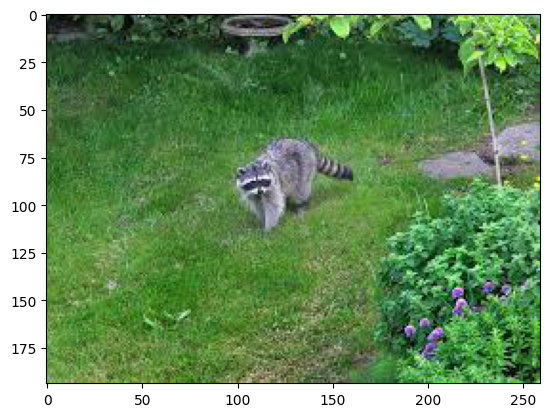

In [11]:
plt.imshow(img)

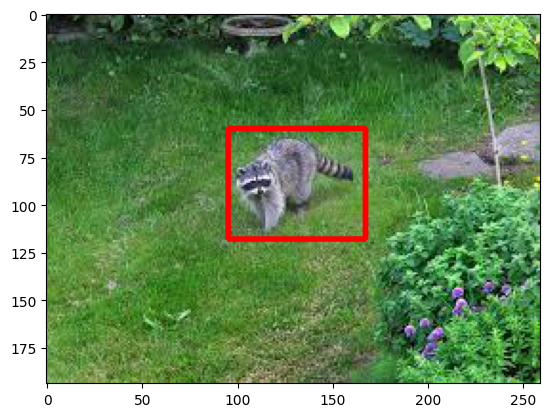

In [12]:
index = 0
img=cv2.rectangle(img,
                  (postion['xmin'][index],postion['ymin'][index]),
                  (postion['xmax'][index],postion['ymax'][index]),
                  (255,0,0),2)
plt.imshow(img)

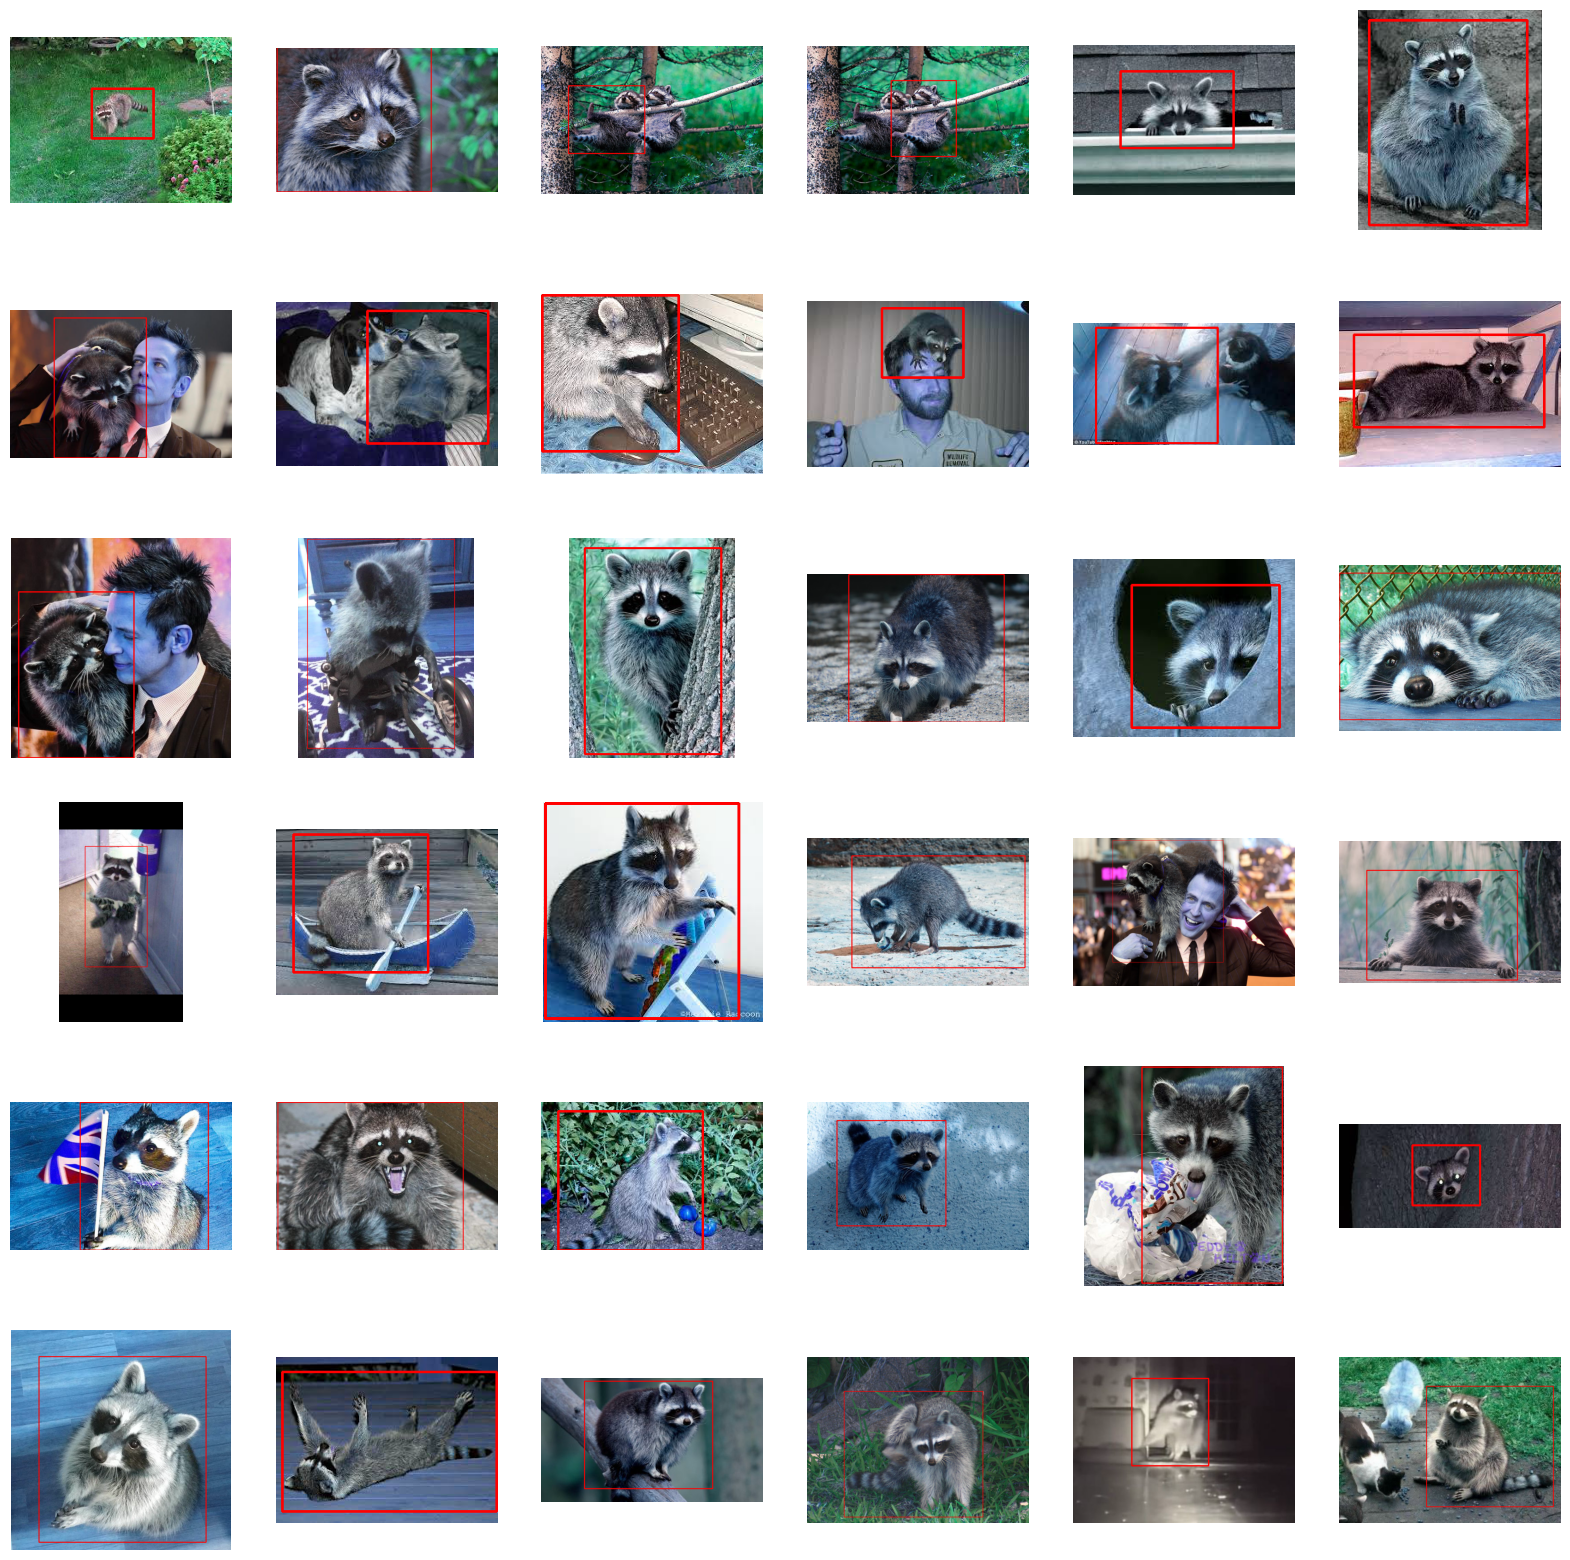

In [13]:
#showing training images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(range(36)) :
    plt.subplot(6,6,n+1)
    img = cv2.imread(trainpath+str(postion.iloc[i,0]))
    img= cv2.rectangle(img,(postion['xmin'][i],postion['ymin'][i]), (postion['xmax'][i],postion['ymax'][i]) , (255,0,0),2)
    plt.imshow(img)
    plt.axis('off')



In [15]:
#loading data and resize it and collect it in one folder

testpath = '/content/drive/MyDrive/Racoon Detection/Racoon Images/images/'
new_size=128
X_test = []
y_test = []

for path in tqdm.tqdm(postion['filename'].values[161:]):
    orignal_image = cv2.imread(testpath+path)
    if(orignal_image is not None):
      image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
      resized_image = cv2.resize(image , (new_size,new_size))
      X_test.append(resized_image)

X_test = np.array(X_test)
X_test = X_test / 255.0
print('image reading ...finished')

100%|██████████| 12/12 [00:05<00:00,  2.04it/s]

image reading ...finished


In [16]:
postion=postion[["width","height","xmin","ymin","xmax","ymax"]]

postion["xmin"] = postion["xmin"] *new_size/postion["width"]
postion["xmax"] = postion["xmax"]*new_size /postion["width"]
postion["ymin"] = postion["ymin"] *new_size/postion["height"]
postion["ymax"] = postion["ymax"] *new_size/postion["height"]

In [17]:
#postion=postion.astype('int32')
postion.drop(['width','height'],axis=1,inplace=True)
postion.head()

xmin       ymin       xmax        ymax
0  46.949807  39.587629  82.532819   77.855670
1   0.581818   0.296296  89.406061  127.703704
2  15.786667  34.240000  59.733333   92.800000
3  48.426667  29.760000  85.973333   95.360000
4  27.194139  22.832432  92.366300   87.870270

In [18]:
y_train=postion.iloc[:161,:]
y_test=postion.iloc[161:,:]

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint

# Model 1

![image.png](attachment:b19fc442-2f73-4e13-8848-af61f620efc7.png)

In [ ]:
from tensorflow.keras.backend import epsilon
def loss(gt,pred):
    intersections = 0
    unions = 0
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height

    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

#     Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
        if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
            intersections += intersection[j]
            unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + epsilon()), 4)
    iou = iou.astype(np.float32)
    return iou

def IoU(y_true, y_pred):
    iou = tf.py_function(loss, [y_true, y_pred], tf.float32)
    return iou

In [ ]:
#callbacks
EarlyStop=EarlyStopping(patience=5,monitor='val_iou',restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_iou',verbose=2,factor=0.5,min_lr=0.00001)
model_check=ModelCheckpoint('model.hdf5',monitor='val_iou',verbose=1,save_best_only=True)
callback=[EarlyStop , Reduce_LR,model_check]

#optimizer
optimizer_adam=Adam(learning_rate=0.002,beta_1=0.9,beta_2=0.99)

In [ ]:
model=Sequential([
                    Conv2D(64,3,activation='relu',kernel_initializer='he_normal',input_shape=(new_size,new_size,3),kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                    BatchNormalization(),
                    MaxPooling2D(3),

                    Conv2D(128,3,activation='relu',kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                    BatchNormalization(),
                    MaxPooling2D(3),

                    Conv2D(256,3,activation='relu',kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                    BatchNormalization(),
                    MaxPooling2D(3),


                    Flatten(),
                    Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                    Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                    Dense(4,activation='relu',kernel_initializer='glorot_normal')

])



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 batch_normalization_3 (Batc  (None, 126, 126, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 40, 40, 128)       73856     
                                                                 
 batch_normalization_4 (Batc  (None, 40, 40, 128)      512       
 hNormalization)                                                 
                                                      

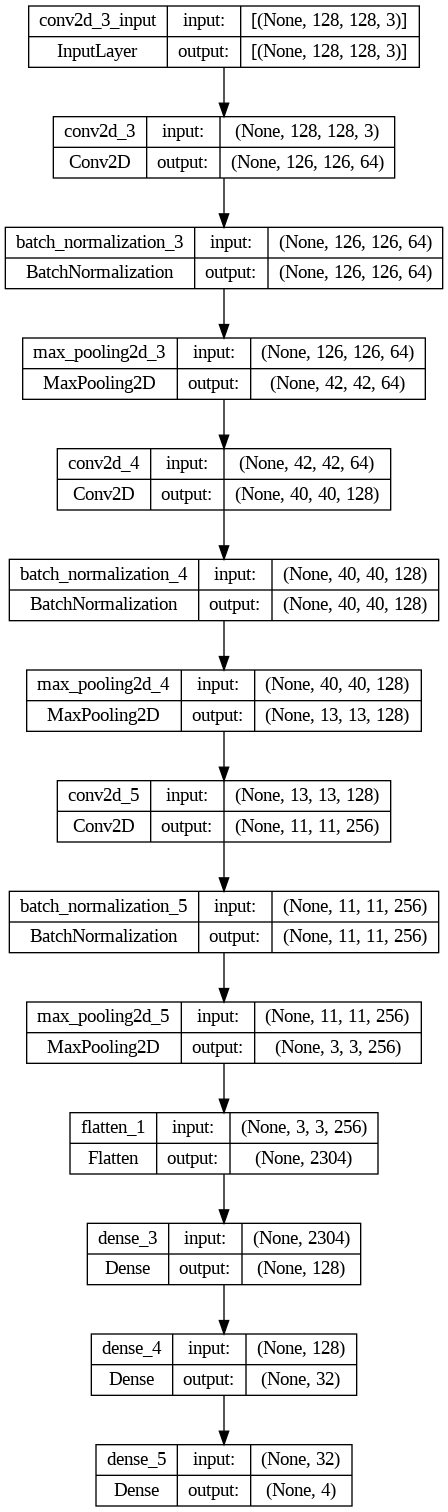

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer=optimizer_adam, loss='mse', metrics=[IoU])

history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=400,batch_size=4,
                  steps_per_epoch=len(X_train)//4,
                  callbacks=callback, verbose=1)

Epoch 1/400
40/40 [==============================] - ETA: 0s - loss: 1076.5756 - IoU: 0.4326

40/40 [==============================] - 4s 34ms/step - loss: 1076.5756 - IoU: 0.4326 - val_loss: 544.8232 - val_IoU: 0.4275 - lr: 0.0020
Epoch 2/400
39/40 [============================>.] - ETA: 0s - loss: 508.1165 - IoU: 0.4883

40/40 [==============================] - 2s 36ms/step - loss: 504.8999 - IoU: 0.4887 - val_loss: 626.3812 - val_IoU: 0.4026 - lr: 0.0020
Epoch 3/400
39/40 [============================>.] - ETA: 0s - loss: 335.7327 - IoU: 0.5401

40/40 [==============================] - 1s 35ms/step - loss: 340.8586 - IoU: 0.5365 - val_loss: 561.1837 - val_IoU: 0.4326 - lr: 0.0020
Epoch 4/400
39/40 [============================>.] - ETA: 0s - loss: 375.5426 - IoU: 0.5315

40/40 [==============================] - 1s 29ms/step - loss: 373.3027 - IoU: 0.5335 - val_loss: 481.2474 - val_IoU: 0.4587 - lr: 0.0020
Epoch 5/400
39/40 [============================>.] - ETA: 0s - loss: 278.5223 - IoU: 0.5846

40/40 [==============================] - 1s 26ms/step - loss: 284.1177 - IoU: 0.5817 - val_loss: 677.8460 - val_IoU: 0.3940 - lr: 0.0020
Epoch 6/400
39/40 [============================>.] - ETA: 0s - loss: 297.8054 - IoU: 0.5675

40/40 [==============================] - 1s 27ms/step - loss: 306.2834 - IoU: 0.5642 - val_loss: 460.0497 - val_IoU: 0.5000 - lr: 0.0020
Epoch 7/400
39/40 [============================>.] - ETA: 0s - loss: 291.9462 - IoU: 0.5851

40/40 [==============================] - 1s 27ms/step - loss: 295.5807 - IoU: 0.5833 - val_loss: 846.3160 - val_IoU: 0.4683 - lr: 0.0020
Epoch 8/400
39/40 [============================>.] - ETA: 0s - loss: 229.3842 - IoU: 0.6050

40/40 [==============================] - 1s 27ms/step - loss: 259.1094 - IoU: 0.6010 - val_loss: 490.9753 - val_IoU: 0.4506 - lr: 0.0020
Epoch 9/400
40/40 [==============================] - ETA: 0s - loss: 216.3485 - IoU: 0.6395

40/40 [==============================] - 1s 26ms/step - loss: 216.3485 - IoU: 0.6395 - val_loss: 653.5558 - val_IoU: 0.4027 - lr: 0.0020
Epoch 10/400
39/40 [============================>.] - ETA: 0s - loss: 226.9102 - IoU: 0.6074

40/40 [==============================] - 1s 27ms/step - loss: 227.4042 - IoU: 0.6065 - val_loss: 732.6403 - val_IoU: 0.3910 - lr: 0.0020
Epoch 11/400
39/40 [============================>.] - ETA: 0s - loss: 220.9915 - IoU: 0.6372

40/40 [==============================] - 1s 29ms/step - loss: 223.6969 - IoU: 0.6340 - val_loss: 634.9402 - val_IoU: 0.4465 - lr: 0.0020
Epoch 12/400
40/40 [==============================] - ETA: 0s - loss: 246.9703 - IoU: 0.6069

40/40 [==============================] - 1s 27ms/step - loss: 246.9703 - IoU: 0.6069 - val_loss: 513.5443 - val_IoU: 0.4818 - lr: 0.0020
Epoch 13/400
40/40 [==============================] - ETA: 0s - loss: 182.7877 - IoU: 0.6600

40/40 [==============================] - 1s 33ms/step - loss: 182.7877 - IoU: 0.6600 - val_loss: 745.5007 - val_IoU: 0.4395 - lr: 0.0020
Epoch 14/400
39/40 [============================>.] - ETA: 0s - loss: 213.5606 - IoU: 0.6228

40/40 [==============================] - 1s 37ms/step - loss: 215.5466 - IoU: 0.6210 - val_loss: 390.3788 - val_IoU: 0.4878 - lr: 0.0020
Epoch 15/400
39/40 [============================>.] - ETA: 0s - loss: 211.1418 - IoU: 0.6365

40/40 [==============================] - 1s 34ms/step - loss: 208.4301 - IoU: 0.6383 - val_loss: 553.5779 - val_IoU: 0.4480 - lr: 0.0020
Epoch 16/400
39/40 [============================>.] - ETA: 0s - loss: 192.9006 - IoU: 0.6550

40/40 [==============================] - 1s 27ms/step - loss: 192.7789 - IoU: 0.6543 - val_loss: 393.5625 - val_IoU: 0.5286 - lr: 0.0020
Epoch 17/400
40/40 [==============================] - ETA: 0s - loss: 140.1776 - IoU: 0.7154

40/40 [==============================] - 1s 29ms/step - loss: 140.1776 - IoU: 0.7154 - val_loss: 461.9772 - val_IoU: 0.4693 - lr: 0.0020
Epoch 18/400
40/40 [==============================] - ETA: 0s - loss: 166.8766 - IoU: 0.6667

40/40 [==============================] - 1s 27ms/step - loss: 166.8766 - IoU: 0.6667 - val_loss: 635.0024 - val_IoU: 0.4605 - lr: 0.0020
Epoch 19/400
38/40 [===========================>..] - ETA: 0s - loss: 157.6928 - IoU: 0.6777

40/40 [==============================] - 1s 26ms/step - loss: 167.1731 - IoU: 0.6751 - val_loss: 446.1007 - val_IoU: 0.5298 - lr: 0.0020
Epoch 20/400
39/40 [============================>.] - ETA: 0s - loss: 165.6170 - IoU: 0.6806

40/40 [==============================] - 1s 26ms/step - loss: 167.1101 - IoU: 0.6791 - val_loss: 536.3553 - val_IoU: 0.4953 - lr: 0.0020
Epoch 21/400
38/40 [===========================>..] - ETA: 0s - loss: 126.8627 - IoU: 0.6883

40/40 [==============================] - 1s 26ms/step - loss: 133.3434 - IoU: 0.6833 - val_loss: 531.3292 - val_IoU: 0.5008 - lr: 0.0020
Epoch 22/400
38/40 [===========================>..] - ETA: 0s - loss: 174.4008 - IoU: 0.6694

40/40 [==============================] - 1s 26ms/step - loss: 170.1389 - IoU: 0.6710 - val_loss: 405.1646 - val_IoU: 0.5467 - lr: 0.0020
Epoch 23/400
39/40 [============================>.] - ETA: 0s - loss: 152.3475 - IoU: 0.6703

40/40 [==============================] - 1s 27ms/step - loss: 160.6958 - IoU: 0.6642 - val_loss: 467.1034 - val_IoU: 0.4725 - lr: 0.0020
Epoch 24/400
39/40 [============================>.] - ETA: 0s - loss: 152.1425 - IoU: 0.7003

40/40 [==============================] - 1s 27ms/step - loss: 153.2509 - IoU: 0.6991 - val_loss: 491.3750 - val_IoU: 0.5288 - lr: 0.0020
Epoch 25/400
39/40 [============================>.] - ETA: 0s - loss: 149.9249 - IoU: 0.6773

40/40 [==============================] - 1s 35ms/step - loss: 147.8751 - IoU: 0.6791 - val_loss: 382.2528 - val_IoU: 0.5490 - lr: 0.0020
Epoch 26/400
39/40 [============================>.] - ETA: 0s - loss: 136.9916 - IoU: 0.7089

40/40 [==============================] - 1s 34ms/step - loss: 136.5131 - IoU: 0.7068 - val_loss: 696.9662 - val_IoU: 0.4574 - lr: 0.0020
Epoch 27/400
38/40 [===========================>..] - ETA: 0s - loss: 127.4374 - IoU: 0.7273

40/40 [==============================] - 1s 32ms/step - loss: 125.4389 - IoU: 0.7297 - val_loss: 400.5414 - val_IoU: 0.5128 - lr: 0.0020
Epoch 28/400
39/40 [============================>.] - ETA: 0s - loss: 121.4635 - IoU: 0.7164

40/40 [==============================] - 1s 27ms/step - loss: 119.3512 - IoU: 0.7180 - val_loss: 397.5856 - val_IoU: 0.5522 - lr: 0.0020
Epoch 29/400
39/40 [============================>.] - ETA: 0s - loss: 145.9805 - IoU: 0.6868

40/40 [==============================] - 1s 27ms/step - loss: 144.7258 - IoU: 0.6896 - val_loss: 402.1539 - val_IoU: 0.5562 - lr: 0.0020
Epoch 30/400
38/40 [===========================>..] - ETA: 0s - loss: 133.2754 - IoU: 0.7207

40/40 [==============================] - 1s 28ms/step - loss: 132.3001 - IoU: 0.7195 - val_loss: 423.0622 - val_IoU: 0.5373 - lr: 0.0020
Epoch 31/400
38/40 [===========================>..] - ETA: 0s - loss: 135.5246 - IoU: 0.7138

40/40 [==============================] - 1s 26ms/step - loss: 134.8036 - IoU: 0.7169 - val_loss: 580.3239 - val_IoU: 0.5093 - lr: 0.0020
Epoch 32/400
40/40 [==============================] - ETA: 0s - loss: 122.8766 - IoU: 0.7183

40/40 [==============================] - 1s 26ms/step - loss: 122.8766 - IoU: 0.7183 - val_loss: 349.2168 - val_IoU: 0.5435 - lr: 0.0020
Epoch 33/400
39/40 [============================>.] - ETA: 0s - loss: 121.5020 - IoU: 0.7343

40/40 [==============================] - 1s 27ms/step - loss: 119.2973 - IoU: 0.7369 - val_loss: 387.1267 - val_IoU: 0.5200 - lr: 0.0020
Epoch 34/400
40/40 [==============================] - ETA: 0s - loss: 140.4326 - IoU: 0.7184

40/40 [==============================] - 1s 27ms/step - loss: 140.4326 - IoU: 0.7184 - val_loss: 323.7022 - val_IoU: 0.5394 - lr: 0.0020
Epoch 35/400
38/40 [===========================>..] - ETA: 0s - loss: 142.4563 - IoU: 0.6983

40/40 [==============================] - 1s 26ms/step - loss: 144.7950 - IoU: 0.6940 - val_loss: 361.9581 - val_IoU: 0.5558 - lr: 0.0020
Epoch 36/400
40/40 [==============================] - ETA: 0s - loss: 104.2902 - IoU: 0.7276

40/40 [==============================] - 1s 29ms/step - loss: 104.2902 - IoU: 0.7276 - val_loss: 431.4095 - val_IoU: 0.5302 - lr: 0.0020
Epoch 37/400
39/40 [============================>.] - ETA: 0s - loss: 128.8146 - IoU: 0.7072

40/40 [==============================] - 1s 36ms/step - loss: 126.8779 - IoU: 0.7084 - val_loss: 386.2063 - val_IoU: 0.5710 - lr: 0.0020
Epoch 38/400
39/40 [============================>.] - ETA: 0s - loss: 124.7766 - IoU: 0.7038

40/40 [==============================] - 1s 35ms/step - loss: 126.5101 - IoU: 0.6999 - val_loss: 502.4244 - val_IoU: 0.5010 - lr: 0.0020
Epoch 39/400
40/40 [==============================] - ETA: 0s - loss: 136.5852 - IoU: 0.6969

40/40 [==============================] - 1s 29ms/step - loss: 136.5852 - IoU: 0.6969 - val_loss: 397.1614 - val_IoU: 0.5367 - lr: 0.0020
Epoch 40/400
38/40 [===========================>..] - ETA: 0s - loss: 130.9644 - IoU: 0.6973

40/40 [==============================] - 1s 27ms/step - loss: 127.7489 - IoU: 0.7058 - val_loss: 378.9823 - val_IoU: 0.5535 - lr: 0.0020
Epoch 41/400
40/40 [==============================] - ETA: 0s - loss: 116.3781 - IoU: 0.7199

40/40 [==============================] - 1s 27ms/step - loss: 116.3781 - IoU: 0.7199 - val_loss: 386.3004 - val_IoU: 0.5650 - lr: 0.0020
Epoch 42/400
40/40 [==============================] - ETA: 0s - loss: 104.5315 - IoU: 0.7515

40/40 [==============================] - 1s 27ms/step - loss: 104.5315 - IoU: 0.7515 - val_loss: 302.5067 - val_IoU: 0.5654 - lr: 0.0020
Epoch 43/400
39/40 [============================>.] - ETA: 0s - loss: 117.6145 - IoU: 0.7360

40/40 [==============================] - 1s 27ms/step - loss: 116.3655 - IoU: 0.7372 - val_loss: 299.4944 - val_IoU: 0.5500 - lr: 0.0020
Epoch 44/400
39/40 [============================>.] - ETA: 0s - loss: 84.1810 - IoU: 0.7751

40/40 [==============================] - 1s 35ms/step - loss: 87.2993 - IoU: 0.7722 - val_loss: 341.0304 - val_IoU: 0.5566 - lr: 0.0020
Epoch 45/400
39/40 [============================>.] - ETA: 0s - loss: 121.2802 - IoU: 0.7357

40/40 [==============================] - 2s 38ms/step - loss: 120.0796 - IoU: 0.7352 - val_loss: 324.3346 - val_IoU: 0.5589 - lr: 0.0020
Epoch 46/400
39/40 [============================>.] - ETA: 0s - loss: 146.6584 - IoU: 0.6854

40/40 [==============================] - 1s 31ms/step - loss: 144.6961 - IoU: 0.6861 - val_loss: 493.7052 - val_IoU: 0.5099 - lr: 0.0020
Epoch 47/400
39/40 [============================>.] - ETA: 0s - loss: 99.9465 - IoU: 0.7373 

40/40 [==============================] - 1s 30ms/step - loss: 97.9984 - IoU: 0.7405 - val_loss: 351.4668 - val_IoU: 0.5786 - lr: 0.0020
Epoch 48/400
39/40 [============================>.] - ETA: 0s - loss: 124.3814 - IoU: 0.7128

40/40 [==============================] - 1s 35ms/step - loss: 122.8160 - IoU: 0.7133 - val_loss: 316.5060 - val_IoU: 0.5526 - lr: 0.0020
Epoch 49/400
39/40 [============================>.] - ETA: 0s - loss: 103.1707 - IoU: 0.7331

40/40 [==============================] - 1s 36ms/step - loss: 108.5128 - IoU: 0.7279 - val_loss: 379.6497 - val_IoU: 0.5437 - lr: 0.0020
Epoch 50/400
38/40 [===========================>..] - ETA: 0s - loss: 94.6740 - IoU: 0.7436

40/40 [==============================] - 1s 28ms/step - loss: 104.1456 - IoU: 0.7418 - val_loss: 296.8967 - val_IoU: 0.5739 - lr: 0.0020
Epoch 51/400
38/40 [===========================>..] - ETA: 0s - loss: 125.1002 - IoU: 0.7300

40/40 [==============================] - 1s 26ms/step - loss: 124.5322 - IoU: 0.7299 - val_loss: 486.9408 - val_IoU: 0.5413 - lr: 0.0020
Epoch 52/400
39/40 [============================>.] - ETA: 0s - loss: 123.0765 - IoU: 0.7146

40/40 [==============================] - 1s 26ms/step - loss: 126.0101 - IoU: 0.7112 - val_loss: 385.9784 - val_IoU: 0.5352 - lr: 0.0020
Epoch 53/400
40/40 [==============================] - ETA: 0s - loss: 100.8232 - IoU: 0.7677

40/40 [==============================] - 1s 26ms/step - loss: 100.8232 - IoU: 0.7677 - val_loss: 302.2393 - val_IoU: 0.5766 - lr: 0.0020
Epoch 54/400
39/40 [============================>.] - ETA: 0s - loss: 100.0598 - IoU: 0.7359

40/40 [==============================] - 1s 27ms/step - loss: 101.5112 - IoU: 0.7317 - val_loss: 372.1043 - val_IoU: 0.5490 - lr: 0.0020
Epoch 55/400
40/40 [==============================] - ETA: 0s - loss: 92.9659 - IoU: 0.7287

40/40 [==============================] - 1s 27ms/step - loss: 92.9659 - IoU: 0.7287 - val_loss: 288.6138 - val_IoU: 0.5643 - lr: 0.0020
Epoch 56/400
39/40 [============================>.] - ETA: 0s - loss: 95.5169 - IoU: 0.7620

40/40 [==============================] - 1s 27ms/step - loss: 94.9894 - IoU: 0.7619 - val_loss: 309.9998 - val_IoU: 0.5762 - lr: 0.0020
Epoch 57/400
39/40 [============================>.] - ETA: 0s - loss: 117.7013 - IoU: 0.7289

40/40 [==============================] - 1s 27ms/step - loss: 115.7897 - IoU: 0.7310 - val_loss: 382.4425 - val_IoU: 0.5673 - lr: 0.0020
Epoch 58/400
40/40 [==============================] - ETA: 0s - loss: 85.5984 - IoU: 0.7601

40/40 [==============================] - 1s 27ms/step - loss: 85.5984 - IoU: 0.7601 - val_loss: 374.4580 - val_IoU: 0.5361 - lr: 0.0020
Epoch 59/400
40/40 [==============================] - ETA: 0s - loss: 114.6246 - IoU: 0.7302

40/40 [==============================] - 1s 35ms/step - loss: 114.6246 - IoU: 0.7302 - val_loss: 344.1389 - val_IoU: 0.5367 - lr: 0.0020
Epoch 60/400
39/40 [============================>.] - ETA: 0s - loss: 107.9686 - IoU: 0.7565

40/40 [==============================] - 2s 38ms/step - loss: 105.5199 - IoU: 0.7602 - val_loss: 304.5981 - val_IoU: 0.5975 - lr: 0.0020
Epoch 61/400
39/40 [============================>.] - ETA: 0s - loss: 96.4644 - IoU: 0.7595 

40/40 [==============================] - 1s 33ms/step - loss: 94.2582 - IoU: 0.7633 - val_loss: 356.3630 - val_IoU: 0.5574 - lr: 0.0020
Epoch 62/400
38/40 [===========================>..] - ETA: 0s - loss: 112.1207 - IoU: 0.7415

40/40 [==============================] - 1s 27ms/step - loss: 107.8541 - IoU: 0.7462 - val_loss: 334.9629 - val_IoU: 0.5453 - lr: 0.0020
Epoch 63/400
39/40 [============================>.] - ETA: 0s - loss: 87.2869 - IoU: 0.7647

40/40 [==============================] - 1s 27ms/step - loss: 85.6513 - IoU: 0.7664 - val_loss: 327.4600 - val_IoU: 0.5576 - lr: 0.0020
Epoch 64/400
40/40 [==============================] - ETA: 0s - loss: 99.4997 - IoU: 0.7351

40/40 [==============================] - 1s 27ms/step - loss: 99.4997 - IoU: 0.7351 - val_loss: 305.4297 - val_IoU: 0.5650 - lr: 0.0020
Epoch 65/400
39/40 [============================>.] - ETA: 0s - loss: 106.2519 - IoU: 0.7358

40/40 [==============================] - 1s 27ms/step - loss: 108.1233 - IoU: 0.7330 - val_loss: 331.8979 - val_IoU: 0.5567 - lr: 0.0020
Epoch 66/400
39/40 [============================>.] - ETA: 0s - loss: 91.4765 - IoU: 0.7663

40/40 [==============================] - 1s 27ms/step - loss: 90.1098 - IoU: 0.7686 - val_loss: 334.3878 - val_IoU: 0.5712 - lr: 0.0020
Epoch 67/400
40/40 [==============================] - ETA: 0s - loss: 98.9166 - IoU: 0.7478

40/40 [==============================] - 1s 27ms/step - loss: 98.9166 - IoU: 0.7478 - val_loss: 343.6881 - val_IoU: 0.5637 - lr: 0.0020
Epoch 68/400
40/40 [==============================] - ETA: 0s - loss: 83.2189 - IoU: 0.7641

40/40 [==============================] - 1s 26ms/step - loss: 83.2189 - IoU: 0.7641 - val_loss: 292.6361 - val_IoU: 0.5710 - lr: 0.0020
Epoch 69/400
39/40 [============================>.] - ETA: 0s - loss: 123.8084 - IoU: 0.7062

40/40 [==============================] - 1s 27ms/step - loss: 124.6304 - IoU: 0.7065 - val_loss: 415.4594 - val_IoU: 0.5644 - lr: 0.0020
Epoch 70/400
39/40 [============================>.] - ETA: 0s - loss: 107.0598 - IoU: 0.7440

40/40 [==============================] - 1s 31ms/step - loss: 105.6874 - IoU: 0.7440 - val_loss: 313.7399 - val_IoU: 0.5641 - lr: 0.0020
Epoch 71/400
39/40 [============================>.] - ETA: 0s - loss: 90.1915 - IoU: 0.7619

40/40 [==============================] - 1s 37ms/step - loss: 90.8099 - IoU: 0.7615 - val_loss: 316.0542 - val_IoU: 0.5539 - lr: 0.0020
Epoch 72/400
39/40 [============================>.] - ETA: 0s - loss: 101.8952 - IoU: 0.7386

40/40 [==============================] - 2s 37ms/step - loss: 103.4478 - IoU: 0.7346 - val_loss: 315.9255 - val_IoU: 0.5512 - lr: 0.0020
Epoch 73/400
39/40 [============================>.] - ETA: 0s - loss: 93.7955 - IoU: 0.7487

40/40 [==============================] - 1s 27ms/step - loss: 92.4343 - IoU: 0.7496 - val_loss: 329.0479 - val_IoU: 0.5642 - lr: 0.0020
Epoch 74/400
40/40 [==============================] - ETA: 0s - loss: 95.4694 - IoU: 0.7527

40/40 [==============================] - 1s 27ms/step - loss: 95.4694 - IoU: 0.7527 - val_loss: 325.2648 - val_IoU: 0.5819 - lr: 0.0020
Epoch 75/400
40/40 [==============================] - ETA: 0s - loss: 97.8835 - IoU: 0.7561 

40/40 [==============================] - 1s 28ms/step - loss: 97.8835 - IoU: 0.7561 - val_loss: 300.2644 - val_IoU: 0.5748 - lr: 0.0020
Epoch 76/400
39/40 [============================>.] - ETA: 0s - loss: 84.0116 - IoU: 0.7801

40/40 [==============================] - 1s 27ms/step - loss: 84.6857 - IoU: 0.7782 - val_loss: 320.2957 - val_IoU: 0.5603 - lr: 0.0020
Epoch 77/400
39/40 [============================>.] - ETA: 0s - loss: 95.7618 - IoU: 0.7463

40/40 [==============================] - 1s 27ms/step - loss: 95.0417 - IoU: 0.7455 - val_loss: 376.6701 - val_IoU: 0.5070 - lr: 0.0020
Epoch 78/400
38/40 [===========================>..] - ETA: 0s - loss: 91.3780 - IoU: 0.7477

40/40 [==============================] - 1s 27ms/step - loss: 90.9778 - IoU: 0.7487 - val_loss: 311.1476 - val_IoU: 0.5563 - lr: 0.0020
Epoch 79/400
39/40 [============================>.] - ETA: 0s - loss: 106.0117 - IoU: 0.7441

40/40 [==============================] - 1s 28ms/step - loss: 104.3986 - IoU: 0.7460 - val_loss: 340.4315 - val_IoU: 0.5433 - lr: 0.0020
Epoch 80/400
39/40 [============================>.] - ETA: 0s - loss: 92.6951 - IoU: 0.7689

40/40 [==============================] - 1s 27ms/step - loss: 94.4331 - IoU: 0.7639 - val_loss: 319.2511 - val_IoU: 0.5441 - lr: 0.0020
Epoch 81/400
38/40 [===========================>..] - ETA: 0s - loss: 90.4746 - IoU: 0.7612

40/40 [==============================] - 1s 28ms/step - loss: 92.6319 - IoU: 0.7523 - val_loss: 328.0035 - val_IoU: 0.5894 - lr: 0.0020
Epoch 82/400
39/40 [============================>.] - ETA: 0s - loss: 89.2108 - IoU: 0.7624

40/40 [==============================] - 1s 35ms/step - loss: 88.7393 - IoU: 0.7643 - val_loss: 295.0332 - val_IoU: 0.5470 - lr: 0.0020
Epoch 83/400
39/40 [============================>.] - ETA: 0s - loss: 90.2348 - IoU: 0.7563

40/40 [==============================] - 1s 35ms/step - loss: 89.2718 - IoU: 0.7560 - val_loss: 333.6675 - val_IoU: 0.5674 - lr: 0.0020
Epoch 84/400
40/40 [==============================] - ETA: 0s - loss: 88.7710 - IoU: 0.7730

40/40 [==============================] - 1s 33ms/step - loss: 88.7710 - IoU: 0.7730 - val_loss: 327.7623 - val_IoU: 0.5434 - lr: 0.0020
Epoch 85/400
40/40 [==============================] - ETA: 0s - loss: 88.7971 - IoU: 0.7679

40/40 [==============================] - 1s 27ms/step - loss: 88.7971 - IoU: 0.7679 - val_loss: 301.4823 - val_IoU: 0.5450 - lr: 0.0020
Epoch 86/400
39/40 [============================>.] - ETA: 0s - loss: 83.7990 - IoU: 0.7704

40/40 [==============================] - 1s 27ms/step - loss: 84.9106 - IoU: 0.7690 - val_loss: 293.7209 - val_IoU: 0.5771 - lr: 0.0020
Epoch 87/400
39/40 [============================>.] - ETA: 0s - loss: 91.2689 - IoU: 0.7798

40/40 [==============================] - 1s 26ms/step - loss: 92.6367 - IoU: 0.7773 - val_loss: 277.5738 - val_IoU: 0.5667 - lr: 0.0020
Epoch 88/400
39/40 [============================>.] - ETA: 0s - loss: 82.4881 - IoU: 0.7743

40/40 [==============================] - 1s 27ms/step - loss: 85.2314 - IoU: 0.7690 - val_loss: 247.5540 - val_IoU: 0.5980 - lr: 0.0020
Epoch 89/400
40/40 [==============================] - ETA: 0s - loss: 92.1291 - IoU: 0.7618

40/40 [==============================] - 1s 27ms/step - loss: 92.1291 - IoU: 0.7618 - val_loss: 283.3848 - val_IoU: 0.5732 - lr: 0.0020
Epoch 90/400
39/40 [============================>.] - ETA: 0s - loss: 84.5343 - IoU: 0.7703

40/40 [==============================] - 1s 27ms/step - loss: 82.9184 - IoU: 0.7724 - val_loss: 298.8235 - val_IoU: 0.5737 - lr: 0.0020
Epoch 91/400
38/40 [===========================>..] - ETA: 0s - loss: 81.1262 - IoU: 0.7621

40/40 [==============================] - 1s 27ms/step - loss: 88.7157 - IoU: 0.7583 - val_loss: 356.9917 - val_IoU: 0.5249 - lr: 0.0020
Epoch 92/400
38/40 [===========================>..] - ETA: 0s - loss: 62.1723 - IoU: 0.8095

40/40 [==============================] - 1s 27ms/step - loss: 63.4986 - IoU: 0.8075 - val_loss: 294.3008 - val_IoU: 0.5852 - lr: 0.0020
Epoch 93/400
40/40 [==============================] - ETA: 0s - loss: 96.8797 - IoU: 0.7687 

40/40 [==============================] - 1s 30ms/step - loss: 96.8797 - IoU: 0.7687 - val_loss: 319.5050 - val_IoU: 0.5360 - lr: 0.0020
Epoch 94/400
39/40 [============================>.] - ETA: 0s - loss: 89.7934 - IoU: 0.7653

40/40 [==============================] - 1s 35ms/step - loss: 88.3241 - IoU: 0.7667 - val_loss: 293.4506 - val_IoU: 0.5267 - lr: 0.0020
Epoch 95/400
39/40 [============================>.] - ETA: 0s - loss: 91.4074 - IoU: 0.7588

40/40 [==============================] - 1s 35ms/step - loss: 90.5245 - IoU: 0.7590 - val_loss: 325.4084 - val_IoU: 0.5266 - lr: 0.0020
Epoch 96/400
40/40 [==============================] - ETA: 0s - loss: 98.7824 - IoU: 0.7638 

40/40 [==============================] - 1s 29ms/step - loss: 98.7824 - IoU: 0.7638 - val_loss: 277.5678 - val_IoU: 0.5737 - lr: 0.0020
Epoch 97/400
39/40 [============================>.] - ETA: 0s - loss: 78.8497 - IoU: 0.7574

40/40 [==============================] - 1s 28ms/step - loss: 80.1659 - IoU: 0.7563 - val_loss: 326.9896 - val_IoU: 0.5437 - lr: 0.0020
Epoch 98/400
40/40 [==============================] - ETA: 0s - loss: 84.2329 - IoU: 0.7833

40/40 [==============================] - 1s 27ms/step - loss: 84.2329 - IoU: 0.7833 - val_loss: 274.9222 - val_IoU: 0.5693 - lr: 0.0020
Epoch 99/400
40/40 [==============================] - ETA: 0s - loss: 84.5549 - IoU: 0.7702

40/40 [==============================] - 1s 28ms/step - loss: 84.5549 - IoU: 0.7702 - val_loss: 294.6675 - val_IoU: 0.5543 - lr: 0.0020
Epoch 100/400
39/40 [============================>.] - ETA: 0s - loss: 86.7351 - IoU: 0.7659

40/40 [==============================] - 1s 27ms/step - loss: 89.1335 - IoU: 0.7622 - val_loss: 292.8705 - val_IoU: 0.5548 - lr: 0.0020
Epoch 101/400
39/40 [============================>.] - ETA: 0s - loss: 92.4069 - IoU: 0.7659

40/40 [==============================] - 1s 28ms/step - loss: 97.8841 - IoU: 0.7590 - val_loss: 274.4209 - val_IoU: 0.5990 - lr: 0.0020
Epoch 102/400
39/40 [============================>.] - ETA: 0s - loss: 82.8638 - IoU: 0.7785

40/40 [==============================] - 1s 28ms/step - loss: 81.5124 - IoU: 0.7800 - val_loss: 251.6758 - val_IoU: 0.6045 - lr: 0.0020
Epoch 103/400
40/40 [==============================] - ETA: 0s - loss: 89.9124 - IoU: 0.7777

40/40 [==============================] - 1s 28ms/step - loss: 89.9124 - IoU: 0.7777 - val_loss: 271.5909 - val_IoU: 0.5903 - lr: 0.0020
Epoch 104/400
40/40 [==============================] - ETA: 0s - loss: 83.6501 - IoU: 0.7858

40/40 [==============================] - 1s 27ms/step - loss: 83.6501 - IoU: 0.7858 - val_loss: 277.0381 - val_IoU: 0.5965 - lr: 0.0020
Epoch 105/400
39/40 [============================>.] - ETA: 0s - loss: 75.8654 - IoU: 0.7881

40/40 [==============================] - 1s 33ms/step - loss: 81.3481 - IoU: 0.7814 - val_loss: 341.0208 - val_IoU: 0.5303 - lr: 0.0020
Epoch 106/400
39/40 [============================>.] - ETA: 0s - loss: 80.5694 - IoU: 0.7906

40/40 [==============================] - 1s 37ms/step - loss: 86.1081 - IoU: 0.7840 - val_loss: 266.2981 - val_IoU: 0.5908 - lr: 0.0020
Epoch 107/400
39/40 [============================>.] - ETA: 0s - loss: 73.7910 - IoU: 0.7889

40/40 [==============================] - 1s 35ms/step - loss: 72.3777 - IoU: 0.7905 - val_loss: 297.4219 - val_IoU: 0.5558 - lr: 0.0020
Epoch 108/400
39/40 [============================>.] - ETA: 0s - loss: 91.4663 - IoU: 0.7726

40/40 [==============================] - 1s 27ms/step - loss: 91.0489 - IoU: 0.7718 - val_loss: 263.6286 - val_IoU: 0.5866 - lr: 0.0020
Epoch 109/400
39/40 [============================>.] - ETA: 0s - loss: 84.2255 - IoU: 0.7910

40/40 [==============================] - 1s 27ms/step - loss: 86.9733 - IoU: 0.7875 - val_loss: 281.6375 - val_IoU: 0.6239 - lr: 0.0020
Epoch 110/400
39/40 [============================>.] - ETA: 0s - loss: 81.3170 - IoU: 0.7799

40/40 [==============================] - 1s 28ms/step - loss: 80.0011 - IoU: 0.7817 - val_loss: 285.7109 - val_IoU: 0.6020 - lr: 0.0020
Epoch 111/400
39/40 [============================>.] - ETA: 0s - loss: 72.1069 - IoU: 0.7900

40/40 [==============================] - 1s 28ms/step - loss: 74.0236 - IoU: 0.7864 - val_loss: 286.6985 - val_IoU: 0.5633 - lr: 0.0020
Epoch 112/400
40/40 [==============================] - ETA: 0s - loss: 89.1625 - IoU: 0.7815

40/40 [==============================] - 1s 28ms/step - loss: 89.1625 - IoU: 0.7815 - val_loss: 288.1030 - val_IoU: 0.5707 - lr: 0.0020
Epoch 113/400
39/40 [============================>.] - ETA: 0s - loss: 73.2202 - IoU: 0.7798

40/40 [==============================] - 1s 27ms/step - loss: 71.8823 - IoU: 0.7823 - val_loss: 274.3367 - val_IoU: 0.5819 - lr: 0.0020
Epoch 114/400
38/40 [===========================>..] - ETA: 0s - loss: 91.0030 - IoU: 0.7597

40/40 [==============================] - 1s 27ms/step - loss: 90.6824 - IoU: 0.7628 - val_loss: 278.6933 - val_IoU: 0.6033 - lr: 0.0020
Epoch 115/400
40/40 [==============================] - ETA: 0s - loss: 90.9065 - IoU: 0.7658

40/40 [==============================] - 1s 27ms/step - loss: 90.9065 - IoU: 0.7658 - val_loss: 290.0569 - val_IoU: 0.5589 - lr: 0.0020
Epoch 116/400
40/40 [==============================] - ETA: 0s - loss: 67.1615 - IoU: 0.7986

40/40 [==============================] - 1s 30ms/step - loss: 67.1615 - IoU: 0.7986 - val_loss: 294.8798 - val_IoU: 0.5465 - lr: 0.0020
Epoch 117/400
39/40 [============================>.] - ETA: 0s - loss: 98.6432 - IoU: 0.7626

40/40 [==============================] - 1s 35ms/step - loss: 99.1993 - IoU: 0.7598 - val_loss: 322.9041 - val_IoU: 0.5279 - lr: 0.0020
Epoch 118/400
39/40 [============================>.] - ETA: 0s - loss: 85.6992 - IoU: 0.7595

40/40 [==============================] - 2s 38ms/step - loss: 84.1702 - IoU: 0.7621 - val_loss: 314.3307 - val_IoU: 0.5351 - lr: 0.0020
Epoch 119/400
38/40 [===========================>..] - ETA: 0s - loss: 84.0299 - IoU: 0.7747

40/40 [==============================] - 1s 29ms/step - loss: 88.2745 - IoU: 0.7697 - val_loss: 317.7146 - val_IoU: 0.5210 - lr: 0.0020
Epoch 120/400
39/40 [============================>.] - ETA: 0s - loss: 78.2154 - IoU: 0.7624

40/40 [==============================] - 1s 29ms/step - loss: 76.9273 - IoU: 0.7651 - val_loss: 320.8441 - val_IoU: 0.5365 - lr: 0.0020
Epoch 121/400
40/40 [==============================] - ETA: 0s - loss: 72.6330 - IoU: 0.7849

40/40 [==============================] - 1s 28ms/step - loss: 72.6330 - IoU: 0.7849 - val_loss: 259.6697 - val_IoU: 0.5927 - lr: 0.0020
Epoch 122/400
39/40 [============================>.] - ETA: 0s - loss: 86.5261 - IoU: 0.7860

40/40 [==============================] - 1s 28ms/step - loss: 85.2831 - IoU: 0.7861 - val_loss: 289.1185 - val_IoU: 0.5562 - lr: 0.0020
Epoch 123/400
40/40 [==============================] - ETA: 0s - loss: 86.0940 - IoU: 0.7845

40/40 [==============================] - 1s 28ms/step - loss: 86.0940 - IoU: 0.7845 - val_loss: 292.6448 - val_IoU: 0.5911 - lr: 0.0020
Epoch 124/400
40/40 [==============================] - ETA: 0s - loss: 85.4403 - IoU: 0.7776

40/40 [==============================] - 1s 28ms/step - loss: 85.4403 - IoU: 0.7776 - val_loss: 289.5231 - val_IoU: 0.5545 - lr: 0.0020
Epoch 125/400
39/40 [============================>.] - ETA: 0s - loss: 75.6055 - IoU: 0.8068

40/40 [==============================] - 1s 27ms/step - loss: 81.3720 - IoU: 0.7982 - val_loss: 325.5354 - val_IoU: 0.5313 - lr: 0.0020
Epoch 126/400
40/40 [==============================] - ETA: 0s - loss: 79.9869 - IoU: 0.7826

40/40 [==============================] - 1s 28ms/step - loss: 79.9869 - IoU: 0.7826 - val_loss: 276.9048 - val_IoU: 0.5809 - lr: 0.0020
Epoch 127/400
39/40 [============================>.] - ETA: 0s - loss: 67.3666 - IoU: 0.8005

40/40 [==============================] - 1s 30ms/step - loss: 66.7185 - IoU: 0.8016 - val_loss: 256.7703 - val_IoU: 0.5791 - lr: 0.0020
Epoch 128/400
39/40 [============================>.] - ETA: 0s - loss: 97.3876 - IoU: 0.7531 

40/40 [==============================] - 1s 37ms/step - loss: 95.4889 - IoU: 0.7546 - val_loss: 274.2845 - val_IoU: 0.5866 - lr: 0.0020
Epoch 129/400
39/40 [============================>.] - ETA: 0s - loss: 89.7703 - IoU: 0.7706

40/40 [==============================] - 1s 37ms/step - loss: 91.8268 - IoU: 0.7687 - val_loss: 268.6357 - val_IoU: 0.5754 - lr: 0.0020
Epoch 130/400
39/40 [============================>.] - ETA: 0s - loss: 70.9740 - IoU: 0.8048

40/40 [==============================] - 1s 32ms/step - loss: 69.6803 - IoU: 0.8064 - val_loss: 288.7902 - val_IoU: 0.6001 - lr: 0.0020
Epoch 131/400
40/40 [==============================] - ETA: 0s - loss: 67.1292 - IoU: 0.8003

40/40 [==============================] - 1s 28ms/step - loss: 67.1292 - IoU: 0.8003 - val_loss: 272.5777 - val_IoU: 0.6006 - lr: 0.0020
Epoch 132/400
39/40 [============================>.] - ETA: 0s - loss: 82.2454 - IoU: 0.7819

40/40 [==============================] - 1s 27ms/step - loss: 84.0062 - IoU: 0.7806 - val_loss: 258.0795 - val_IoU: 0.6026 - lr: 0.0020
Epoch 133/400
39/40 [============================>.] - ETA: 0s - loss: 88.0457 - IoU: 0.7742

40/40 [==============================] - 1s 27ms/step - loss: 86.6907 - IoU: 0.7752 - val_loss: 272.5252 - val_IoU: 0.5595 - lr: 0.0020
Epoch 134/400
38/40 [===========================>..] - ETA: 0s - loss: 69.4348 - IoU: 0.8058

40/40 [==============================] - 1s 28ms/step - loss: 70.2113 - IoU: 0.8051 - val_loss: 269.8196 - val_IoU: 0.5814 - lr: 0.0020
Epoch 135/400
40/40 [==============================] - ETA: 0s - loss: 92.1109 - IoU: 0.7759

40/40 [==============================] - 1s 27ms/step - loss: 92.1109 - IoU: 0.7759 - val_loss: 286.0057 - val_IoU: 0.5845 - lr: 0.0020
Epoch 136/400
39/40 [============================>.] - ETA: 0s - loss: 74.1383 - IoU: 0.7919

40/40 [==============================] - 1s 27ms/step - loss: 74.7969 - IoU: 0.7887 - val_loss: 268.5892 - val_IoU: 0.5994 - lr: 0.0020
Epoch 137/400
39/40 [============================>.] - ETA: 0s - loss: 94.5864 - IoU: 0.7440

40/40 [==============================] - 1s 27ms/step - loss: 92.4299 - IoU: 0.7479 - val_loss: 297.5938 - val_IoU: 0.5713 - lr: 0.0020
Epoch 138/400
40/40 [==============================] - ETA: 0s - loss: 59.0690 - IoU: 0.8204

40/40 [==============================] - 1s 28ms/step - loss: 59.0690 - IoU: 0.8204 - val_loss: 295.1637 - val_IoU: 0.5590 - lr: 0.0020
Epoch 139/400
40/40 [==============================] - ETA: 0s - loss: 71.5070 - IoU: 0.8074

40/40 [==============================] - 1s 36ms/step - loss: 71.5070 - IoU: 0.8074 - val_loss: 270.8156 - val_IoU: 0.5923 - lr: 0.0020
Epoch 140/400
39/40 [============================>.] - ETA: 0s - loss: 87.0796 - IoU: 0.7752

40/40 [==============================] - 2s 37ms/step - loss: 92.2647 - IoU: 0.7691 - val_loss: 293.3972 - val_IoU: 0.5611 - lr: 0.0020
Epoch 141/400
40/40 [==============================] - ETA: 0s - loss: 77.8518 - IoU: 0.7779

40/40 [==============================] - 1s 32ms/step - loss: 77.8518 - IoU: 0.7779 - val_loss: 279.1331 - val_IoU: 0.5721 - lr: 0.0020
Epoch 142/400
39/40 [============================>.] - ETA: 0s - loss: 85.2394 - IoU: 0.7828

40/40 [==============================] - 1s 28ms/step - loss: 83.7343 - IoU: 0.7839 - val_loss: 294.9877 - val_IoU: 0.5746 - lr: 0.0020
Epoch 143/400
39/40 [============================>.] - ETA: 0s - loss: 70.7113 - IoU: 0.7921

40/40 [==============================] - 1s 28ms/step - loss: 69.2479 - IoU: 0.7941 - val_loss: 290.7524 - val_IoU: 0.5714 - lr: 0.0020
Epoch 144/400
40/40 [==============================] - ETA: 0s - loss: 78.9924 - IoU: 0.7768

40/40 [==============================] - 1s 29ms/step - loss: 78.9924 - IoU: 0.7768 - val_loss: 293.7838 - val_IoU: 0.5724 - lr: 0.0020
Epoch 145/400
38/40 [===========================>..] - ETA: 0s - loss: 91.1093 - IoU: 0.7728

40/40 [==============================] - 1s 27ms/step - loss: 88.7967 - IoU: 0.7750 - val_loss: 283.6969 - val_IoU: 0.5648 - lr: 0.0020
Epoch 146/400
40/40 [==============================] - ETA: 0s - loss: 69.7888 - IoU: 0.7805

40/40 [==============================] - 1s 27ms/step - loss: 69.7888 - IoU: 0.7805 - val_loss: 293.1091 - val_IoU: 0.5767 - lr: 0.0020
Epoch 147/400
39/40 [============================>.] - ETA: 0s - loss: 85.9290 - IoU: 0.7846

40/40 [==============================] - 1s 27ms/step - loss: 84.5373 - IoU: 0.7872 - val_loss: 282.3283 - val_IoU: 0.6026 - lr: 0.0020
Epoch 148/400
39/40 [============================>.] - ETA: 0s - loss: 74.0953 - IoU: 0.7946

40/40 [==============================] - 1s 28ms/step - loss: 76.1114 - IoU: 0.7923 - val_loss: 296.6908 - val_IoU: 0.5535 - lr: 0.0020
Epoch 149/400
40/40 [==============================] - ETA: 0s - loss: 84.2029 - IoU: 0.7889

40/40 [==============================] - 1s 29ms/step - loss: 84.2029 - IoU: 0.7889 - val_loss: 297.0127 - val_IoU: 0.5444 - lr: 0.0020
Epoch 150/400
39/40 [============================>.] - ETA: 0s - loss: 79.8031 - IoU: 0.7741

40/40 [==============================] - 1s 31ms/step - loss: 78.1041 - IoU: 0.7779 - val_loss: 291.4273 - val_IoU: 0.5847 - lr: 0.0020
Epoch 151/400
39/40 [============================>.] - ETA: 0s - loss: 72.6933 - IoU: 0.8119

40/40 [==============================] - 1s 34ms/step - loss: 71.4069 - IoU: 0.8131 - val_loss: 315.6796 - val_IoU: 0.5466 - lr: 0.0020
Epoch 152/400
39/40 [============================>.] - ETA: 0s - loss: 78.2144 - IoU: 0.7725

40/40 [==============================] - 1s 35ms/step - loss: 78.1427 - IoU: 0.7725 - val_loss: 299.7938 - val_IoU: 0.5798 - lr: 0.0020
Epoch 153/400
39/40 [============================>.] - ETA: 0s - loss: 82.2321 - IoU: 0.7703

40/40 [==============================] - 1s 29ms/step - loss: 80.7501 - IoU: 0.7716 - val_loss: 336.6634 - val_IoU: 0.5474 - lr: 0.0020
Epoch 154/400
38/40 [===========================>..] - ETA: 0s - loss: 72.0876 - IoU: 0.8027

40/40 [==============================] - 1s 28ms/step - loss: 78.9694 - IoU: 0.7965 - val_loss: 274.2468 - val_IoU: 0.5916 - lr: 0.0020
Epoch 155/400
39/40 [============================>.] - ETA: 0s - loss: 80.0663 - IoU: 0.7631

40/40 [==============================] - 1s 28ms/step - loss: 79.0401 - IoU: 0.7642 - val_loss: 296.8184 - val_IoU: 0.5671 - lr: 0.0020
Epoch 156/400
39/40 [============================>.] - ETA: 0s - loss: 90.6722 - IoU: 0.7848

40/40 [==============================] - 1s 28ms/step - loss: 88.7184 - IoU: 0.7869 - val_loss: 282.9174 - val_IoU: 0.5807 - lr: 0.0020
Epoch 157/400
38/40 [===========================>..] - ETA: 0s - loss: 68.6442 - IoU: 0.8033

40/40 [==============================] - 1s 28ms/step - loss: 68.8774 - IoU: 0.8026 - val_loss: 283.7527 - val_IoU: 0.5989 - lr: 0.0020
Epoch 158/400
40/40 [==============================] - ETA: 0s - loss: 76.8031 - IoU: 0.7918

40/40 [==============================] - 1s 28ms/step - loss: 76.8031 - IoU: 0.7918 - val_loss: 289.6883 - val_IoU: 0.5864 - lr: 0.0020
Epoch 159/400
40/40 [==============================] - ETA: 0s - loss: 78.1581 - IoU: 0.7919

40/40 [==============================] - 1s 29ms/step - loss: 78.1581 - IoU: 0.7919 - val_loss: 307.0273 - val_IoU: 0.5870 - lr: 0.0020
Epoch 160/400
40/40 [==============================] - ETA: 0s - loss: 71.1358 - IoU: 0.7874

40/40 [==============================] - 1s 28ms/step - loss: 71.1358 - IoU: 0.7874 - val_loss: 296.3741 - val_IoU: 0.5593 - lr: 0.0020
Epoch 161/400
40/40 [==============================] - ETA: 0s - loss: 79.3039 - IoU: 0.7954

40/40 [==============================] - 1s 28ms/step - loss: 79.3039 - IoU: 0.7954 - val_loss: 345.4909 - val_IoU: 0.5217 - lr: 0.0020
Epoch 162/400
39/40 [============================>.] - ETA: 0s - loss: 81.2952 - IoU: 0.7767

40/40 [==============================] - 1s 36ms/step - loss: 80.7643 - IoU: 0.7762 - val_loss: 300.6602 - val_IoU: 0.5556 - lr: 0.0020
Epoch 163/400
39/40 [============================>.] - ETA: 0s - loss: 72.1250 - IoU: 0.8094

40/40 [==============================] - 2s 38ms/step - loss: 70.6882 - IoU: 0.8115 - val_loss: 308.1753 - val_IoU: 0.5566 - lr: 0.0020
Epoch 164/400
40/40 [==============================] - ETA: 0s - loss: 75.4903 - IoU: 0.7859

40/40 [==============================] - 1s 32ms/step - loss: 75.4903 - IoU: 0.7859 - val_loss: 278.0575 - val_IoU: 0.5865 - lr: 0.0020
Epoch 165/400
40/40 [==============================] - ETA: 0s - loss: 82.3264 - IoU: 0.7823

40/40 [==============================] - 1s 28ms/step - loss: 82.3264 - IoU: 0.7823 - val_loss: 262.4702 - val_IoU: 0.6002 - lr: 0.0020
Epoch 166/400
39/40 [============================>.] - ETA: 0s - loss: 70.4505 - IoU: 0.7985

40/40 [==============================] - 1s 28ms/step - loss: 73.4656 - IoU: 0.7953 - val_loss: 285.6238 - val_IoU: 0.5754 - lr: 0.0020
Epoch 167/400
39/40 [============================>.] - ETA: 0s - loss: 74.7646 - IoU: 0.8000

40/40 [==============================] - 1s 27ms/step - loss: 73.5015 - IoU: 0.8009 - val_loss: 307.9642 - val_IoU: 0.5895 - lr: 0.0020
Epoch 168/400
40/40 [==============================] - ETA: 0s - loss: 85.2304 - IoU: 0.7895

40/40 [==============================] - 1s 27ms/step - loss: 85.2304 - IoU: 0.7895 - val_loss: 264.4905 - val_IoU: 0.5969 - lr: 0.0020
Epoch 169/400
40/40 [==============================] - ETA: 0s - loss: 69.7303 - IoU: 0.8136

40/40 [==============================] - 1s 28ms/step - loss: 69.7303 - IoU: 0.8136 - val_loss: 278.7678 - val_IoU: 0.5853 - lr: 0.0020
Epoch 170/400
40/40 [==============================] - ETA: 0s - loss: 69.6711 - IoU: 0.8117

40/40 [==============================] - 1s 27ms/step - loss: 69.6711 - IoU: 0.8117 - val_loss: 291.7026 - val_IoU: 0.5722 - lr: 0.0020
Epoch 171/400
39/40 [============================>.] - ETA: 0s - loss: 81.1632 - IoU: 0.7908

40/40 [==============================] - 1s 28ms/step - loss: 80.3275 - IoU: 0.7917 - val_loss: 270.9896 - val_IoU: 0.5786 - lr: 0.0020
Epoch 172/400
38/40 [===========================>..] - ETA: 0s - loss: 74.6944 - IoU: 0.8122

40/40 [==============================] - 1s 27ms/step - loss: 76.0164 - IoU: 0.8110 - val_loss: 305.3955 - val_IoU: 0.5458 - lr: 0.0020
Epoch 173/400
40/40 [==============================] - ETA: 0s - loss: 68.1406 - IoU: 0.8097

40/40 [==============================] - 1s 33ms/step - loss: 68.1406 - IoU: 0.8097 - val_loss: 303.2922 - val_IoU: 0.5806 - lr: 0.0020
Epoch 174/400
39/40 [============================>.] - ETA: 0s - loss: 74.4509 - IoU: 0.8008

40/40 [==============================] - 2s 38ms/step - loss: 77.9043 - IoU: 0.7950 - val_loss: 282.6849 - val_IoU: 0.5689 - lr: 0.0020
Epoch 175/400
39/40 [============================>.] - ETA: 0s - loss: 76.3238 - IoU: 0.7766

40/40 [==============================] - 1s 36ms/step - loss: 76.9064 - IoU: 0.7767 - val_loss: 291.5723 - val_IoU: 0.5589 - lr: 0.0020
Epoch 176/400
40/40 [==============================] - ETA: 0s - loss: 65.8919 - IoU: 0.8113

40/40 [==============================] - 1s 28ms/step - loss: 65.8919 - IoU: 0.8113 - val_loss: 349.1550 - val_IoU: 0.5332 - lr: 0.0020
Epoch 177/400
38/40 [===========================>..] - ETA: 0s - loss: 77.1849 - IoU: 0.7988

40/40 [==============================] - 1s 28ms/step - loss: 83.6637 - IoU: 0.7948 - val_loss: 326.1429 - val_IoU: 0.5511 - lr: 0.0020
Epoch 178/400
38/40 [===========================>..] - ETA: 0s - loss: 81.3242 - IoU: 0.7963

40/40 [==============================] - 1s 28ms/step - loss: 79.9861 - IoU: 0.7959 - val_loss: 284.6930 - val_IoU: 0.5669 - lr: 0.0020
Epoch 179/400
39/40 [============================>.] - ETA: 0s - loss: 83.7510 - IoU: 0.7972

40/40 [==============================] - 1s 29ms/step - loss: 81.8983 - IoU: 0.7991 - val_loss: 270.9972 - val_IoU: 0.5835 - lr: 0.0020
Epoch 180/400
40/40 [==============================] - ETA: 0s - loss: 74.2226 - IoU: 0.7854

40/40 [==============================] - 1s 28ms/step - loss: 74.2226 - IoU: 0.7854 - val_loss: 277.1697 - val_IoU: 0.5790 - lr: 0.0020
Epoch 181/400
40/40 [==============================] - ETA: 0s - loss: 62.3711 - IoU: 0.8174

40/40 [==============================] - 1s 28ms/step - loss: 62.3711 - IoU: 0.8174 - val_loss: 310.6931 - val_IoU: 0.5686 - lr: 0.0020
Epoch 182/400
40/40 [==============================] - ETA: 0s - loss: 66.5343 - IoU: 0.8217

40/40 [==============================] - 1s 28ms/step - loss: 66.5343 - IoU: 0.8217 - val_loss: 269.5714 - val_IoU: 0.5928 - lr: 0.0020
Epoch 183/400
38/40 [===========================>..] - ETA: 0s - loss: 83.7827 - IoU: 0.7688

40/40 [==============================] - 1s 28ms/step - loss: 81.6769 - IoU: 0.7688 - val_loss: 279.0359 - val_IoU: 0.6158 - lr: 0.0020
Epoch 184/400
40/40 [==============================] - ETA: 0s - loss: 58.5983 - IoU: 0.8093

40/40 [==============================] - 1s 33ms/step - loss: 58.5983 - IoU: 0.8093 - val_loss: 277.5216 - val_IoU: 0.5712 - lr: 0.0020
Epoch 185/400
39/40 [============================>.] - ETA: 0s - loss: 71.8341 - IoU: 0.8134

40/40 [==============================] - 1s 36ms/step - loss: 70.6370 - IoU: 0.8143 - val_loss: 302.9629 - val_IoU: 0.5519 - lr: 0.0020
Epoch 186/400
39/40 [============================>.] - ETA: 0s - loss: 80.3573 - IoU: 0.7973

40/40 [==============================] - 2s 38ms/step - loss: 78.7125 - IoU: 0.7998 - val_loss: 264.0383 - val_IoU: 0.5878 - lr: 0.0020
Epoch 187/400
39/40 [============================>.] - ETA: 0s - loss: 93.9244 - IoU: 0.7805

40/40 [==============================] - 1s 28ms/step - loss: 91.8090 - IoU: 0.7843 - val_loss: 268.7673 - val_IoU: 0.5913 - lr: 0.0020
Epoch 188/400
40/40 [==============================] - ETA: 0s - loss: 52.4069 - IoU: 0.8331

40/40 [==============================] - 1s 28ms/step - loss: 52.4069 - IoU: 0.8331 - val_loss: 260.1213 - val_IoU: 0.5976 - lr: 0.0020
Epoch 189/400
38/40 [===========================>..] - ETA: 0s - loss: 69.3772 - IoU: 0.8074

40/40 [==============================] - 1s 30ms/step - loss: 70.0319 - IoU: 0.8062 - val_loss: 296.8878 - val_IoU: 0.5794 - lr: 0.0020
Epoch 190/400
39/40 [============================>.] - ETA: 0s - loss: 84.3763 - IoU: 0.7938

40/40 [==============================] - 1s 28ms/step - loss: 82.8046 - IoU: 0.7953 - val_loss: 363.8883 - val_IoU: 0.5294 - lr: 0.0020
Epoch 191/400
39/40 [============================>.] - ETA: 0s - loss: 75.1641 - IoU: 0.7954

40/40 [==============================] - 1s 28ms/step - loss: 73.7295 - IoU: 0.7972 - val_loss: 271.3205 - val_IoU: 0.5741 - lr: 0.0020
Epoch 192/400
40/40 [==============================] - ETA: 0s - loss: 75.6706 - IoU: 0.7928

40/40 [==============================] - 1s 28ms/step - loss: 75.6706 - IoU: 0.7928 - val_loss: 279.1875 - val_IoU: 0.5695 - lr: 0.0020
Epoch 193/400
40/40 [==============================] - ETA: 0s - loss: 86.2918 - IoU: 0.7880

40/40 [==============================] - 1s 28ms/step - loss: 86.2918 - IoU: 0.7880 - val_loss: 266.9388 - val_IoU: 0.6103 - lr: 0.0020
Epoch 194/400
40/40 [==============================] - ETA: 0s - loss: 77.3690 - IoU: 0.8182

40/40 [==============================] - 1s 31ms/step - loss: 77.3690 - IoU: 0.8182 - val_loss: 274.1244 - val_IoU: 0.5834 - lr: 0.0020
Epoch 195/400
40/40 [==============================] - ETA: 0s - loss: 71.8029 - IoU: 0.7968

40/40 [==============================] - 1s 33ms/step - loss: 71.8029 - IoU: 0.7968 - val_loss: 289.4771 - val_IoU: 0.5753 - lr: 0.0020
Epoch 196/400
39/40 [============================>.] - ETA: 0s - loss: 67.9393 - IoU: 0.7885

40/40 [==============================] - 1s 36ms/step - loss: 71.7415 - IoU: 0.7828 - val_loss: 283.5293 - val_IoU: 0.5898 - lr: 0.0020
Epoch 197/400
39/40 [============================>.] - ETA: 0s - loss: 76.3773 - IoU: 0.7913

40/40 [==============================] - 1s 37ms/step - loss: 74.7122 - IoU: 0.7943 - val_loss: 319.6035 - val_IoU: 0.5515 - lr: 0.0020
Epoch 198/400
40/40 [==============================] - ETA: 0s - loss: 92.9830 - IoU: 0.7698

40/40 [==============================] - 1s 29ms/step - loss: 92.9830 - IoU: 0.7698 - val_loss: 279.2802 - val_IoU: 0.5675 - lr: 0.0020
Epoch 199/400
39/40 [============================>.] - ETA: 0s - loss: 78.7878 - IoU: 0.7930

40/40 [==============================] - 1s 36ms/step - loss: 79.6393 - IoU: 0.7910 - val_loss: 279.2259 - val_IoU: 0.5725 - lr: 0.0020
Epoch 200/400
39/40 [============================>.] - ETA: 0s - loss: 71.4777 - IoU: 0.8112

40/40 [==============================] - 2s 38ms/step - loss: 70.4082 - IoU: 0.8126 - val_loss: 330.6638 - val_IoU: 0.5456 - lr: 0.0020
Epoch 201/400
40/40 [==============================] - ETA: 0s - loss: 72.0093 - IoU: 0.8076

40/40 [==============================] - 1s 36ms/step - loss: 72.0093 - IoU: 0.8076 - val_loss: 279.7405 - val_IoU: 0.5796 - lr: 0.0020
Epoch 202/400
39/40 [============================>.] - ETA: 0s - loss: 75.4023 - IoU: 0.7982

40/40 [==============================] - 1s 29ms/step - loss: 75.3277 - IoU: 0.7970 - val_loss: 303.9464 - val_IoU: 0.5811 - lr: 0.0020
Epoch 203/400
40/40 [==============================] - ETA: 0s - loss: 77.8104 - IoU: 0.7927

40/40 [==============================] - 1s 29ms/step - loss: 77.8104 - IoU: 0.7927 - val_loss: 303.8860 - val_IoU: 0.5537 - lr: 0.0020
Epoch 204/400
40/40 [==============================] - ETA: 0s - loss: 73.1301 - IoU: 0.8128

40/40 [==============================] - 1s 29ms/step - loss: 73.1301 - IoU: 0.8128 - val_loss: 284.4252 - val_IoU: 0.5970 - lr: 0.0020
Epoch 205/400
40/40 [==============================] - ETA: 0s - loss: 73.6982 - IoU: 0.8096

40/40 [==============================] - 1s 30ms/step - loss: 73.6982 - IoU: 0.8096 - val_loss: 289.2802 - val_IoU: 0.5723 - lr: 0.0020
Epoch 206/400
39/40 [============================>.] - ETA: 0s - loss: 73.7272 - IoU: 0.8050

40/40 [==============================] - 1s 36ms/step - loss: 72.2026 - IoU: 0.8074 - val_loss: 277.0038 - val_IoU: 0.5887 - lr: 0.0020
Epoch 207/400
40/40 [==============================] - ETA: 0s - loss: 70.5530 - IoU: 0.7911

40/40 [==============================] - 2s 38ms/step - loss: 70.5530 - IoU: 0.7911 - val_loss: 272.3341 - val_IoU: 0.6015 - lr: 0.0020
Epoch 208/400
40/40 [==============================] - ETA: 0s - loss: 65.0600 - IoU: 0.8084

40/40 [==============================] - 1s 31ms/step - loss: 65.0600 - IoU: 0.8084 - val_loss: 380.0408 - val_IoU: 0.4989 - lr: 0.0020
Epoch 209/400
39/40 [============================>.] - ETA: 0s - loss: 81.6337 - IoU: 0.7954

40/40 [==============================] - 1s 28ms/step - loss: 84.2241 - IoU: 0.7912 - val_loss: 285.6624 - val_IoU: 0.5912 - lr: 0.0020
Epoch 210/400
40/40 [==============================] - ETA: 0s - loss: 68.6753 - IoU: 0.8029

40/40 [==============================] - 1s 28ms/step - loss: 68.6753 - IoU: 0.8029 - val_loss: 281.1318 - val_IoU: 0.6004 - lr: 0.0020
Epoch 211/400
39/40 [============================>.] - ETA: 0s - loss: 75.5586 - IoU: 0.8035

40/40 [==============================] - 1s 29ms/step - loss: 77.4516 - IoU: 0.7998 - val_loss: 340.1269 - val_IoU: 0.5225 - lr: 0.0020
Epoch 212/400
40/40 [==============================] - ETA: 0s - loss: 72.2692 - IoU: 0.7985

40/40 [==============================] - 1s 27ms/step - loss: 72.2692 - IoU: 0.7985 - val_loss: 311.8712 - val_IoU: 0.5514 - lr: 0.0020
Epoch 213/400
39/40 [============================>.] - ETA: 0s - loss: 71.4338 - IoU: 0.8055

40/40 [==============================] - 1s 28ms/step - loss: 69.9185 - IoU: 0.8077 - val_loss: 264.8566 - val_IoU: 0.5974 - lr: 0.0020
Epoch 214/400
39/40 [============================>.] - ETA: 0s - loss: 64.6962 - IoU: 0.8122

40/40 [==============================] - 1s 27ms/step - loss: 67.0687 - IoU: 0.8104 - val_loss: 281.9948 - val_IoU: 0.5856 - lr: 0.0020
Epoch 215/400
39/40 [============================>.] - ETA: 0s - loss: 75.5687 - IoU: 0.8047

40/40 [==============================] - 1s 29ms/step - loss: 73.9802 - IoU: 0.8064 - val_loss: 282.4668 - val_IoU: 0.5681 - lr: 0.0020
Epoch 216/400
39/40 [============================>.] - ETA: 0s - loss: 68.2225 - IoU: 0.8027

40/40 [==============================] - 1s 28ms/step - loss: 76.7182 - IoU: 0.7923 - val_loss: 260.1855 - val_IoU: 0.5956 - lr: 0.0020
Epoch 217/400
39/40 [============================>.] - ETA: 0s - loss: 72.9713 - IoU: 0.7975

40/40 [==============================] - 1s 35ms/step - loss: 73.4329 - IoU: 0.7954 - val_loss: 315.3842 - val_IoU: 0.5247 - lr: 0.0020
Epoch 218/400
39/40 [============================>.] - ETA: 0s - loss: 73.3627 - IoU: 0.7946

40/40 [==============================] - 1s 37ms/step - loss: 72.5714 - IoU: 0.7949 - val_loss: 268.1411 - val_IoU: 0.5963 - lr: 0.0020
Epoch 219/400
40/40 [==============================] - ETA: 0s - loss: 75.0277 - IoU: 0.8084

40/40 [==============================] - 1s 35ms/step - loss: 75.0277 - IoU: 0.8084 - val_loss: 260.1987 - val_IoU: 0.5887 - lr: 0.0020
Epoch 220/400
40/40 [==============================] - ETA: 0s - loss: 73.1475 - IoU: 0.7902

40/40 [==============================] - 1s 29ms/step - loss: 73.1475 - IoU: 0.7902 - val_loss: 271.1439 - val_IoU: 0.5829 - lr: 0.0020
Epoch 221/400
39/40 [============================>.] - ETA: 0s - loss: 66.4283 - IoU: 0.8100

40/40 [==============================] - 1s 28ms/step - loss: 68.9556 - IoU: 0.8052 - val_loss: 268.7761 - val_IoU: 0.5967 - lr: 0.0020
Epoch 222/400
40/40 [==============================] - ETA: 0s - loss: 82.6891 - IoU: 0.7878

40/40 [==============================] - 1s 30ms/step - loss: 82.6891 - IoU: 0.7878 - val_loss: 248.9745 - val_IoU: 0.6074 - lr: 0.0020
Epoch 223/400
40/40 [==============================] - ETA: 0s - loss: 58.7471 - IoU: 0.8183

40/40 [==============================] - 1s 29ms/step - loss: 58.7471 - IoU: 0.8183 - val_loss: 266.1886 - val_IoU: 0.5867 - lr: 0.0020
Epoch 224/400
40/40 [==============================] - ETA: 0s - loss: 74.7656 - IoU: 0.8030

40/40 [==============================] - 1s 28ms/step - loss: 74.7656 - IoU: 0.8030 - val_loss: 268.1884 - val_IoU: 0.5885 - lr: 0.0020
Epoch 225/400
40/40 [==============================] - ETA: 0s - loss: 61.9771 - IoU: 0.8043

40/40 [==============================] - 1s 28ms/step - loss: 61.9771 - IoU: 0.8043 - val_loss: 263.4402 - val_IoU: 0.5946 - lr: 0.0020
Epoch 226/400
40/40 [==============================] - ETA: 0s - loss: 72.9670 - IoU: 0.8015

40/40 [==============================] - 1s 29ms/step - loss: 72.9670 - IoU: 0.8015 - val_loss: 258.2620 - val_IoU: 0.6000 - lr: 0.0020
Epoch 227/400
39/40 [============================>.] - ETA: 0s - loss: 81.0825 - IoU: 0.7917

40/40 [==============================] - 1s 29ms/step - loss: 80.0700 - IoU: 0.7920 - val_loss: 269.0011 - val_IoU: 0.6020 - lr: 0.0020
Epoch 228/400
40/40 [==============================] - ETA: 0s - loss: 87.6616 - IoU: 0.7557

40/40 [==============================] - 1s 36ms/step - loss: 87.6616 - IoU: 0.7557 - val_loss: 297.7909 - val_IoU: 0.5396 - lr: 0.0020
Epoch 229/400
40/40 [==============================] - ETA: 0s - loss: 77.2080 - IoU: 0.7979

40/40 [==============================] - 1s 36ms/step - loss: 77.2080 - IoU: 0.7979 - val_loss: 277.4051 - val_IoU: 0.5912 - lr: 0.0020
Epoch 230/400
39/40 [============================>.] - ETA: 0s - loss: 57.8963 - IoU: 0.8274

40/40 [==============================] - 1s 36ms/step - loss: 57.5639 - IoU: 0.8272 - val_loss: 271.6722 - val_IoU: 0.5922 - lr: 0.0020
Epoch 231/400
39/40 [============================>.] - ETA: 0s - loss: 78.9926 - IoU: 0.7946

40/40 [==============================] - 1s 31ms/step - loss: 79.9638 - IoU: 0.7925 - val_loss: 258.7308 - val_IoU: 0.5921 - lr: 0.0020
Epoch 232/400
40/40 [==============================] - ETA: 0s - loss: 58.7278 - IoU: 0.8306

40/40 [==============================] - 1s 28ms/step - loss: 58.7278 - IoU: 0.8306 - val_loss: 290.1044 - val_IoU: 0.5578 - lr: 0.0020
Epoch 233/400
39/40 [============================>.] - ETA: 0s - loss: 73.7231 - IoU: 0.8064

40/40 [==============================] - 1s 28ms/step - loss: 72.0944 - IoU: 0.8093 - val_loss: 267.6584 - val_IoU: 0.5841 - lr: 0.0020
Epoch 234/400
39/40 [============================>.] - ETA: 0s - loss: 75.1312 - IoU: 0.8073

40/40 [==============================] - 1s 28ms/step - loss: 74.3143 - IoU: 0.8074 - val_loss: 275.2193 - val_IoU: 0.5734 - lr: 0.0020
Epoch 235/400
38/40 [===========================>..] - ETA: 0s - loss: 67.1302 - IoU: 0.8063

40/40 [==============================] - 1s 30ms/step - loss: 66.6793 - IoU: 0.8088 - val_loss: 285.8324 - val_IoU: 0.5871 - lr: 0.0020
Epoch 236/400
39/40 [============================>.] - ETA: 0s - loss: 72.6237 - IoU: 0.8013

40/40 [==============================] - 1s 29ms/step - loss: 71.0316 - IoU: 0.8040 - val_loss: 297.6198 - val_IoU: 0.5865 - lr: 0.0020
Epoch 237/400
40/40 [==============================] - ETA: 0s - loss: 72.6748 - IoU: 0.7913

40/40 [==============================] - 1s 29ms/step - loss: 72.6748 - IoU: 0.7913 - val_loss: 289.3923 - val_IoU: 0.5543 - lr: 0.0020
Epoch 238/400
39/40 [============================>.] - ETA: 0s - loss: 65.5048 - IoU: 0.8169

40/40 [==============================] - 1s 28ms/step - loss: 64.1218 - IoU: 0.8196 - val_loss: 282.6838 - val_IoU: 0.5734 - lr: 0.0020
Epoch 239/400
40/40 [==============================] - ETA: 0s - loss: 70.7138 - IoU: 0.8161

40/40 [==============================] - 1s 33ms/step - loss: 70.7138 - IoU: 0.8161 - val_loss: 298.2499 - val_IoU: 0.5574 - lr: 0.0020
Epoch 240/400
39/40 [============================>.] - ETA: 0s - loss: 70.5929 - IoU: 0.8181

40/40 [==============================] - 2s 38ms/step - loss: 69.0290 - IoU: 0.8210 - val_loss: 291.7167 - val_IoU: 0.5596 - lr: 0.0020
Epoch 241/400
39/40 [============================>.] - ETA: 0s - loss: 76.5971 - IoU: 0.8117

40/40 [==============================] - 2s 37ms/step - loss: 75.3319 - IoU: 0.8141 - val_loss: 271.3769 - val_IoU: 0.5819 - lr: 0.0020
Epoch 242/400
39/40 [============================>.] - ETA: 0s - loss: 73.7596 - IoU: 0.8070

40/40 [==============================] - 1s 29ms/step - loss: 73.5822 - IoU: 0.8068 - val_loss: 274.4301 - val_IoU: 0.5863 - lr: 0.0020
Epoch 243/400
39/40 [============================>.] - ETA: 0s - loss: 70.4773 - IoU: 0.8041

40/40 [==============================] - 1s 29ms/step - loss: 72.9615 - IoU: 0.7993 - val_loss: 251.4368 - val_IoU: 0.5957 - lr: 0.0020
Epoch 244/400
40/40 [==============================] - ETA: 0s - loss: 66.0373 - IoU: 0.8177

40/40 [==============================] - 1s 30ms/step - loss: 66.0373 - IoU: 0.8177 - val_loss: 256.2146 - val_IoU: 0.5989 - lr: 0.0020
Epoch 245/400
40/40 [==============================] - ETA: 0s - loss: 68.4876 - IoU: 0.8187

40/40 [==============================] - 1s 32ms/step - loss: 68.4876 - IoU: 0.8187 - val_loss: 302.1515 - val_IoU: 0.5650 - lr: 0.0020
Epoch 246/400
39/40 [============================>.] - ETA: 0s - loss: 74.3489 - IoU: 0.8059

40/40 [==============================] - 1s 30ms/step - loss: 74.0458 - IoU: 0.8078 - val_loss: 260.9059 - val_IoU: 0.6045 - lr: 0.0020
Epoch 247/400
40/40 [==============================] - ETA: 0s - loss: 69.7129 - IoU: 0.8113

40/40 [==============================] - 1s 30ms/step - loss: 69.7129 - IoU: 0.8113 - val_loss: 274.0469 - val_IoU: 0.5992 - lr: 0.0020
Epoch 248/400
39/40 [============================>.] - ETA: 0s - loss: 72.6018 - IoU: 0.8176

40/40 [==============================] - 1s 30ms/step - loss: 74.9313 - IoU: 0.8135 - val_loss: 278.0714 - val_IoU: 0.5784 - lr: 0.0020
Epoch 249/400
39/40 [============================>.] - ETA: 0s - loss: 69.4942 - IoU: 0.8158

40/40 [==============================] - 1s 29ms/step - loss: 71.1224 - IoU: 0.8135 - val_loss: 272.6293 - val_IoU: 0.5833 - lr: 0.0020
Epoch 250/400
40/40 [==============================] - ETA: 0s - loss: 75.1538 - IoU: 0.8008

40/40 [==============================] - 1s 35ms/step - loss: 75.1538 - IoU: 0.8008 - val_loss: 271.7059 - val_IoU: 0.5703 - lr: 0.0020
Epoch 251/400
39/40 [============================>.] - ETA: 0s - loss: 70.1916 - IoU: 0.8175

40/40 [==============================] - 1s 37ms/step - loss: 68.6391 - IoU: 0.8193 - val_loss: 278.0326 - val_IoU: 0.5656 - lr: 0.0020
Epoch 252/400
39/40 [============================>.] - ETA: 0s - loss: 82.5937 - IoU: 0.7775

40/40 [==============================] - 1s 36ms/step - loss: 83.0350 - IoU: 0.7770 - val_loss: 266.6129 - val_IoU: 0.5932 - lr: 0.0020
Epoch 253/400
40/40 [==============================] - ETA: 0s - loss: 65.8863 - IoU: 0.8141

40/40 [==============================] - 1s 30ms/step - loss: 65.8863 - IoU: 0.8141 - val_loss: 266.3986 - val_IoU: 0.6011 - lr: 0.0020
Epoch 254/400
39/40 [============================>.] - ETA: 0s - loss: 74.1997 - IoU: 0.8114

40/40 [==============================] - 1s 29ms/step - loss: 76.2015 - IoU: 0.8075 - val_loss: 271.4187 - val_IoU: 0.5915 - lr: 0.0020
Epoch 255/400
40/40 [==============================] - ETA: 0s - loss: 68.9636 - IoU: 0.7973

40/40 [==============================] - 1s 29ms/step - loss: 68.9636 - IoU: 0.7973 - val_loss: 273.0048 - val_IoU: 0.5921 - lr: 0.0020
Epoch 256/400
40/40 [==============================] - ETA: 0s - loss: 62.4866 - IoU: 0.8248

40/40 [==============================] - 1s 29ms/step - loss: 62.4866 - IoU: 0.8248 - val_loss: 299.3011 - val_IoU: 0.5677 - lr: 0.0020
Epoch 257/400
40/40 [==============================] - ETA: 0s - loss: 69.3075 - IoU: 0.8129

40/40 [==============================] - 1s 29ms/step - loss: 69.3075 - IoU: 0.8129 - val_loss: 285.4831 - val_IoU: 0.5692 - lr: 0.0020
Epoch 258/400
39/40 [============================>.] - ETA: 0s - loss: 57.2687 - IoU: 0.8196

40/40 [==============================] - 1s 28ms/step - loss: 58.9850 - IoU: 0.8154 - val_loss: 287.4552 - val_IoU: 0.5744 - lr: 0.0020
Epoch 259/400
40/40 [==============================] - ETA: 0s - loss: 75.7922 - IoU: 0.7979

40/40 [==============================] - 1s 29ms/step - loss: 75.7922 - IoU: 0.7979 - val_loss: 302.6665 - val_IoU: 0.5849 - lr: 0.0020
Epoch 260/400
39/40 [============================>.] - ETA: 0s - loss: 69.7829 - IoU: 0.8185

40/40 [==============================] - 1s 29ms/step - loss: 68.1938 - IoU: 0.8213 - val_loss: 272.3526 - val_IoU: 0.5965 - lr: 0.0020
Epoch 261/400
40/40 [==============================] - ETA: 0s - loss: 69.2908 - IoU: 0.8056

40/40 [==============================] - 1s 36ms/step - loss: 69.2908 - IoU: 0.8056 - val_loss: 264.7408 - val_IoU: 0.6008 - lr: 0.0020
Epoch 262/400
39/40 [============================>.] - ETA: 0s - loss: 80.9160 - IoU: 0.8025

40/40 [==============================] - 2s 38ms/step - loss: 79.4501 - IoU: 0.8036 - val_loss: 297.2876 - val_IoU: 0.5556 - lr: 0.0020
Epoch 263/400
39/40 [============================>.] - ETA: 0s - loss: 63.8020 - IoU: 0.8176

40/40 [==============================] - 1s 35ms/step - loss: 74.2457 - IoU: 0.8073 - val_loss: 259.7990 - val_IoU: 0.5868 - lr: 0.0020
Epoch 264/400
39/40 [============================>.] - ETA: 0s - loss: 73.0577 - IoU: 0.7901

40/40 [==============================] - 1s 29ms/step - loss: 71.5010 - IoU: 0.7919 - val_loss: 272.0093 - val_IoU: 0.5983 - lr: 0.0020
Epoch 265/400
39/40 [============================>.] - ETA: 0s - loss: 54.9935 - IoU: 0.8323

40/40 [==============================] - 1s 29ms/step - loss: 53.8989 - IoU: 0.8335 - val_loss: 301.4214 - val_IoU: 0.5569 - lr: 0.0020
Epoch 266/400
39/40 [============================>.] - ETA: 0s - loss: 73.3181 - IoU: 0.7978

40/40 [==============================] - 1s 28ms/step - loss: 74.6803 - IoU: 0.7958 - val_loss: 310.9579 - val_IoU: 0.5620 - lr: 0.0020
Epoch 267/400
39/40 [============================>.] - ETA: 0s - loss: 81.2053 - IoU: 0.8063

40/40 [==============================] - 1s 28ms/step - loss: 79.9525 - IoU: 0.8069 - val_loss: 257.9770 - val_IoU: 0.5980 - lr: 0.0020
Epoch 268/400
40/40 [==============================] - ETA: 0s - loss: 60.0831 - IoU: 0.8230

40/40 [==============================] - 1s 29ms/step - loss: 60.0831 - IoU: 0.8230 - val_loss: 266.4183 - val_IoU: 0.5919 - lr: 0.0020
Epoch 269/400
39/40 [============================>.] - ETA: 0s - loss: 74.5493 - IoU: 0.8027

40/40 [==============================] - 1s 29ms/step - loss: 76.9998 - IoU: 0.8010 - val_loss: 259.3951 - val_IoU: 0.5857 - lr: 0.0020
Epoch 270/400
39/40 [============================>.] - ETA: 0s - loss: 62.9514 - IoU: 0.8151

40/40 [==============================] - 1s 29ms/step - loss: 69.9022 - IoU: 0.8091 - val_loss: 256.7516 - val_IoU: 0.5998 - lr: 0.0020
Epoch 271/400
40/40 [==============================] - ETA: 0s - loss: 86.0010 - IoU: 0.7917

40/40 [==============================] - 1s 29ms/step - loss: 86.0010 - IoU: 0.7917 - val_loss: 273.9306 - val_IoU: 0.5785 - lr: 0.0020
Epoch 272/400
39/40 [============================>.] - ETA: 0s - loss: 47.6567 - IoU: 0.8258

40/40 [==============================] - 1s 36ms/step - loss: 48.0820 - IoU: 0.8251 - val_loss: 282.3837 - val_IoU: 0.5935 - lr: 0.0020
Epoch 273/400
39/40 [============================>.] - ETA: 0s - loss: 90.4787 - IoU: 0.7934

40/40 [==============================] - 2s 38ms/step - loss: 89.5321 - IoU: 0.7936 - val_loss: 284.9511 - val_IoU: 0.5561 - lr: 0.0020
Epoch 274/400
40/40 [==============================] - ETA: 0s - loss: 70.2030 - IoU: 0.7896

40/40 [==============================] - 1s 37ms/step - loss: 70.2030 - IoU: 0.7896 - val_loss: 287.0502 - val_IoU: 0.5592 - lr: 0.0020
Epoch 275/400
39/40 [============================>.] - ETA: 0s - loss: 61.1366 - IoU: 0.8227

40/40 [==============================] - 1s 30ms/step - loss: 64.2865 - IoU: 0.8173 - val_loss: 294.1635 - val_IoU: 0.5614 - lr: 0.0020
Epoch 276/400
39/40 [============================>.] - ETA: 0s - loss: 66.6326 - IoU: 0.8134

40/40 [==============================] - 1s 29ms/step - loss: 70.0206 - IoU: 0.8086 - val_loss: 270.3166 - val_IoU: 0.5816 - lr: 0.0020
Epoch 277/400
40/40 [==============================] - ETA: 0s - loss: 66.2577 - IoU: 0.8054

40/40 [==============================] - 1s 30ms/step - loss: 66.2577 - IoU: 0.8054 - val_loss: 260.0174 - val_IoU: 0.5889 - lr: 0.0020
Epoch 278/400
39/40 [============================>.] - ETA: 0s - loss: 64.0246 - IoU: 0.8124

40/40 [==============================] - 1s 28ms/step - loss: 62.6736 - IoU: 0.8151 - val_loss: 292.1171 - val_IoU: 0.5608 - lr: 0.0020
Epoch 279/400
40/40 [==============================] - ETA: 0s - loss: 73.1845 - IoU: 0.8148

40/40 [==============================] - 1s 28ms/step - loss: 73.1845 - IoU: 0.8148 - val_loss: 271.3153 - val_IoU: 0.5901 - lr: 0.0020
Epoch 280/400
39/40 [============================>.] - ETA: 0s - loss: 70.5869 - IoU: 0.8114

40/40 [==============================] - 1s 29ms/step - loss: 69.0173 - IoU: 0.8141 - val_loss: 273.2852 - val_IoU: 0.5914 - lr: 0.0020
Epoch 281/400
40/40 [==============================] - ETA: 0s - loss: 70.3327 - IoU: 0.8166

40/40 [==============================] - 1s 29ms/step - loss: 70.3327 - IoU: 0.8166 - val_loss: 286.9573 - val_IoU: 0.5759 - lr: 0.0020
Epoch 282/400
40/40 [==============================] - ETA: 0s - loss: 70.2098 - IoU: 0.8156

40/40 [==============================] - 1s 29ms/step - loss: 70.2098 - IoU: 0.8156 - val_loss: 275.4772 - val_IoU: 0.5832 - lr: 0.0020
Epoch 283/400
39/40 [============================>.] - ETA: 0s - loss: 67.2405 - IoU: 0.8297

40/40 [==============================] - 1s 33ms/step - loss: 65.8835 - IoU: 0.8313 - val_loss: 265.3381 - val_IoU: 0.5987 - lr: 0.0020
Epoch 284/400
39/40 [============================>.] - ETA: 0s - loss: 63.5072 - IoU: 0.8330

40/40 [==============================] - 1s 37ms/step - loss: 62.0097 - IoU: 0.8353 - val_loss: 283.8448 - val_IoU: 0.5679 - lr: 0.0020
Epoch 285/400
39/40 [============================>.] - ETA: 0s - loss: 70.2116 - IoU: 0.8086

40/40 [==============================] - 1s 37ms/step - loss: 69.2890 - IoU: 0.8088 - val_loss: 271.0552 - val_IoU: 0.5782 - lr: 0.0020
Epoch 286/400
40/40 [==============================] - ETA: 0s - loss: 65.2031 - IoU: 0.8222

40/40 [==============================] - 1s 29ms/step - loss: 65.2031 - IoU: 0.8222 - val_loss: 268.7182 - val_IoU: 0.5866 - lr: 0.0020
Epoch 287/400
39/40 [============================>.] - ETA: 0s - loss: 64.7505 - IoU: 0.8237

40/40 [==============================] - 1s 28ms/step - loss: 68.8169 - IoU: 0.8113 - val_loss: 289.5136 - val_IoU: 0.5655 - lr: 0.0020
Epoch 288/400
40/40 [==============================] - ETA: 0s - loss: 72.7170 - IoU: 0.7904

40/40 [==============================] - 1s 28ms/step - loss: 72.7170 - IoU: 0.7904 - val_loss: 303.7930 - val_IoU: 0.5491 - lr: 0.0020
Epoch 289/400
39/40 [============================>.] - ETA: 0s - loss: 68.2130 - IoU: 0.8128

40/40 [==============================] - 1s 29ms/step - loss: 66.6042 - IoU: 0.8158 - val_loss: 275.6292 - val_IoU: 0.5822 - lr: 0.0020
Epoch 290/400
39/40 [============================>.] - ETA: 0s - loss: 73.6847 - IoU: 0.8120

40/40 [==============================] - 1s 29ms/step - loss: 71.9975 - IoU: 0.8148 - val_loss: 278.0444 - val_IoU: 0.5781 - lr: 0.0020
Epoch 291/400
40/40 [==============================] - ETA: 0s - loss: 65.1788 - IoU: 0.8189

40/40 [==============================] - 1s 28ms/step - loss: 65.1788 - IoU: 0.8189 - val_loss: 282.9944 - val_IoU: 0.5846 - lr: 0.0020
Epoch 292/400
39/40 [============================>.] - ETA: 0s - loss: 64.9467 - IoU: 0.8182

40/40 [==============================] - 1s 29ms/step - loss: 65.5390 - IoU: 0.8148 - val_loss: 291.4214 - val_IoU: 0.5615 - lr: 0.0020
Epoch 293/400
40/40 [==============================] - ETA: 0s - loss: 73.3525 - IoU: 0.8204

40/40 [==============================] - 1s 29ms/step - loss: 73.3525 - IoU: 0.8204 - val_loss: 273.2123 - val_IoU: 0.5903 - lr: 0.0020
Epoch 294/400
40/40 [==============================] - ETA: 0s - loss: 62.3749 - IoU: 0.8414

40/40 [==============================] - 1s 36ms/step - loss: 62.3749 - IoU: 0.8414 - val_loss: 286.3279 - val_IoU: 0.5726 - lr: 0.0020
Epoch 295/400
39/40 [============================>.] - ETA: 0s - loss: 72.3463 - IoU: 0.8077

40/40 [==============================] - 2s 38ms/step - loss: 74.1749 - IoU: 0.8038 - val_loss: 297.5772 - val_IoU: 0.5466 - lr: 0.0020
Epoch 296/400
40/40 [==============================] - ETA: 0s - loss: 67.9774 - IoU: 0.8086

40/40 [==============================] - 2s 38ms/step - loss: 67.9774 - IoU: 0.8086 - val_loss: 262.4210 - val_IoU: 0.5951 - lr: 0.0020
Epoch 297/400
40/40 [==============================] - ETA: 0s - loss: 71.5122 - IoU: 0.8008

40/40 [==============================] - 1s 29ms/step - loss: 71.5122 - IoU: 0.8008 - val_loss: 278.9735 - val_IoU: 0.5783 - lr: 0.0020
Epoch 298/400
40/40 [==============================] - ETA: 0s - loss: 57.1291 - IoU: 0.8416

40/40 [==============================] - 1s 29ms/step - loss: 57.1291 - IoU: 0.8416 - val_loss: 271.2773 - val_IoU: 0.5719 - lr: 0.0020
Epoch 299/400
40/40 [==============================] - ETA: 0s - loss: 67.5614 - IoU: 0.8095

40/40 [==============================] - 1s 29ms/step - loss: 67.5614 - IoU: 0.8095 - val_loss: 273.7864 - val_IoU: 0.5751 - lr: 0.0020
Epoch 300/400
39/40 [============================>.] - ETA: 0s - loss: 71.8992 - IoU: 0.8125

40/40 [==============================] - 1s 29ms/step - loss: 70.5736 - IoU: 0.8138 - val_loss: 293.2353 - val_IoU: 0.5553 - lr: 0.0020
Epoch 301/400
40/40 [==============================] - ETA: 0s - loss: 66.7248 - IoU: 0.7784

40/40 [==============================] - 1s 30ms/step - loss: 66.7248 - IoU: 0.7784 - val_loss: 265.4871 - val_IoU: 0.5877 - lr: 0.0020
Epoch 302/400
38/40 [===========================>..] - ETA: 0s - loss: 69.7306 - IoU: 0.8304

40/40 [==============================] - 1s 28ms/step - loss: 67.4294 - IoU: 0.8326 - val_loss: 292.8009 - val_IoU: 0.5665 - lr: 0.0020
Epoch 303/400
39/40 [============================>.] - ETA: 0s - loss: 90.5175 - IoU: 0.7670

40/40 [==============================] - 1s 29ms/step - loss: 88.6236 - IoU: 0.7704 - val_loss: 274.6258 - val_IoU: 0.5749 - lr: 0.0020
Epoch 304/400
40/40 [==============================] - ETA: 0s - loss: 69.0980 - IoU: 0.8090

40/40 [==============================] - 1s 29ms/step - loss: 69.0980 - IoU: 0.8090 - val_loss: 297.4131 - val_IoU: 0.5530 - lr: 0.0020
Epoch 305/400
40/40 [==============================] - ETA: 0s - loss: 69.5837 - IoU: 0.8052

40/40 [==============================] - 1s 36ms/step - loss: 69.5837 - IoU: 0.8052 - val_loss: 288.9069 - val_IoU: 0.5649 - lr: 0.0020
Epoch 306/400
39/40 [============================>.] - ETA: 0s - loss: 56.3984 - IoU: 0.8321

40/40 [==============================] - 2s 39ms/step - loss: 55.1130 - IoU: 0.8350 - val_loss: 290.2134 - val_IoU: 0.5654 - lr: 0.0020
Epoch 307/400
39/40 [============================>.] - ETA: 0s - loss: 84.0083 - IoU: 0.7631

40/40 [==============================] - 1s 37ms/step - loss: 83.2905 - IoU: 0.7615 - val_loss: 301.9369 - val_IoU: 0.5786 - lr: 0.0020
Epoch 308/400
39/40 [============================>.] - ETA: 0s - loss: 78.9678 - IoU: 0.7988

40/40 [==============================] - 1s 29ms/step - loss: 77.9153 - IoU: 0.7989 - val_loss: 303.8560 - val_IoU: 0.5539 - lr: 0.0020
Epoch 309/400
39/40 [============================>.] - ETA: 0s - loss: 74.0523 - IoU: 0.8118

40/40 [==============================] - 1s 28ms/step - loss: 72.3376 - IoU: 0.8147 - val_loss: 291.3813 - val_IoU: 0.5679 - lr: 0.0020
Epoch 310/400
39/40 [============================>.] - ETA: 0s - loss: 56.8903 - IoU: 0.8319

40/40 [==============================] - 1s 29ms/step - loss: 55.7497 - IoU: 0.8334 - val_loss: 295.4799 - val_IoU: 0.5613 - lr: 0.0020
Epoch 311/400
39/40 [============================>.] - ETA: 0s - loss: 82.9295 - IoU: 0.8128

40/40 [==============================] - 1s 29ms/step - loss: 81.1190 - IoU: 0.8149 - val_loss: 273.4529 - val_IoU: 0.5704 - lr: 0.0020
Epoch 312/400
40/40 [==============================] - ETA: 0s - loss: 58.0932 - IoU: 0.8322

40/40 [==============================] - 1s 29ms/step - loss: 58.0932 - IoU: 0.8322 - val_loss: 272.5425 - val_IoU: 0.5764 - lr: 0.0020
Epoch 313/400
39/40 [============================>.] - ETA: 0s - loss: 60.4223 - IoU: 0.8131

40/40 [==============================] - 1s 29ms/step - loss: 64.6513 - IoU: 0.8084 - val_loss: 281.3131 - val_IoU: 0.5791 - lr: 0.0020
Epoch 314/400
39/40 [============================>.] - ETA: 0s - loss: 76.1557 - IoU: 0.8030

40/40 [==============================] - 1s 29ms/step - loss: 74.9298 - IoU: 0.8020 - val_loss: 299.0586 - val_IoU: 0.5486 - lr: 0.0020
Epoch 315/400
40/40 [==============================] - ETA: 0s - loss: 60.0222 - IoU: 0.8280

40/40 [==============================] - 1s 28ms/step - loss: 60.0222 - IoU: 0.8280 - val_loss: 281.8573 - val_IoU: 0.5697 - lr: 0.0020
Epoch 316/400
39/40 [============================>.] - ETA: 0s - loss: 62.2952 - IoU: 0.8332

40/40 [==============================] - 1s 33ms/step - loss: 64.7413 - IoU: 0.8290 - val_loss: 289.9100 - val_IoU: 0.5676 - lr: 0.0020
Epoch 317/400
40/40 [==============================] - ETA: 0s - loss: 74.4186 - IoU: 0.8246

40/40 [==============================] - 2s 39ms/step - loss: 74.4186 - IoU: 0.8246 - val_loss: 260.4830 - val_IoU: 0.6040 - lr: 0.0020
Epoch 318/400
39/40 [============================>.] - ETA: 0s - loss: 50.5505 - IoU: 0.8366

40/40 [==============================] - 2s 39ms/step - loss: 49.7218 - IoU: 0.8380 - val_loss: 280.9066 - val_IoU: 0.5750 - lr: 0.0020
Epoch 319/400
40/40 [==============================] - ETA: 0s - loss: 73.1613 - IoU: 0.8128

40/40 [==============================] - 1s 29ms/step - loss: 73.1613 - IoU: 0.8128 - val_loss: 280.8534 - val_IoU: 0.5801 - lr: 0.0020
Epoch 320/400
40/40 [==============================] - ETA: 0s - loss: 70.5946 - IoU: 0.8261

40/40 [==============================] - 1s 31ms/step - loss: 70.5946 - IoU: 0.8261 - val_loss: 284.2162 - val_IoU: 0.5785 - lr: 0.0020
Epoch 321/400
38/40 [===========================>..] - ETA: 0s - loss: 62.3551 - IoU: 0.8356

40/40 [==============================] - 1s 28ms/step - loss: 60.2022 - IoU: 0.8372 - val_loss: 285.9945 - val_IoU: 0.5726 - lr: 0.0020
Epoch 322/400
39/40 [============================>.] - ETA: 0s - loss: 74.3585 - IoU: 0.8086

40/40 [==============================] - 1s 29ms/step - loss: 72.6322 - IoU: 0.8122 - val_loss: 275.5515 - val_IoU: 0.5869 - lr: 0.0020
Epoch 323/400
40/40 [==============================] - ETA: 0s - loss: 63.2154 - IoU: 0.8252

40/40 [==============================] - 1s 28ms/step - loss: 63.2154 - IoU: 0.8252 - val_loss: 271.2055 - val_IoU: 0.5920 - lr: 0.0020
Epoch 324/400
40/40 [==============================] - ETA: 0s - loss: 76.8812 - IoU: 0.8242

40/40 [==============================] - 1s 29ms/step - loss: 76.8812 - IoU: 0.8242 - val_loss: 276.4088 - val_IoU: 0.5704 - lr: 0.0020
Epoch 325/400
40/40 [==============================] - ETA: 0s - loss: 62.3637 - IoU: 0.8319

40/40 [==============================] - 1s 30ms/step - loss: 62.3637 - IoU: 0.8319 - val_loss: 269.3699 - val_IoU: 0.5921 - lr: 0.0020
Epoch 326/400
39/40 [============================>.] - ETA: 0s - loss: 68.2044 - IoU: 0.8163

40/40 [==============================] - 1s 29ms/step - loss: 70.0474 - IoU: 0.8132 - val_loss: 269.7987 - val_IoU: 0.5732 - lr: 0.0020
Epoch 327/400
39/40 [============================>.] - ETA: 0s - loss: 66.5201 - IoU: 0.8317

40/40 [==============================] - 1s 35ms/step - loss: 65.1749 - IoU: 0.8326 - val_loss: 261.6706 - val_IoU: 0.5814 - lr: 0.0020
Epoch 328/400
39/40 [============================>.] - ETA: 0s - loss: 70.8692 - IoU: 0.8122

40/40 [==============================] - 1s 37ms/step - loss: 70.7608 - IoU: 0.8122 - val_loss: 273.3802 - val_IoU: 0.5888 - lr: 0.0020
Epoch 329/400
39/40 [============================>.] - ETA: 0s - loss: 73.3084 - IoU: 0.8178

40/40 [==============================] - 1s 36ms/step - loss: 73.5338 - IoU: 0.8169 - val_loss: 274.6823 - val_IoU: 0.5752 - lr: 0.0020
Epoch 330/400
40/40 [==============================] - ETA: 0s - loss: 63.6065 - IoU: 0.8239

40/40 [==============================] - 1s 29ms/step - loss: 63.6065 - IoU: 0.8239 - val_loss: 280.9020 - val_IoU: 0.5734 - lr: 0.0020
Epoch 331/400
39/40 [============================>.] - ETA: 0s - loss: 69.4818 - IoU: 0.8004

40/40 [==============================] - 1s 28ms/step - loss: 67.9398 - IoU: 0.8021 - val_loss: 263.6428 - val_IoU: 0.6021 - lr: 0.0020
Epoch 332/400
39/40 [============================>.] - ETA: 0s - loss: 65.0989 - IoU: 0.8228

40/40 [==============================] - 1s 29ms/step - loss: 67.7288 - IoU: 0.8186 - val_loss: 304.7417 - val_IoU: 0.5607 - lr: 0.0020
Epoch 333/400
39/40 [============================>.] - ETA: 0s - loss: 63.9217 - IoU: 0.8171

40/40 [==============================] - 1s 30ms/step - loss: 62.6911 - IoU: 0.8186 - val_loss: 274.4372 - val_IoU: 0.5730 - lr: 0.0020
Epoch 334/400
40/40 [==============================] - ETA: 0s - loss: 67.0737 - IoU: 0.8259

40/40 [==============================] - 1s 29ms/step - loss: 67.0737 - IoU: 0.8259 - val_loss: 291.0786 - val_IoU: 0.5651 - lr: 0.0020
Epoch 335/400
40/40 [==============================] - ETA: 0s - loss: 57.7037 - IoU: 0.8432

40/40 [==============================] - 1s 29ms/step - loss: 57.7037 - IoU: 0.8432 - val_loss: 282.4218 - val_IoU: 0.5772 - lr: 0.0020
Epoch 336/400
39/40 [============================>.] - ETA: 0s - loss: 66.3216 - IoU: 0.8122

40/40 [==============================] - 1s 29ms/step - loss: 66.6101 - IoU: 0.8113 - val_loss: 342.8112 - val_IoU: 0.5206 - lr: 0.0020
Epoch 337/400
40/40 [==============================] - ETA: 0s - loss: 73.9247 - IoU: 0.8088

40/40 [==============================] - 1s 28ms/step - loss: 73.9247 - IoU: 0.8088 - val_loss: 307.2151 - val_IoU: 0.5557 - lr: 0.0020
Epoch 338/400
40/40 [==============================] - ETA: 0s - loss: 69.0242 - IoU: 0.8049

40/40 [==============================] - 1s 34ms/step - loss: 69.0242 - IoU: 0.8049 - val_loss: 294.0142 - val_IoU: 0.5772 - lr: 0.0020
Epoch 339/400
39/40 [============================>.] - ETA: 0s - loss: 55.6609 - IoU: 0.8194

40/40 [==============================] - 2s 38ms/step - loss: 54.3686 - IoU: 0.8219 - val_loss: 286.4273 - val_IoU: 0.5726 - lr: 0.0020
Epoch 340/400
40/40 [==============================] - ETA: 0s - loss: 85.8421 - IoU: 0.7937

40/40 [==============================] - 1s 37ms/step - loss: 85.8421 - IoU: 0.7937 - val_loss: 291.5513 - val_IoU: 0.5643 - lr: 0.0020
Epoch 341/400
40/40 [==============================] - ETA: 0s - loss: 63.8690 - IoU: 0.8153

40/40 [==============================] - 1s 30ms/step - loss: 63.8690 - IoU: 0.8153 - val_loss: 289.8867 - val_IoU: 0.5605 - lr: 0.0020
Epoch 342/400
40/40 [==============================] - ETA: 0s - loss: 74.4352 - IoU: 0.8191

40/40 [==============================] - 1s 29ms/step - loss: 74.4352 - IoU: 0.8191 - val_loss: 286.9541 - val_IoU: 0.5802 - lr: 0.0020
Epoch 343/400
40/40 [==============================] - ETA: 0s - loss: 65.5221 - IoU: 0.8224

40/40 [==============================] - 1s 30ms/step - loss: 65.5221 - IoU: 0.8224 - val_loss: 278.1626 - val_IoU: 0.5719 - lr: 0.0020
Epoch 344/400
40/40 [==============================] - ETA: 0s - loss: 56.1890 - IoU: 0.8508

40/40 [==============================] - 1s 31ms/step - loss: 56.1890 - IoU: 0.8508 - val_loss: 283.7876 - val_IoU: 0.5653 - lr: 0.0020
Epoch 345/400
40/40 [==============================] - ETA: 0s - loss: 63.3746 - IoU: 0.8312

40/40 [==============================] - 1s 29ms/step - loss: 63.3746 - IoU: 0.8312 - val_loss: 289.4732 - val_IoU: 0.5745 - lr: 0.0020
Epoch 346/400
40/40 [==============================] - ETA: 0s - loss: 76.0693 - IoU: 0.8083

40/40 [==============================] - 1s 29ms/step - loss: 76.0693 - IoU: 0.8083 - val_loss: 283.1093 - val_IoU: 0.5767 - lr: 0.0020
Epoch 347/400
40/40 [==============================] - ETA: 0s - loss: 51.7854 - IoU: 0.8300

40/40 [==============================] - 1s 30ms/step - loss: 51.7854 - IoU: 0.8300 - val_loss: 270.7990 - val_IoU: 0.5741 - lr: 0.0020
Epoch 348/400
40/40 [==============================] - ETA: 0s - loss: 67.6299 - IoU: 0.8107

40/40 [==============================] - 2s 37ms/step - loss: 67.6299 - IoU: 0.8107 - val_loss: 285.9756 - val_IoU: 0.5694 - lr: 0.0020
Epoch 349/400
40/40 [==============================] - ETA: 0s - loss: 80.9149 - IoU: 0.8036

40/40 [==============================] - 2s 50ms/step - loss: 80.9149 - IoU: 0.8036 - val_loss: 280.3670 - val_IoU: 0.5784 - lr: 0.0020
Epoch 350/400
40/40 [==============================] - ETA: 0s - loss: 60.9483 - IoU: 0.8232

40/40 [==============================] - 2s 50ms/step - loss: 60.9483 - IoU: 0.8232 - val_loss: 314.3330 - val_IoU: 0.5526 - lr: 0.0020
Epoch 351/400
39/40 [============================>.] - ETA: 0s - loss: 65.7761 - IoU: 0.8227

40/40 [==============================] - 2s 38ms/step - loss: 64.2193 - IoU: 0.8254 - val_loss: 273.7305 - val_IoU: 0.6052 - lr: 0.0020
Epoch 352/400
39/40 [============================>.] - ETA: 0s - loss: 64.8846 - IoU: 0.8293

40/40 [==============================] - 1s 29ms/step - loss: 64.2841 - IoU: 0.8284 - val_loss: 280.3022 - val_IoU: 0.5747 - lr: 0.0020
Epoch 353/400
40/40 [==============================] - ETA: 0s - loss: 83.4234 - IoU: 0.7956

40/40 [==============================] - 1s 30ms/step - loss: 83.4234 - IoU: 0.7956 - val_loss: 282.9011 - val_IoU: 0.5733 - lr: 0.0020
Epoch 354/400
39/40 [============================>.] - ETA: 0s - loss: 60.2652 - IoU: 0.8328

40/40 [==============================] - 1s 29ms/step - loss: 62.9527 - IoU: 0.8306 - val_loss: 274.3362 - val_IoU: 0.5893 - lr: 0.0020
Epoch 355/400
39/40 [============================>.] - ETA: 0s - loss: 46.3106 - IoU: 0.8576

40/40 [==============================] - 1s 29ms/step - loss: 45.4874 - IoU: 0.8580 - val_loss: 271.9561 - val_IoU: 0.5869 - lr: 0.0020
Epoch 356/400
39/40 [============================>.] - ETA: 0s - loss: 84.2743 - IoU: 0.7792

40/40 [==============================] - 1s 29ms/step - loss: 82.4497 - IoU: 0.7810 - val_loss: 316.7576 - val_IoU: 0.5374 - lr: 0.0020
Epoch 357/400
39/40 [============================>.] - ETA: 0s - loss: 66.8828 - IoU: 0.8102

40/40 [==============================] - 1s 29ms/step - loss: 65.3651 - IoU: 0.8128 - val_loss: 277.1872 - val_IoU: 0.5783 - lr: 0.0020
Epoch 358/400
40/40 [==============================] - ETA: 0s - loss: 66.1311 - IoU: 0.8333

40/40 [==============================] - 1s 29ms/step - loss: 66.1311 - IoU: 0.8333 - val_loss: 286.0382 - val_IoU: 0.5801 - lr: 0.0020
Epoch 359/400
39/40 [============================>.] - ETA: 0s - loss: 66.2032 - IoU: 0.8043

40/40 [==============================] - 1s 29ms/step - loss: 64.6697 - IoU: 0.8074 - val_loss: 290.5505 - val_IoU: 0.5729 - lr: 0.0020
Epoch 360/400
39/40 [============================>.] - ETA: 0s - loss: 71.1275 - IoU: 0.8143

40/40 [==============================] - 1s 33ms/step - loss: 69.5272 - IoU: 0.8168 - val_loss: 322.3260 - val_IoU: 0.5509 - lr: 0.0020
Epoch 361/400
39/40 [============================>.] - ETA: 0s - loss: 60.2149 - IoU: 0.8360

40/40 [==============================] - 2s 39ms/step - loss: 59.0342 - IoU: 0.8379 - val_loss: 285.1282 - val_IoU: 0.5743 - lr: 0.0020
Epoch 362/400
39/40 [============================>.] - ETA: 0s - loss: 70.1201 - IoU: 0.8329

40/40 [==============================] - 2s 39ms/step - loss: 68.4973 - IoU: 0.8351 - val_loss: 281.7498 - val_IoU: 0.5865 - lr: 0.0020
Epoch 363/400
40/40 [==============================] - ETA: 0s - loss: 61.0689 - IoU: 0.8427

40/40 [==============================] - 1s 30ms/step - loss: 61.0689 - IoU: 0.8427 - val_loss: 291.9611 - val_IoU: 0.5729 - lr: 0.0020
Epoch 364/400
40/40 [==============================] - ETA: 0s - loss: 72.9541 - IoU: 0.8110

40/40 [==============================] - 1s 29ms/step - loss: 72.9541 - IoU: 0.8110 - val_loss: 313.0504 - val_IoU: 0.5619 - lr: 0.0020
Epoch 365/400
39/40 [============================>.] - ETA: 0s - loss: 66.3666 - IoU: 0.8270

40/40 [==============================] - 1s 29ms/step - loss: 67.0946 - IoU: 0.8244 - val_loss: 296.0294 - val_IoU: 0.5640 - lr: 0.0020
Epoch 366/400
39/40 [============================>.] - ETA: 0s - loss: 61.9328 - IoU: 0.8352

40/40 [==============================] - 1s 29ms/step - loss: 61.6420 - IoU: 0.8333 - val_loss: 287.8651 - val_IoU: 0.5803 - lr: 0.0020
Epoch 367/400
39/40 [============================>.] - ETA: 0s - loss: 62.0306 - IoU: 0.8421

40/40 [==============================] - 1s 33ms/step - loss: 60.9579 - IoU: 0.8425 - val_loss: 289.1198 - val_IoU: 0.5692 - lr: 0.0020
Epoch 368/400
40/40 [==============================] - ETA: 0s - loss: 67.2527 - IoU: 0.8196

40/40 [==============================] - 1s 30ms/step - loss: 67.2527 - IoU: 0.8196 - val_loss: 291.6647 - val_IoU: 0.5685 - lr: 0.0020
Epoch 369/400
39/40 [============================>.] - ETA: 0s - loss: 72.5607 - IoU: 0.8082

40/40 [==============================] - 1s 29ms/step - loss: 72.4575 - IoU: 0.8094 - val_loss: 290.7824 - val_IoU: 0.5567 - lr: 0.0020
Epoch 370/400
39/40 [============================>.] - ETA: 0s - loss: 72.7088 - IoU: 0.8092

40/40 [==============================] - 1s 31ms/step - loss: 74.3117 - IoU: 0.8074 - val_loss: 290.8372 - val_IoU: 0.5604 - lr: 0.0020
Epoch 371/400
39/40 [============================>.] - ETA: 0s - loss: 67.2746 - IoU: 0.8202

40/40 [==============================] - 1s 37ms/step - loss: 68.2200 - IoU: 0.8170 - val_loss: 278.1846 - val_IoU: 0.5929 - lr: 0.0020
Epoch 372/400
39/40 [============================>.] - ETA: 0s - loss: 61.9785 - IoU: 0.8323

40/40 [==============================] - 2s 38ms/step - loss: 60.4877 - IoU: 0.8355 - val_loss: 300.2044 - val_IoU: 0.5568 - lr: 0.0020
Epoch 373/400
40/40 [==============================] - ETA: 0s - loss: 69.7481 - IoU: 0.8181

40/40 [==============================] - 1s 35ms/step - loss: 69.7481 - IoU: 0.8181 - val_loss: 277.9071 - val_IoU: 0.5833 - lr: 0.0020
Epoch 374/400
39/40 [============================>.] - ETA: 0s - loss: 60.5832 - IoU: 0.8385

40/40 [==============================] - 1s 29ms/step - loss: 59.2454 - IoU: 0.8408 - val_loss: 281.7571 - val_IoU: 0.5724 - lr: 0.0020
Epoch 375/400
39/40 [============================>.] - ETA: 0s - loss: 58.5773 - IoU: 0.8435

40/40 [==============================] - 1s 30ms/step - loss: 61.5117 - IoU: 0.8391 - val_loss: 276.5862 - val_IoU: 0.5798 - lr: 0.0020
Epoch 376/400
40/40 [==============================] - ETA: 0s - loss: 65.2657 - IoU: 0.8294

40/40 [==============================] - 1s 29ms/step - loss: 65.2657 - IoU: 0.8294 - val_loss: 289.0445 - val_IoU: 0.5650 - lr: 0.0020
Epoch 377/400
40/40 [==============================] - ETA: 0s - loss: 77.3949 - IoU: 0.8089

40/40 [==============================] - 1s 29ms/step - loss: 77.3949 - IoU: 0.8089 - val_loss: 272.4910 - val_IoU: 0.6011 - lr: 0.0020
Epoch 378/400
40/40 [==============================] - ETA: 0s - loss: 71.2359 - IoU: 0.8093

40/40 [==============================] - 1s 30ms/step - loss: 71.2359 - IoU: 0.8093 - val_loss: 277.8116 - val_IoU: 0.5570 - lr: 0.0020
Epoch 379/400
39/40 [============================>.] - ETA: 0s - loss: 64.8872 - IoU: 0.8178

40/40 [==============================] - 1s 30ms/step - loss: 65.2708 - IoU: 0.8177 - val_loss: 286.1720 - val_IoU: 0.5671 - lr: 0.0020
Epoch 380/400
40/40 [==============================] - ETA: 0s - loss: 59.8434 - IoU: 0.8277

40/40 [==============================] - 1s 29ms/step - loss: 59.8434 - IoU: 0.8277 - val_loss: 288.6898 - val_IoU: 0.5558 - lr: 0.0020
Epoch 381/400
39/40 [============================>.] - ETA: 0s - loss: 80.9356 - IoU: 0.7984

40/40 [==============================] - 1s 29ms/step - loss: 82.4854 - IoU: 0.7954 - val_loss: 275.5161 - val_IoU: 0.5630 - lr: 0.0020
Epoch 382/400
40/40 [==============================] - ETA: 0s - loss: 68.8856 - IoU: 0.7933

40/40 [==============================] - 1s 36ms/step - loss: 68.8856 - IoU: 0.7933 - val_loss: 283.5354 - val_IoU: 0.5667 - lr: 0.0020
Epoch 383/400
39/40 [============================>.] - ETA: 0s - loss: 70.9878 - IoU: 0.7994

40/40 [==============================] - 2s 38ms/step - loss: 69.4696 - IoU: 0.8008 - val_loss: 277.6490 - val_IoU: 0.5784 - lr: 0.0020
Epoch 384/400
40/40 [==============================] - ETA: 0s - loss: 54.6294 - IoU: 0.8369

40/40 [==============================] - 1s 37ms/step - loss: 54.6294 - IoU: 0.8369 - val_loss: 275.1909 - val_IoU: 0.5782 - lr: 0.0020
Epoch 385/400
39/40 [============================>.] - ETA: 0s - loss: 73.4795 - IoU: 0.8033

40/40 [==============================] - 1s 31ms/step - loss: 71.9171 - IoU: 0.8067 - val_loss: 282.3704 - val_IoU: 0.5890 - lr: 0.0020
Epoch 386/400
38/40 [===========================>..] - ETA: 0s - loss: 66.1784 - IoU: 0.8272

40/40 [==============================] - 1s 29ms/step - loss: 67.8874 - IoU: 0.8228 - val_loss: 278.2477 - val_IoU: 0.5785 - lr: 0.0020
Epoch 387/400
40/40 [==============================] - ETA: 0s - loss: 64.1330 - IoU: 0.8118

40/40 [==============================] - 1s 30ms/step - loss: 64.1330 - IoU: 0.8118 - val_loss: 302.7631 - val_IoU: 0.5595 - lr: 0.0020
Epoch 388/400
40/40 [==============================] - ETA: 0s - loss: 63.8884 - IoU: 0.8194

40/40 [==============================] - 1s 29ms/step - loss: 63.8884 - IoU: 0.8194 - val_loss: 293.4539 - val_IoU: 0.5645 - lr: 0.0020
Epoch 389/400
40/40 [==============================] - ETA: 0s - loss: 60.9970 - IoU: 0.8327

40/40 [==============================] - 1s 29ms/step - loss: 60.9970 - IoU: 0.8327 - val_loss: 272.1437 - val_IoU: 0.5821 - lr: 0.0020
Epoch 390/400
40/40 [==============================] - ETA: 0s - loss: 55.1174 - IoU: 0.8323

40/40 [==============================] - 1s 32ms/step - loss: 55.1174 - IoU: 0.8323 - val_loss: 285.0294 - val_IoU: 0.5774 - lr: 0.0020
Epoch 391/400
40/40 [==============================] - ETA: 0s - loss: 70.1041 - IoU: 0.8293

40/40 [==============================] - 1s 30ms/step - loss: 70.1041 - IoU: 0.8293 - val_loss: 282.6644 - val_IoU: 0.5773 - lr: 0.0020
Epoch 392/400
40/40 [==============================] - ETA: 0s - loss: 82.6591 - IoU: 0.8046

40/40 [==============================] - 1s 33ms/step - loss: 82.6591 - IoU: 0.8046 - val_loss: 280.0593 - val_IoU: 0.5806 - lr: 0.0020
Epoch 393/400
40/40 [==============================] - ETA: 0s - loss: 54.3287 - IoU: 0.8408

40/40 [==============================] - 2s 39ms/step - loss: 54.3287 - IoU: 0.8408 - val_loss: 289.4564 - val_IoU: 0.5668 - lr: 0.0020
Epoch 394/400
39/40 [============================>.] - ETA: 0s - loss: 60.4277 - IoU: 0.8236

40/40 [==============================] - 2s 39ms/step - loss: 60.3899 - IoU: 0.8218 - val_loss: 304.8362 - val_IoU: 0.5579 - lr: 0.0020
Epoch 395/400
40/40 [==============================] - ETA: 0s - loss: 67.0636 - IoU: 0.8201

40/40 [==============================] - 1s 32ms/step - loss: 67.0636 - IoU: 0.8201 - val_loss: 288.9469 - val_IoU: 0.5853 - lr: 0.0020
Epoch 396/400
40/40 [==============================] - ETA: 0s - loss: 62.4731 - IoU: 0.8326

40/40 [==============================] - 1s 29ms/step - loss: 62.4731 - IoU: 0.8326 - val_loss: 294.9201 - val_IoU: 0.5697 - lr: 0.0020
Epoch 397/400
40/40 [==============================] - ETA: 0s - loss: 70.9946 - IoU: 0.8095

40/40 [==============================] - 1s 30ms/step - loss: 70.9946 - IoU: 0.8095 - val_loss: 280.3332 - val_IoU: 0.5650 - lr: 0.0020
Epoch 398/400
39/40 [============================>.] - ETA: 0s - loss: 68.6373 - IoU: 0.8112

40/40 [==============================] - 1s 28ms/step - loss: 67.6456 - IoU: 0.8128 - val_loss: 279.0249 - val_IoU: 0.5812 - lr: 0.0020
Epoch 399/400
38/40 [===========================>..] - ETA: 0s - loss: 69.5661 - IoU: 0.8090

40/40 [==============================] - 1s 29ms/step - loss: 75.4047 - IoU: 0.8070 - val_loss: 276.3989 - val_IoU: 0.5790 - lr: 0.0020
Epoch 400/400
39/40 [============================>.] - ETA: 0s - loss: 58.1978 - IoU: 0.8406

40/40 [==============================] - 1s 29ms/step - loss: 58.7798 - IoU: 0.8398 - val_loss: 280.8316 - val_IoU: 0.5872 - lr: 0.0020


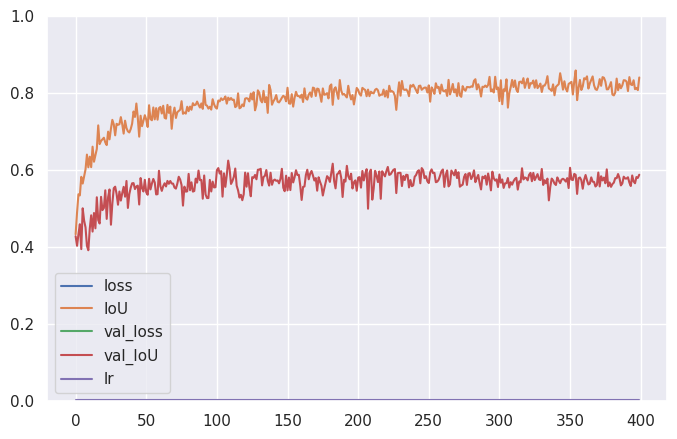

In [ ]:
#plotting training values
import seaborn as sns
sns.set()


pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

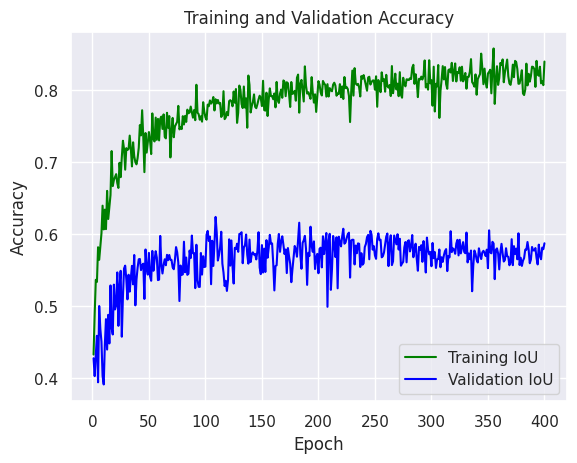

In [ ]:

IoU = history.history['IoU']
val_IoU = history.history['val_IoU']
epochs = range(1, len(IoU) + 1)

#accuracy plot
plt.plot(epochs, IoU, color='green', label='Training IoU')
plt.plot(epochs, val_IoU, color='blue', label='Validation IoU')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
img=plt.imread('Racoon Images/images/raccoon-2.jpg')

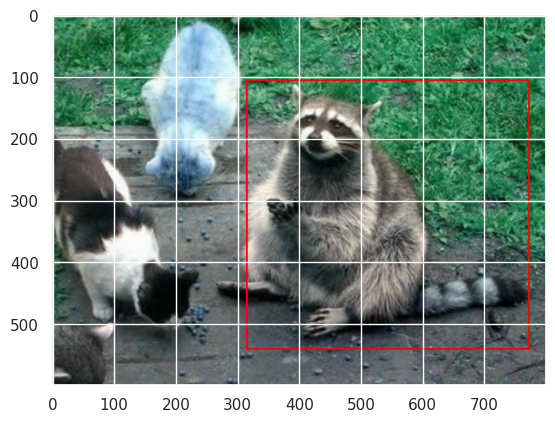

In [ ]:
plt.imshow(img)

In [ ]:
image_height, image_width, _ = img.shape
image = cv2.resize(img,(new_size,new_size))
image = image / 255.0

In [ ]:
image.shape

(128, 128, 3)

In [ ]:
image=np.expand_dims(image,axis=0)

In [ ]:
region = model.predict(image)[0]

1/1 [==============================] - 0s 139ms/step


In [ ]:
region

array([ 43.081882,  21.61456 , 115.46282 , 112.44021 ], dtype=float32)

In [ ]:
x0 = int(region[0] * image_width / new_size)
y0 = int(region[1] * image_height / new_size)
x1 = int((region[2]) * image_width / new_size)
y1 = int((region[3]) * image_height / new_size)

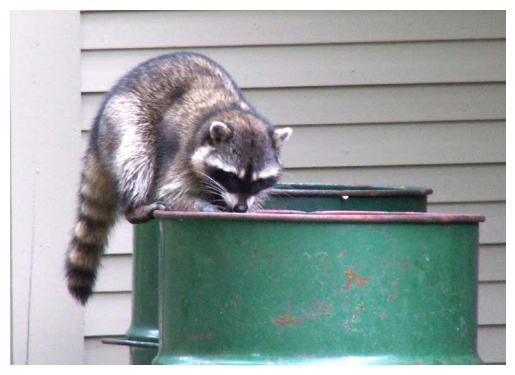

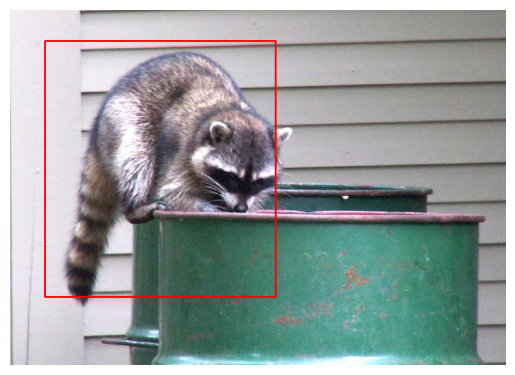

In [ ]:
# Display the image
img=plt.imread('Racoon Images/images/raccoon-2.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()
# Create a Rectangle patch
cv2.rectangle(img,(x0, y0), ((x1 - x0) , (y1 - y0)) , (255,0,0),2)

# Add the patch to the Axes
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
#showing training images with labels
df=pd.read_csv('/content/drive/MyDrive/Racoon Detection/train_labels_.csv')[161:]
plt.figure(figsize=(20,20))
for n , i in enumerate(range(12)) :
    plt.subplot(3,4,n+1)

    img = cv2.imread(trainpath+str(df.iloc[i,0]))
    org_img=img.copy()

    image_height, image_width, _ = img.shape


    img = cv2.resize(img,(new_size,new_size))
    img = img / 255.0
    img=np.expand_dims(img,axis=0)
    region = model.predict(img)[0]

    x0 = int(region[0] * image_width / new_size)
    y0 = int(region[1] * image_height / new_size)
    x1 = int((region[2]) * image_width / new_size)
    y1 = int((region[3]) * image_height / new_size)

    cv2.rectangle(org_img,(x0, y0), ((x1 - x0) , (y1 - y0)) , (255,0,0),2)
    plt.imshow(org_img)
    plt.axis('off')



In [70]:
from tensorflow.keras.backend import epsilon
def loss(gt,pred):
    intersections = 0
    unions = 0
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height

    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

#     Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
        if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
            intersections += intersection[j]
            unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + epsilon()), 4)
    iou = iou.astype(np.float32)
    return iou

def IoU(y_true, y_pred):
    iou = tf.py_function(loss, [y_true, y_pred], tf.float32)
    return iou

In [71]:
#callbacks
EarlyStop=EarlyStopping(patience=10,monitor='val_iou',restore_best_weights=True)  # val_IoU   val_iou  patience=5, 10
Reduce_LR=ReduceLROnPlateau(monitor='val_iou',verbose=2,factor=0.5,min_lr=0.00001)
model_check=ModelCheckpoint('model.hdf5',monitor='val_iou',verbose=1,save_best_only=True) # True
callback=[EarlyStop , Reduce_LR,model_check]

#optimizer
optimizer_adam=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

In [72]:
from tensorflow.keras.applications.mobilenet import MobileNet
MB=MobileNet(include_top=False,input_shape=(128,128,3))
MB.trainable=True

In [73]:
model1=Sequential([
                    MB,


                    Flatten(),
                    Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                    Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                    Dense(4,activation='relu',kernel_initializer='glorot_normal')

])
optimizer_adam=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)
model1.compile(optimizer=optimizer_adam, loss='mse', metrics=[IoU])



In [74]:
history1=model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=400,batch_size=4,
                  steps_per_epoch=len(X_train)//4,
                  callbacks=callback, verbose=1)

Epoch 1/400
40/40 [==============================] - ETA: 0s - loss: 1068.1649 - IoU: 0.3851

40/40 [==============================] - 19s 61ms/step - loss: 1068.1649 - IoU: 0.3851 - val_loss: 1785.7715 - val_IoU: 0.4455 - lr: 0.0010
Epoch 2/400
40/40 [==============================] - ETA: 0s - loss: 663.9150 - IoU: 0.4407

40/40 [==============================] - 2s 41ms/step - loss: 663.9150 - IoU: 0.4407 - val_loss: 4520.4175 - val_IoU: 0.3022 - lr: 0.0010
Epoch 3/400
39/40 [============================>.] - ETA: 0s - loss: 585.1167 - IoU: 0.4760

40/40 [==============================] - 1s 37ms/step - loss: 581.9581 - IoU: 0.4770 - val_loss: 1479.7416 - val_IoU: 0.4778 - lr: 0.0010
Epoch 4/400
39/40 [============================>.] - ETA: 0s - loss: 554.5993 - IoU: 0.4542

40/40 [==============================] - 2s 38ms/step - loss: 549.1109 - IoU: 0.4571 - val_loss: 679.8218 - val_IoU: 0.5678 - lr: 0.0010
Epoch 5/400
39/40 [============================>.] - ETA: 0s - loss: 500.4120 - IoU: 0.4811

40/40 [==============================] - 1s 37ms/step - loss: 506.5185 - IoU: 0.4795 - val_loss: 504.4996 - val_IoU: 0.5092 - lr: 0.0010
Epoch 6/400
39/40 [============================>.] - ETA: 0s - loss: 508.6577 - IoU: 0.4773

40/40 [==============================] - 2s 40ms/step - loss: 502.1168 - IoU: 0.4795 - val_loss: 515.3962 - val_IoU: 0.5369 - lr: 0.0010
Epoch 7/400
40/40 [==============================] - ETA: 0s - loss: 462.6066 - IoU: 0.4849

40/40 [==============================] - 2s 52ms/step - loss: 462.6066 - IoU: 0.4849 - val_loss: 686.4969 - val_IoU: 0.5712 - lr: 0.0010
Epoch 8/400
40/40 [==============================] - ETA: 0s - loss: 460.2895 - IoU: 0.5034

40/40 [==============================] - 2s 55ms/step - loss: 460.2895 - IoU: 0.5034 - val_loss: 608.8267 - val_IoU: 0.5325 - lr: 0.0010
Epoch 9/400
40/40 [==============================] - ETA: 0s - loss: 463.7602 - IoU: 0.4841

40/40 [==============================] - 2s 40ms/step - loss: 463.7602 - IoU: 0.4841 - val_loss: 514.2973 - val_IoU: 0.5223 - lr: 0.0010
Epoch 10/400
39/40 [============================>.] - ETA: 0s - loss: 440.5616 - IoU: 0.4909

40/40 [==============================] - 2s 38ms/step - loss: 434.7458 - IoU: 0.4937 - val_loss: 449.4381 - val_IoU: 0.5345 - lr: 0.0010
Epoch 11/400
39/40 [============================>.] - ETA: 0s - loss: 498.6323 - IoU: 0.4950

40/40 [==============================] - 2s 41ms/step - loss: 495.2355 - IoU: 0.4954 - val_loss: 545.8169 - val_IoU: 0.5236 - lr: 0.0010
Epoch 12/400
40/40 [==============================] - ETA: 0s - loss: 403.0945 - IoU: 0.5047

40/40 [==============================] - 2s 40ms/step - loss: 403.0945 - IoU: 0.5047 - val_loss: 402.3983 - val_IoU: 0.5562 - lr: 0.0010
Epoch 13/400
40/40 [==============================] - ETA: 0s - loss: 457.9525 - IoU: 0.5041

40/40 [==============================] - 2s 43ms/step - loss: 457.9525 - IoU: 0.5041 - val_loss: 400.9956 - val_IoU: 0.5303 - lr: 0.0010
Epoch 14/400
39/40 [============================>.] - ETA: 0s - loss: 414.1512 - IoU: 0.4873

40/40 [==============================] - 2s 41ms/step - loss: 417.4202 - IoU: 0.4856 - val_loss: 430.0568 - val_IoU: 0.5126 - lr: 0.0010
Epoch 15/400
40/40 [==============================] - ETA: 0s - loss: 472.8415 - IoU: 0.4960

40/40 [==============================] - 2s 51ms/step - loss: 472.8415 - IoU: 0.4960 - val_loss: 413.9672 - val_IoU: 0.5488 - lr: 0.0010
Epoch 16/400
40/40 [==============================] - ETA: 0s - loss: 436.0506 - IoU: 0.4973

40/40 [==============================] - 2s 54ms/step - loss: 436.0506 - IoU: 0.4973 - val_loss: 438.6903 - val_IoU: 0.4966 - lr: 0.0010
Epoch 17/400
40/40 [==============================] - ETA: 0s - loss: 452.1194 - IoU: 0.4914

40/40 [==============================] - 2s 38ms/step - loss: 452.1194 - IoU: 0.4914 - val_loss: 434.4521 - val_IoU: 0.5283 - lr: 0.0010
Epoch 18/400
39/40 [============================>.] - ETA: 0s - loss: 430.5842 - IoU: 0.4980

40/40 [==============================] - 2s 38ms/step - loss: 436.0318 - IoU: 0.4951 - val_loss: 410.7536 - val_IoU: 0.5324 - lr: 0.0010
Epoch 19/400
39/40 [============================>.] - ETA: 0s - loss: 423.9283 - IoU: 0.5155

40/40 [==============================] - 2s 40ms/step - loss: 427.3774 - IoU: 0.5144 - val_loss: 452.0908 - val_IoU: 0.4646 - lr: 0.0010
Epoch 20/400
39/40 [============================>.] - ETA: 0s - loss: 473.8208 - IoU: 0.4766

40/40 [==============================] - 2s 38ms/step - loss: 466.7991 - IoU: 0.4807 - val_loss: 471.2279 - val_IoU: 0.5743 - lr: 0.0010
Epoch 21/400
39/40 [============================>.] - ETA: 0s - loss: 433.9832 - IoU: 0.5026

40/40 [==============================] - 2s 40ms/step - loss: 439.0291 - IoU: 0.5008 - val_loss: 432.2528 - val_IoU: 0.5489 - lr: 0.0010
Epoch 22/400
39/40 [============================>.] - ETA: 0s - loss: 413.8814 - IoU: 0.5017

40/40 [==============================] - 2s 39ms/step - loss: 408.4705 - IoU: 0.5037 - val_loss: 406.4194 - val_IoU: 0.5446 - lr: 0.0010
Epoch 23/400
40/40 [==============================] - ETA: 0s - loss: 472.5898 - IoU: 0.4886

40/40 [==============================] - 2s 52ms/step - loss: 472.5898 - IoU: 0.4886 - val_loss: 413.2244 - val_IoU: 0.5046 - lr: 0.0010
Epoch 24/400
40/40 [==============================] - ETA: 0s - loss: 404.9589 - IoU: 0.5033

40/40 [==============================] - 2s 55ms/step - loss: 404.9589 - IoU: 0.5033 - val_loss: 400.9604 - val_IoU: 0.5559 - lr: 0.0010
Epoch 25/400
40/40 [==============================] - ETA: 0s - loss: 461.9695 - IoU: 0.5092

40/40 [==============================] - 3s 80ms/step - loss: 461.9695 - IoU: 0.5092 - val_loss: 407.8225 - val_IoU: 0.5411 - lr: 0.0010
Epoch 26/400
39/40 [============================>.] - ETA: 0s - loss: 376.9409 - IoU: 0.5155

40/40 [==============================] - 2s 53ms/step - loss: 380.4469 - IoU: 0.5152 - val_loss: 386.8512 - val_IoU: 0.4972 - lr: 0.0010
Epoch 27/400
39/40 [============================>.] - ETA: 0s - loss: 424.3623 - IoU: 0.5012

40/40 [==============================] - 2s 40ms/step - loss: 429.5546 - IoU: 0.5004 - val_loss: 427.5787 - val_IoU: 0.5386 - lr: 0.0010
Epoch 28/400
39/40 [============================>.] - ETA: 0s - loss: 396.2513 - IoU: 0.5071

40/40 [==============================] - 2s 40ms/step - loss: 393.6793 - IoU: 0.5090 - val_loss: 415.3515 - val_IoU: 0.5423 - lr: 0.0010
Epoch 29/400
39/40 [============================>.] - ETA: 0s - loss: 453.6682 - IoU: 0.4957

40/40 [==============================] - 2s 39ms/step - loss: 449.4987 - IoU: 0.4989 - val_loss: 438.3478 - val_IoU: 0.5706 - lr: 0.0010
Epoch 30/400
40/40 [==============================] - ETA: 0s - loss: 434.9614 - IoU: 0.5051

40/40 [==============================] - 2s 59ms/step - loss: 434.9614 - IoU: 0.5051 - val_loss: 411.6174 - val_IoU: 0.5182 - lr: 0.0010
Epoch 31/400
40/40 [==============================] - ETA: 0s - loss: 395.4871 - IoU: 0.5233

40/40 [==============================] - 2s 50ms/step - loss: 395.4871 - IoU: 0.5233 - val_loss: 387.5649 - val_IoU: 0.5012 - lr: 0.0010
Epoch 32/400
39/40 [============================>.] - ETA: 0s - loss: 413.8541 - IoU: 0.4954

40/40 [==============================] - 2s 40ms/step - loss: 409.6329 - IoU: 0.4972 - val_loss: 415.5005 - val_IoU: 0.5251 - lr: 0.0010
Epoch 33/400
40/40 [==============================] - ETA: 0s - loss: 443.8816 - IoU: 0.4964

40/40 [==============================] - 2s 39ms/step - loss: 443.8816 - IoU: 0.4964 - val_loss: 411.9157 - val_IoU: 0.5237 - lr: 0.0010
Epoch 34/400
39/40 [============================>.] - ETA: 0s - loss: 409.4754 - IoU: 0.5017

40/40 [==============================] - 2s 39ms/step - loss: 403.4120 - IoU: 0.5049 - val_loss: 380.1047 - val_IoU: 0.5087 - lr: 0.0010
Epoch 35/400
39/40 [============================>.] - ETA: 0s - loss: 394.3341 - IoU: 0.5108

40/40 [==============================] - 2s 39ms/step - loss: 390.1397 - IoU: 0.5148 - val_loss: 389.3978 - val_IoU: 0.5419 - lr: 0.0010
Epoch 36/400
39/40 [============================>.] - ETA: 0s - loss: 425.7610 - IoU: 0.4997

40/40 [==============================] - 2s 38ms/step - loss: 418.1364 - IoU: 0.5030 - val_loss: 374.0011 - val_IoU: 0.5343 - lr: 0.0010
Epoch 37/400
39/40 [============================>.] - ETA: 0s - loss: 424.5834 - IoU: 0.5062

40/40 [==============================] - 2s 38ms/step - loss: 424.1234 - IoU: 0.5089 - val_loss: 381.2086 - val_IoU: 0.5563 - lr: 0.0010
Epoch 38/400
40/40 [==============================] - ETA: 0s - loss: 403.5327 - IoU: 0.5045

40/40 [==============================] - 2s 56ms/step - loss: 403.5327 - IoU: 0.5045 - val_loss: 407.8598 - val_IoU: 0.4614 - lr: 0.0010
Epoch 39/400
40/40 [==============================] - ETA: 0s - loss: 433.1127 - IoU: 0.5011

40/40 [==============================] - 2s 51ms/step - loss: 433.1127 - IoU: 0.5011 - val_loss: 409.0493 - val_IoU: 0.5328 - lr: 0.0010
Epoch 40/400
39/40 [============================>.] - ETA: 0s - loss: 414.3396 - IoU: 0.5257

40/40 [==============================] - 2s 41ms/step - loss: 431.2314 - IoU: 0.5186 - val_loss: 391.1177 - val_IoU: 0.5057 - lr: 0.0010
Epoch 41/400
39/40 [============================>.] - ETA: 0s - loss: 404.4777 - IoU: 0.5071

40/40 [==============================] - 2s 38ms/step - loss: 402.2648 - IoU: 0.5121 - val_loss: 413.1034 - val_IoU: 0.5016 - lr: 0.0010
Epoch 42/400
39/40 [============================>.] - ETA: 0s - loss: 421.5192 - IoU: 0.5043

40/40 [==============================] - 2s 38ms/step - loss: 414.8016 - IoU: 0.5079 - val_loss: 404.0856 - val_IoU: 0.5612 - lr: 0.0010
Epoch 43/400
39/40 [============================>.] - ETA: 0s - loss: 433.9414 - IoU: 0.5033

40/40 [==============================] - 2s 40ms/step - loss: 426.5480 - IoU: 0.5048 - val_loss: 406.6492 - val_IoU: 0.4855 - lr: 0.0010
Epoch 44/400
39/40 [============================>.] - ETA: 0s - loss: 430.5376 - IoU: 0.4917

40/40 [==============================] - 2s 40ms/step - loss: 424.6837 - IoU: 0.4969 - val_loss: 372.0510 - val_IoU: 0.5369 - lr: 0.0010
Epoch 45/400
39/40 [============================>.] - ETA: 0s - loss: 383.9044 - IoU: 0.5192

40/40 [==============================] - 2s 38ms/step - loss: 379.9811 - IoU: 0.5213 - val_loss: 402.8995 - val_IoU: 0.5580 - lr: 0.0010
Epoch 46/400
39/40 [============================>.] - ETA: 0s - loss: 406.8282 - IoU: 0.4994

40/40 [==============================] - 2s 57ms/step - loss: 406.8119 - IoU: 0.5008 - val_loss: 411.0396 - val_IoU: 0.5273 - lr: 0.0010
Epoch 47/400
39/40 [============================>.] - ETA: 0s - loss: 449.8735 - IoU: 0.5091

40/40 [==============================] - 2s 50ms/step - loss: 446.3273 - IoU: 0.5097 - val_loss: 396.4190 - val_IoU: 0.5184 - lr: 0.0010
Epoch 48/400
40/40 [==============================] - ETA: 0s - loss: 398.8764 - IoU: 0.5041

40/40 [==============================] - 2s 42ms/step - loss: 398.8764 - IoU: 0.5041 - val_loss: 387.5475 - val_IoU: 0.5277 - lr: 0.0010
Epoch 49/400
40/40 [==============================] - ETA: 0s - loss: 424.0394 - IoU: 0.5130

40/40 [==============================] - 2s 40ms/step - loss: 424.0394 - IoU: 0.5130 - val_loss: 397.6177 - val_IoU: 0.4755 - lr: 0.0010
Epoch 50/400
39/40 [============================>.] - ETA: 0s - loss: 399.3734 - IoU: 0.5215

40/40 [==============================] - 2s 39ms/step - loss: 409.3331 - IoU: 0.5158 - val_loss: 374.8222 - val_IoU: 0.5105 - lr: 0.0010
Epoch 51/400
39/40 [============================>.] - ETA: 0s - loss: 414.5543 - IoU: 0.5017

40/40 [==============================] - 2s 38ms/step - loss: 406.9984 - IoU: 0.5039 - val_loss: 405.4297 - val_IoU: 0.4749 - lr: 0.0010
Epoch 52/400
39/40 [============================>.] - ETA: 0s - loss: 375.9994 - IoU: 0.5126

40/40 [==============================] - 2s 38ms/step - loss: 382.3482 - IoU: 0.5095 - val_loss: 401.7710 - val_IoU: 0.5074 - lr: 0.0010
Epoch 53/400
39/40 [============================>.] - ETA: 0s - loss: 453.4569 - IoU: 0.4944

40/40 [==============================] - 2s 39ms/step - loss: 443.8640 - IoU: 0.4993 - val_loss: 396.7499 - val_IoU: 0.4851 - lr: 0.0010
Epoch 54/400
40/40 [==============================] - ETA: 0s - loss: 399.5549 - IoU: 0.5088

40/40 [==============================] - 2s 55ms/step - loss: 399.5549 - IoU: 0.5088 - val_loss: 385.3965 - val_IoU: 0.5441 - lr: 0.0010
Epoch 55/400
40/40 [==============================] - ETA: 0s - loss: 392.2890 - IoU: 0.5231

40/40 [==============================] - 2s 50ms/step - loss: 392.2890 - IoU: 0.5231 - val_loss: 401.4967 - val_IoU: 0.5219 - lr: 0.0010
Epoch 56/400
39/40 [============================>.] - ETA: 0s - loss: 394.4352 - IoU: 0.4954

40/40 [==============================] - 2s 40ms/step - loss: 398.0468 - IoU: 0.4926 - val_loss: 393.0199 - val_IoU: 0.5336 - lr: 0.0010
Epoch 57/400
39/40 [============================>.] - ETA: 0s - loss: 436.0306 - IoU: 0.5247

40/40 [==============================] - 2s 40ms/step - loss: 430.6514 - IoU: 0.5261 - val_loss: 414.5233 - val_IoU: 0.5361 - lr: 0.0010
Epoch 58/400
39/40 [============================>.] - ETA: 0s - loss: 392.7910 - IoU: 0.5078

40/40 [==============================] - 2s 39ms/step - loss: 393.2365 - IoU: 0.5062 - val_loss: 403.4029 - val_IoU: 0.5278 - lr: 0.0010
Epoch 59/400
39/40 [============================>.] - ETA: 0s - loss: 419.9421 - IoU: 0.5192

40/40 [==============================] - 2s 38ms/step - loss: 421.6512 - IoU: 0.5162 - val_loss: 424.7935 - val_IoU: 0.5425 - lr: 0.0010
Epoch 60/400
39/40 [============================>.] - ETA: 0s - loss: 359.1646 - IoU: 0.5234

40/40 [==============================] - 2s 38ms/step - loss: 355.2915 - IoU: 0.5228 - val_loss: 380.7239 - val_IoU: 0.4908 - lr: 0.0010
Epoch 61/400
39/40 [============================>.] - ETA: 0s - loss: 479.3064 - IoU: 0.4818

40/40 [==============================] - 2s 38ms/step - loss: 475.5573 - IoU: 0.4812 - val_loss: 387.6200 - val_IoU: 0.4780 - lr: 0.0010
Epoch 62/400
39/40 [============================>.] - ETA: 0s - loss: 373.1830 - IoU: 0.5161

40/40 [==============================] - 2s 55ms/step - loss: 370.1931 - IoU: 0.5183 - val_loss: 362.4899 - val_IoU: 0.5222 - lr: 0.0010
Epoch 63/400
39/40 [============================>.] - ETA: 0s - loss: 436.5058 - IoU: 0.5266

40/40 [==============================] - 2s 53ms/step - loss: 437.7232 - IoU: 0.5265 - val_loss: 389.7316 - val_IoU: 0.5540 - lr: 0.0010
Epoch 64/400
39/40 [============================>.] - ETA: 0s - loss: 363.1683 - IoU: 0.5229

40/40 [==============================] - 2s 40ms/step - loss: 363.5668 - IoU: 0.5220 - val_loss: 387.7552 - val_IoU: 0.5132 - lr: 0.0010
Epoch 65/400
39/40 [============================>.] - ETA: 0s - loss: 460.0490 - IoU: 0.4814

40/40 [==============================] - 2s 40ms/step - loss: 470.9752 - IoU: 0.4812 - val_loss: 389.4807 - val_IoU: 0.5588 - lr: 0.0010
Epoch 66/400
40/40 [==============================] - ETA: 0s - loss: 364.4569 - IoU: 0.5246

40/40 [==============================] - 2s 41ms/step - loss: 364.4569 - IoU: 0.5246 - val_loss: 408.2815 - val_IoU: 0.5288 - lr: 0.0010
Epoch 67/400
39/40 [============================>.] - ETA: 0s - loss: 403.3889 - IoU: 0.5278

40/40 [==============================] - 2s 39ms/step - loss: 400.5121 - IoU: 0.5255 - val_loss: 389.8083 - val_IoU: 0.5559 - lr: 0.0010
Epoch 68/400
39/40 [============================>.] - ETA: 0s - loss: 442.7867 - IoU: 0.4887

40/40 [==============================] - 2s 41ms/step - loss: 442.9138 - IoU: 0.4880 - val_loss: 413.4935 - val_IoU: 0.5559 - lr: 0.0010
Epoch 69/400
40/40 [==============================] - ETA: 0s - loss: 385.2138 - IoU: 0.5125

40/40 [==============================] - 2s 49ms/step - loss: 385.2138 - IoU: 0.5125 - val_loss: 390.4837 - val_IoU: 0.5640 - lr: 0.0010
Epoch 70/400
40/40 [==============================] - ETA: 0s - loss: 410.5095 - IoU: 0.5263

40/40 [==============================] - 3s 70ms/step - loss: 410.5095 - IoU: 0.5263 - val_loss: 401.3930 - val_IoU: 0.5524 - lr: 0.0010
Epoch 71/400
40/40 [==============================] - ETA: 0s - loss: 415.0052 - IoU: 0.5127

40/40 [==============================] - 3s 68ms/step - loss: 415.0052 - IoU: 0.5127 - val_loss: 405.6737 - val_IoU: 0.5250 - lr: 0.0010
Epoch 72/400
40/40 [==============================] - ETA: 0s - loss: 356.9229 - IoU: 0.5353

40/40 [==============================] - 2s 47ms/step - loss: 356.9229 - IoU: 0.5353 - val_loss: 383.0959 - val_IoU: 0.5311 - lr: 0.0010
Epoch 73/400
39/40 [============================>.] - ETA: 0s - loss: 438.2561 - IoU: 0.4884

40/40 [==============================] - 2s 41ms/step - loss: 438.5499 - IoU: 0.4889 - val_loss: 385.5222 - val_IoU: 0.5304 - lr: 0.0010
Epoch 74/400
39/40 [============================>.] - ETA: 0s - loss: 395.6351 - IoU: 0.5340

40/40 [==============================] - 2s 40ms/step - loss: 394.0083 - IoU: 0.5323 - val_loss: 407.8354 - val_IoU: 0.5515 - lr: 0.0010
Epoch 75/400
40/40 [==============================] - ETA: 0s - loss: 428.6929 - IoU: 0.5220

40/40 [==============================] - 2s 39ms/step - loss: 428.6929 - IoU: 0.5220 - val_loss: 412.1452 - val_IoU: 0.5468 - lr: 0.0010
Epoch 76/400
39/40 [============================>.] - ETA: 0s - loss: 374.7155 - IoU: 0.5113

40/40 [==============================] - 2s 39ms/step - loss: 382.6221 - IoU: 0.5058 - val_loss: 393.9008 - val_IoU: 0.5111 - lr: 0.0010
Epoch 77/400
39/40 [============================>.] - ETA: 0s - loss: 417.4714 - IoU: 0.5061

40/40 [==============================] - 2s 39ms/step - loss: 421.8145 - IoU: 0.5052 - val_loss: 393.2905 - val_IoU: 0.5444 - lr: 0.0010
Epoch 78/400
39/40 [============================>.] - ETA: 0s - loss: 398.8245 - IoU: 0.5169

40/40 [==============================] - 2s 46ms/step - loss: 395.2767 - IoU: 0.5156 - val_loss: 419.1719 - val_IoU: 0.4631 - lr: 0.0010
Epoch 79/400
40/40 [==============================] - ETA: 0s - loss: 392.8868 - IoU: 0.5342

40/40 [==============================] - 2s 57ms/step - loss: 392.8868 - IoU: 0.5342 - val_loss: 420.1001 - val_IoU: 0.5218 - lr: 0.0010
Epoch 80/400
39/40 [============================>.] - ETA: 0s - loss: 435.7197 - IoU: 0.5030

40/40 [==============================] - 2s 42ms/step - loss: 446.5776 - IoU: 0.4978 - val_loss: 419.2644 - val_IoU: 0.5745 - lr: 0.0010
Epoch 81/400
40/40 [==============================] - ETA: 0s - loss: 370.4342 - IoU: 0.5303

40/40 [==============================] - 2s 39ms/step - loss: 370.4342 - IoU: 0.5303 - val_loss: 397.2483 - val_IoU: 0.5140 - lr: 0.0010
Epoch 82/400
39/40 [============================>.] - ETA: 0s - loss: 407.8646 - IoU: 0.5186

40/40 [==============================] - 2s 42ms/step - loss: 405.8396 - IoU: 0.5205 - val_loss: 394.1455 - val_IoU: 0.5370 - lr: 0.0010
Epoch 83/400
40/40 [==============================] - ETA: 0s - loss: 401.3365 - IoU: 0.5198

40/40 [==============================] - 2s 42ms/step - loss: 401.3365 - IoU: 0.5198 - val_loss: 389.7114 - val_IoU: 0.5469 - lr: 0.0010
Epoch 84/400
39/40 [============================>.] - ETA: 0s - loss: 401.2082 - IoU: 0.5029

40/40 [==============================] - 2s 39ms/step - loss: 397.0861 - IoU: 0.5054 - val_loss: 403.7622 - val_IoU: 0.5469 - lr: 0.0010
Epoch 85/400
39/40 [============================>.] - ETA: 0s - loss: 423.5745 - IoU: 0.5057

40/40 [==============================] - 2s 39ms/step - loss: 414.7835 - IoU: 0.5108 - val_loss: 391.7141 - val_IoU: 0.5473 - lr: 0.0010
Epoch 86/400
40/40 [==============================] - ETA: 0s - loss: 396.9754 - IoU: 0.5104

40/40 [==============================] - 2s 53ms/step - loss: 396.9754 - IoU: 0.5104 - val_loss: 474.7510 - val_IoU: 0.5476 - lr: 0.0010
Epoch 87/400
40/40 [==============================] - ETA: 0s - loss: 408.1849 - IoU: 0.5114

40/40 [==============================] - 2s 56ms/step - loss: 408.1849 - IoU: 0.5114 - val_loss: 439.0480 - val_IoU: 0.5025 - lr: 0.0010
Epoch 88/400
39/40 [============================>.] - ETA: 0s - loss: 417.9640 - IoU: 0.5081

40/40 [==============================] - 2s 39ms/step - loss: 418.7775 - IoU: 0.5058 - val_loss: 423.5033 - val_IoU: 0.5273 - lr: 0.0010
Epoch 89/400
39/40 [============================>.] - ETA: 0s - loss: 406.7893 - IoU: 0.5180

40/40 [==============================] - 2s 38ms/step - loss: 407.0149 - IoU: 0.5144 - val_loss: 424.3642 - val_IoU: 0.4809 - lr: 0.0010
Epoch 90/400
39/40 [============================>.] - ETA: 0s - loss: 382.0080 - IoU: 0.5223

40/40 [==============================] - 2s 40ms/step - loss: 383.3968 - IoU: 0.5193 - val_loss: 422.7322 - val_IoU: 0.5452 - lr: 0.0010
Epoch 91/400
39/40 [============================>.] - ETA: 0s - loss: 398.7906 - IoU: 0.5190

40/40 [==============================] - 2s 41ms/step - loss: 394.6713 - IoU: 0.5192 - val_loss: 428.6698 - val_IoU: 0.5369 - lr: 0.0010
Epoch 92/400
39/40 [============================>.] - ETA: 0s - loss: 422.3249 - IoU: 0.4978

40/40 [==============================] - 2s 39ms/step - loss: 428.0951 - IoU: 0.4946 - val_loss: 418.6737 - val_IoU: 0.5131 - lr: 0.0010
Epoch 93/400
39/40 [============================>.] - ETA: 0s - loss: 400.1821 - IoU: 0.5123

40/40 [==============================] - 2s 38ms/step - loss: 402.2609 - IoU: 0.5113 - val_loss: 411.7616 - val_IoU: 0.5494 - lr: 0.0010
Epoch 94/400
39/40 [============================>.] - ETA: 0s - loss: 401.9234 - IoU: 0.5278

40/40 [==============================] - 2s 51ms/step - loss: 400.6588 - IoU: 0.5283 - val_loss: 418.3869 - val_IoU: 0.5410 - lr: 0.0010
Epoch 95/400
40/40 [==============================] - ETA: 0s - loss: 361.9683 - IoU: 0.5223

40/40 [==============================] - 2s 56ms/step - loss: 361.9683 - IoU: 0.5223 - val_loss: 402.1451 - val_IoU: 0.5377 - lr: 0.0010
Epoch 96/400
40/40 [==============================] - ETA: 0s - loss: 409.2935 - IoU: 0.4929

40/40 [==============================] - 2s 42ms/step - loss: 409.2935 - IoU: 0.4929 - val_loss: 420.8276 - val_IoU: 0.5478 - lr: 0.0010
Epoch 97/400
39/40 [============================>.] - ETA: 0s - loss: 401.8832 - IoU: 0.5362

40/40 [==============================] - 2s 41ms/step - loss: 400.5504 - IoU: 0.5335 - val_loss: 407.4446 - val_IoU: 0.5504 - lr: 0.0010
Epoch 98/400
40/40 [==============================] - ETA: 0s - loss: 403.3696 - IoU: 0.5130

40/40 [==============================] - 2s 41ms/step - loss: 403.3696 - IoU: 0.5130 - val_loss: 403.2499 - val_IoU: 0.4939 - lr: 0.0010
Epoch 99/400
39/40 [============================>.] - ETA: 0s - loss: 402.5877 - IoU: 0.5085

40/40 [==============================] - 2s 40ms/step - loss: 416.2808 - IoU: 0.5018 - val_loss: 394.9132 - val_IoU: 0.5189 - lr: 0.0010
Epoch 100/400
39/40 [============================>.] - ETA: 0s - loss: 429.8368 - IoU: 0.5104

40/40 [==============================] - 2s 42ms/step - loss: 423.9515 - IoU: 0.5110 - val_loss: 398.7741 - val_IoU: 0.5402 - lr: 0.0010
Epoch 101/400
39/40 [============================>.] - ETA: 0s - loss: 351.7285 - IoU: 0.5281

40/40 [==============================] - 2s 39ms/step - loss: 345.1781 - IoU: 0.5321 - val_loss: 396.9134 - val_IoU: 0.5311 - lr: 0.0010
Epoch 102/400
40/40 [==============================] - ETA: 0s - loss: 397.6678 - IoU: 0.5139

40/40 [==============================] - 2s 52ms/step - loss: 397.6678 - IoU: 0.5139 - val_loss: 410.6095 - val_IoU: 0.5287 - lr: 0.0010
Epoch 103/400
39/40 [============================>.] - ETA: 0s - loss: 434.1934 - IoU: 0.4969

40/40 [==============================] - 2s 55ms/step - loss: 430.3800 - IoU: 0.4984 - val_loss: 398.0130 - val_IoU: 0.5448 - lr: 0.0010
Epoch 104/400
40/40 [==============================] - ETA: 0s - loss: 417.6234 - IoU: 0.5332

40/40 [==============================] - 2s 39ms/step - loss: 417.6234 - IoU: 0.5332 - val_loss: 411.8222 - val_IoU: 0.4828 - lr: 0.0010
Epoch 105/400
39/40 [============================>.] - ETA: 0s - loss: 374.8705 - IoU: 0.5083

40/40 [==============================] - 2s 41ms/step - loss: 368.7715 - IoU: 0.5098 - val_loss: 394.7098 - val_IoU: 0.5216 - lr: 0.0010
Epoch 106/400
39/40 [============================>.] - ETA: 0s - loss: 396.3167 - IoU: 0.5135

40/40 [==============================] - 2s 40ms/step - loss: 406.8219 - IoU: 0.5089 - val_loss: 393.6952 - val_IoU: 0.5032 - lr: 0.0010
Epoch 107/400
39/40 [============================>.] - ETA: 0s - loss: 398.1468 - IoU: 0.5316

40/40 [==============================] - 2s 39ms/step - loss: 407.0659 - IoU: 0.5262 - val_loss: 388.7849 - val_IoU: 0.5240 - lr: 0.0010
Epoch 108/400
39/40 [============================>.] - ETA: 0s - loss: 366.0189 - IoU: 0.5213

40/40 [==============================] - 2s 40ms/step - loss: 369.3791 - IoU: 0.5217 - val_loss: 400.8165 - val_IoU: 0.5486 - lr: 0.0010
Epoch 109/400
40/40 [==============================] - ETA: 0s - loss: 394.5487 - IoU: 0.5268

40/40 [==============================] - 2s 42ms/step - loss: 394.5487 - IoU: 0.5268 - val_loss: 421.2438 - val_IoU: 0.5575 - lr: 0.0010
Epoch 110/400
40/40 [==============================] - ETA: 0s - loss: 429.7922 - IoU: 0.5086

40/40 [==============================] - 2s 54ms/step - loss: 429.7922 - IoU: 0.5086 - val_loss: 402.7757 - val_IoU: 0.5374 - lr: 0.0010
Epoch 111/400
39/40 [============================>.] - ETA: 0s - loss: 384.2974 - IoU: 0.5108

40/40 [==============================] - 2s 52ms/step - loss: 387.5973 - IoU: 0.5091 - val_loss: 401.3907 - val_IoU: 0.5511 - lr: 0.0010
Epoch 112/400
40/40 [==============================] - ETA: 0s - loss: 420.6296 - IoU: 0.5200

40/40 [==============================] - 2s 41ms/step - loss: 420.6296 - IoU: 0.5200 - val_loss: 405.4695 - val_IoU: 0.5441 - lr: 0.0010
Epoch 113/400
40/40 [==============================] - ETA: 0s - loss: 400.7561 - IoU: 0.5067

40/40 [==============================] - 2s 41ms/step - loss: 400.7561 - IoU: 0.5067 - val_loss: 426.7662 - val_IoU: 0.5714 - lr: 0.0010
Epoch 114/400
39/40 [============================>.] - ETA: 0s - loss: 359.5434 - IoU: 0.5408

40/40 [==============================] - 2s 39ms/step - loss: 363.8788 - IoU: 0.5369 - val_loss: 397.0472 - val_IoU: 0.5245 - lr: 0.0010
Epoch 115/400
39/40 [============================>.] - ETA: 0s - loss: 368.4954 - IoU: 0.5070

40/40 [==============================] - 2s 41ms/step - loss: 363.0016 - IoU: 0.5102 - val_loss: 369.8880 - val_IoU: 0.5433 - lr: 0.0010
Epoch 116/400
40/40 [==============================] - ETA: 0s - loss: 315.5054 - IoU: 0.5323

40/40 [==============================] - 2s 40ms/step - loss: 315.5054 - IoU: 0.5323 - val_loss: 374.8290 - val_IoU: 0.5310 - lr: 0.0010
Epoch 117/400
39/40 [============================>.] - ETA: 0s - loss: 319.6949 - IoU: 0.5402

40/40 [==============================] - 2s 43ms/step - loss: 336.0609 - IoU: 0.5333 - val_loss: 366.7696 - val_IoU: 0.5453 - lr: 0.0010
Epoch 118/400
40/40 [==============================] - ETA: 0s - loss: 279.6171 - IoU: 0.5687

40/40 [==============================] - 2s 58ms/step - loss: 279.6171 - IoU: 0.5687 - val_loss: 330.9114 - val_IoU: 0.5461 - lr: 0.0010
Epoch 119/400
39/40 [============================>.] - ETA: 0s - loss: 292.5505 - IoU: 0.5735

40/40 [==============================] - 2s 50ms/step - loss: 297.1924 - IoU: 0.5712 - val_loss: 335.0547 - val_IoU: 0.5374 - lr: 0.0010
Epoch 120/400
39/40 [============================>.] - ETA: 0s - loss: 284.9430 - IoU: 0.5781

40/40 [==============================] - 2s 39ms/step - loss: 280.2069 - IoU: 0.5818 - val_loss: 344.9624 - val_IoU: 0.5696 - lr: 0.0010
Epoch 121/400
39/40 [============================>.] - ETA: 0s - loss: 301.5166 - IoU: 0.5759

40/40 [==============================] - 2s 40ms/step - loss: 296.5704 - IoU: 0.5788 - val_loss: 353.9706 - val_IoU: 0.5122 - lr: 0.0010
Epoch 122/400
39/40 [============================>.] - ETA: 0s - loss: 285.0698 - IoU: 0.5803

40/40 [==============================] - 2s 40ms/step - loss: 284.3153 - IoU: 0.5818 - val_loss: 338.5853 - val_IoU: 0.5425 - lr: 0.0010
Epoch 123/400
39/40 [============================>.] - ETA: 0s - loss: 286.6911 - IoU: 0.5776

40/40 [==============================] - 2s 41ms/step - loss: 285.0878 - IoU: 0.5832 - val_loss: 343.3005 - val_IoU: 0.5546 - lr: 0.0010
Epoch 124/400
39/40 [============================>.] - ETA: 0s - loss: 292.7598 - IoU: 0.5807

40/40 [==============================] - 2s 39ms/step - loss: 287.8651 - IoU: 0.5835 - val_loss: 351.4409 - val_IoU: 0.5771 - lr: 0.0010
Epoch 125/400
40/40 [==============================] - ETA: 0s - loss: 284.0788 - IoU: 0.5844

40/40 [==============================] - 2s 42ms/step - loss: 284.0788 - IoU: 0.5844 - val_loss: 355.4020 - val_IoU: 0.5392 - lr: 0.0010
Epoch 126/400
40/40 [==============================] - ETA: 0s - loss: 280.2271 - IoU: 0.5860

40/40 [==============================] - 2s 56ms/step - loss: 280.2271 - IoU: 0.5860 - val_loss: 343.7152 - val_IoU: 0.5592 - lr: 0.0010
Epoch 127/400
39/40 [============================>.] - ETA: 0s - loss: 281.1162 - IoU: 0.5991

40/40 [==============================] - 2s 49ms/step - loss: 283.8116 - IoU: 0.5940 - val_loss: 360.5371 - val_IoU: 0.5256 - lr: 0.0010
Epoch 128/400
39/40 [============================>.] - ETA: 0s - loss: 288.3088 - IoU: 0.5638

40/40 [==============================] - 2s 39ms/step - loss: 286.1506 - IoU: 0.5653 - val_loss: 351.2079 - val_IoU: 0.5709 - lr: 0.0010
Epoch 129/400
39/40 [============================>.] - ETA: 0s - loss: 279.2318 - IoU: 0.5975

40/40 [==============================] - 2s 38ms/step - loss: 273.5803 - IoU: 0.6009 - val_loss: 336.4671 - val_IoU: 0.5623 - lr: 0.0010
Epoch 130/400
39/40 [============================>.] - ETA: 0s - loss: 248.1523 - IoU: 0.6134

40/40 [==============================] - 2s 40ms/step - loss: 246.4162 - IoU: 0.6148 - val_loss: 352.4797 - val_IoU: 0.5587 - lr: 0.0010
Epoch 131/400
39/40 [============================>.] - ETA: 0s - loss: 313.1767 - IoU: 0.5769

40/40 [==============================] - 2s 42ms/step - loss: 308.7506 - IoU: 0.5797 - val_loss: 351.3683 - val_IoU: 0.5627 - lr: 0.0010
Epoch 132/400
40/40 [==============================] - ETA: 0s - loss: 270.2842 - IoU: 0.5850

40/40 [==============================] - 2s 42ms/step - loss: 270.2842 - IoU: 0.5850 - val_loss: 350.8837 - val_IoU: 0.5317 - lr: 0.0010
Epoch 133/400
40/40 [==============================] - ETA: 0s - loss: 288.7456 - IoU: 0.5714

40/40 [==============================] - 2s 45ms/step - loss: 288.7456 - IoU: 0.5714 - val_loss: 350.8214 - val_IoU: 0.5660 - lr: 0.0010
Epoch 134/400
40/40 [==============================] - ETA: 0s - loss: 252.8043 - IoU: 0.6098

40/40 [==============================] - 2s 60ms/step - loss: 252.8043 - IoU: 0.6098 - val_loss: 354.0085 - val_IoU: 0.5624 - lr: 0.0010
Epoch 135/400
40/40 [==============================] - ETA: 0s - loss: 296.7264 - IoU: 0.5861

40/40 [==============================] - 2s 51ms/step - loss: 296.7264 - IoU: 0.5861 - val_loss: 361.9397 - val_IoU: 0.5337 - lr: 0.0010
Epoch 136/400
39/40 [============================>.] - ETA: 0s - loss: 266.6859 - IoU: 0.6003

40/40 [==============================] - 2s 39ms/step - loss: 263.0709 - IoU: 0.6030 - val_loss: 363.6835 - val_IoU: 0.5629 - lr: 0.0010
Epoch 137/400
39/40 [============================>.] - ETA: 0s - loss: 282.5027 - IoU: 0.5887

40/40 [==============================] - 2s 39ms/step - loss: 281.7537 - IoU: 0.5913 - val_loss: 354.2591 - val_IoU: 0.5682 - lr: 0.0010
Epoch 138/400
39/40 [============================>.] - ETA: 0s - loss: 302.4636 - IoU: 0.5781

40/40 [==============================] - 2s 39ms/step - loss: 297.1630 - IoU: 0.5800 - val_loss: 359.6013 - val_IoU: 0.5414 - lr: 0.0010
Epoch 139/400
39/40 [============================>.] - ETA: 0s - loss: 240.7296 - IoU: 0.6162

40/40 [==============================] - 2s 39ms/step - loss: 239.6044 - IoU: 0.6170 - val_loss: 353.3016 - val_IoU: 0.5422 - lr: 0.0010
Epoch 140/400
39/40 [============================>.] - ETA: 0s - loss: 296.2260 - IoU: 0.5770

40/40 [==============================] - 2s 42ms/step - loss: 295.2689 - IoU: 0.5778 - val_loss: 351.7473 - val_IoU: 0.5363 - lr: 0.0010
Epoch 141/400
40/40 [==============================] - ETA: 0s - loss: 302.8166 - IoU: 0.5708

40/40 [==============================] - 2s 46ms/step - loss: 302.8166 - IoU: 0.5708 - val_loss: 340.1534 - val_IoU: 0.5644 - lr: 0.0010
Epoch 142/400
39/40 [============================>.] - ETA: 0s - loss: 292.5487 - IoU: 0.5736

40/40 [==============================] - 2s 56ms/step - loss: 288.0638 - IoU: 0.5748 - val_loss: 360.5234 - val_IoU: 0.5195 - lr: 0.0010
Epoch 143/400
39/40 [============================>.] - ETA: 0s - loss: 252.7131 - IoU: 0.6086

40/40 [==============================] - 2s 49ms/step - loss: 254.6145 - IoU: 0.6066 - val_loss: 339.3600 - val_IoU: 0.5483 - lr: 0.0010
Epoch 144/400
40/40 [==============================] - ETA: 0s - loss: 248.3939 - IoU: 0.5995

40/40 [==============================] - 2s 42ms/step - loss: 248.3939 - IoU: 0.5995 - val_loss: 358.2951 - val_IoU: 0.5251 - lr: 0.0010
Epoch 145/400
40/40 [==============================] - ETA: 0s - loss: 300.8741 - IoU: 0.5839

40/40 [==============================] - 2s 42ms/step - loss: 300.8741 - IoU: 0.5839 - val_loss: 355.1234 - val_IoU: 0.5515 - lr: 0.0010
Epoch 146/400
39/40 [============================>.] - ETA: 0s - loss: 281.4147 - IoU: 0.5994

40/40 [==============================] - 2s 38ms/step - loss: 278.3194 - IoU: 0.6033 - val_loss: 346.7313 - val_IoU: 0.5536 - lr: 0.0010
Epoch 147/400
39/40 [============================>.] - ETA: 0s - loss: 256.1096 - IoU: 0.6070

40/40 [==============================] - 2s 39ms/step - loss: 254.7269 - IoU: 0.6070 - val_loss: 342.0697 - val_IoU: 0.5758 - lr: 0.0010
Epoch 148/400
39/40 [============================>.] - ETA: 0s - loss: 260.2954 - IoU: 0.5918

40/40 [==============================] - 2s 41ms/step - loss: 263.4068 - IoU: 0.5909 - val_loss: 347.3121 - val_IoU: 0.5480 - lr: 0.0010
Epoch 149/400
40/40 [==============================] - ETA: 0s - loss: 296.5737 - IoU: 0.5992

40/40 [==============================] - 2s 49ms/step - loss: 296.5737 - IoU: 0.5992 - val_loss: 330.5462 - val_IoU: 0.5554 - lr: 0.0010
Epoch 150/400
40/40 [==============================] - ETA: 0s - loss: 262.3312 - IoU: 0.5945

40/40 [==============================] - 2s 54ms/step - loss: 262.3312 - IoU: 0.5945 - val_loss: 335.4729 - val_IoU: 0.5705 - lr: 0.0010
Epoch 151/400
40/40 [==============================] - ETA: 0s - loss: 260.8904 - IoU: 0.6150

40/40 [==============================] - 2s 47ms/step - loss: 260.8904 - IoU: 0.6150 - val_loss: 350.8561 - val_IoU: 0.5358 - lr: 0.0010
Epoch 152/400
40/40 [==============================] - ETA: 0s - loss: 305.2757 - IoU: 0.5733

40/40 [==============================] - 2s 42ms/step - loss: 305.2757 - IoU: 0.5733 - val_loss: 348.4325 - val_IoU: 0.5466 - lr: 0.0010
Epoch 153/400
40/40 [==============================] - ETA: 0s - loss: 291.6958 - IoU: 0.5925

40/40 [==============================] - 2s 39ms/step - loss: 291.6958 - IoU: 0.5925 - val_loss: 327.9800 - val_IoU: 0.5453 - lr: 0.0010
Epoch 154/400
39/40 [============================>.] - ETA: 0s - loss: 277.2823 - IoU: 0.5906

40/40 [==============================] - 2s 39ms/step - loss: 271.4679 - IoU: 0.5957 - val_loss: 343.9186 - val_IoU: 0.5606 - lr: 0.0010
Epoch 155/400
39/40 [============================>.] - ETA: 0s - loss: 264.1978 - IoU: 0.6129

40/40 [==============================] - 2s 40ms/step - loss: 272.0094 - IoU: 0.6138 - val_loss: 343.1233 - val_IoU: 0.5284 - lr: 0.0010
Epoch 156/400
40/40 [==============================] - ETA: 0s - loss: 269.4160 - IoU: 0.5920

40/40 [==============================] - 2s 39ms/step - loss: 269.4160 - IoU: 0.5920 - val_loss: 348.7278 - val_IoU: 0.5616 - lr: 0.0010
Epoch 157/400
39/40 [============================>.] - ETA: 0s - loss: 281.6217 - IoU: 0.5914

40/40 [==============================] - 2s 48ms/step - loss: 284.1446 - IoU: 0.5881 - val_loss: 342.9213 - val_IoU: 0.5386 - lr: 0.0010
Epoch 158/400
40/40 [==============================] - ETA: 0s - loss: 276.8682 - IoU: 0.6004

40/40 [==============================] - 2s 57ms/step - loss: 276.8682 - IoU: 0.6004 - val_loss: 333.9846 - val_IoU: 0.5370 - lr: 0.0010
Epoch 159/400
39/40 [============================>.] - ETA: 0s - loss: 263.7576 - IoU: 0.6041

40/40 [==============================] - 2s 45ms/step - loss: 261.0388 - IoU: 0.6066 - val_loss: 347.2658 - val_IoU: 0.5381 - lr: 0.0010
Epoch 160/400
39/40 [============================>.] - ETA: 0s - loss: 265.3611 - IoU: 0.6097

40/40 [==============================] - 2s 38ms/step - loss: 260.1616 - IoU: 0.6127 - val_loss: 335.3107 - val_IoU: 0.5626 - lr: 0.0010
Epoch 161/400
39/40 [============================>.] - ETA: 0s - loss: 288.9934 - IoU: 0.5898

40/40 [==============================] - 2s 40ms/step - loss: 291.5417 - IoU: 0.5882 - val_loss: 323.0228 - val_IoU: 0.5843 - lr: 0.0010
Epoch 162/400
39/40 [============================>.] - ETA: 0s - loss: 264.6752 - IoU: 0.6067

40/40 [==============================] - 2s 39ms/step - loss: 261.7184 - IoU: 0.6062 - val_loss: 371.1056 - val_IoU: 0.4891 - lr: 0.0010
Epoch 163/400
39/40 [============================>.] - ETA: 0s - loss: 288.3689 - IoU: 0.5753

40/40 [==============================] - 2s 40ms/step - loss: 283.7761 - IoU: 0.5769 - val_loss: 355.0467 - val_IoU: 0.5345 - lr: 0.0010
Epoch 164/400
39/40 [============================>.] - ETA: 0s - loss: 282.6588 - IoU: 0.5872

40/40 [==============================] - 2s 42ms/step - loss: 281.0338 - IoU: 0.5924 - val_loss: 352.9023 - val_IoU: 0.5344 - lr: 0.0010
Epoch 165/400
40/40 [==============================] - ETA: 0s - loss: 274.2448 - IoU: 0.5981

40/40 [==============================] - 2s 52ms/step - loss: 274.2448 - IoU: 0.5981 - val_loss: 337.5008 - val_IoU: 0.5490 - lr: 0.0010
Epoch 166/400
40/40 [==============================] - ETA: 0s - loss: 279.1852 - IoU: 0.5872

40/40 [==============================] - 2s 54ms/step - loss: 279.1852 - IoU: 0.5872 - val_loss: 339.6944 - val_IoU: 0.5962 - lr: 0.0010
Epoch 167/400
39/40 [============================>.] - ETA: 0s - loss: 269.8676 - IoU: 0.6033

40/40 [==============================] - 2s 41ms/step - loss: 270.5407 - IoU: 0.6013 - val_loss: 334.7899 - val_IoU: 0.5592 - lr: 0.0010
Epoch 168/400
39/40 [============================>.] - ETA: 0s - loss: 267.6322 - IoU: 0.5900

40/40 [==============================] - 2s 39ms/step - loss: 280.6190 - IoU: 0.5857 - val_loss: 346.1022 - val_IoU: 0.5406 - lr: 0.0010
Epoch 169/400
40/40 [==============================] - ETA: 0s - loss: 267.3205 - IoU: 0.6004

40/40 [==============================] - 2s 44ms/step - loss: 267.3205 - IoU: 0.6004 - val_loss: 336.6617 - val_IoU: 0.5764 - lr: 0.0010
Epoch 170/400
40/40 [==============================] - ETA: 0s - loss: 284.1559 - IoU: 0.5961

40/40 [==============================] - 2s 40ms/step - loss: 284.1559 - IoU: 0.5961 - val_loss: 345.1649 - val_IoU: 0.5770 - lr: 0.0010
Epoch 171/400
40/40 [==============================] - ETA: 0s - loss: 248.3372 - IoU: 0.6108

40/40 [==============================] - 2s 40ms/step - loss: 248.3372 - IoU: 0.6108 - val_loss: 338.7177 - val_IoU: 0.5252 - lr: 0.0010
Epoch 172/400
39/40 [============================>.] - ETA: 0s - loss: 296.1304 - IoU: 0.5737

40/40 [==============================] - 2s 40ms/step - loss: 300.3597 - IoU: 0.5719 - val_loss: 328.8866 - val_IoU: 0.5681 - lr: 0.0010
Epoch 173/400
40/40 [==============================] - ETA: 0s - loss: 268.7127 - IoU: 0.6070

40/40 [==============================] - 2s 56ms/step - loss: 268.7127 - IoU: 0.6070 - val_loss: 336.1992 - val_IoU: 0.5670 - lr: 0.0010
Epoch 174/400
40/40 [==============================] - ETA: 0s - loss: 245.9053 - IoU: 0.6214

40/40 [==============================] - 2s 58ms/step - loss: 245.9053 - IoU: 0.6214 - val_loss: 321.0909 - val_IoU: 0.5550 - lr: 0.0010
Epoch 175/400
40/40 [==============================] - ETA: 0s - loss: 297.6587 - IoU: 0.5921

40/40 [==============================] - 2s 40ms/step - loss: 297.6587 - IoU: 0.5921 - val_loss: 325.2856 - val_IoU: 0.5568 - lr: 0.0010
Epoch 176/400
39/40 [============================>.] - ETA: 0s - loss: 277.5808 - IoU: 0.5655

40/40 [==============================] - 2s 42ms/step - loss: 283.0410 - IoU: 0.5633 - val_loss: 342.8180 - val_IoU: 0.5375 - lr: 0.0010
Epoch 177/400
39/40 [============================>.] - ETA: 0s - loss: 289.7267 - IoU: 0.6059

40/40 [==============================] - 2s 39ms/step - loss: 285.6549 - IoU: 0.6050 - val_loss: 343.0406 - val_IoU: 0.5249 - lr: 0.0010
Epoch 178/400
40/40 [==============================] - ETA: 0s - loss: 274.6532 - IoU: 0.5946

40/40 [==============================] - 2s 41ms/step - loss: 274.6532 - IoU: 0.5946 - val_loss: 340.2502 - val_IoU: 0.5320 - lr: 0.0010
Epoch 179/400
39/40 [============================>.] - ETA: 0s - loss: 260.6201 - IoU: 0.6199

40/40 [==============================] - 2s 41ms/step - loss: 258.6681 - IoU: 0.6219 - val_loss: 338.0161 - val_IoU: 0.5480 - lr: 0.0010
Epoch 180/400
39/40 [============================>.] - ETA: 0s - loss: 267.0149 - IoU: 0.5929

40/40 [==============================] - 2s 38ms/step - loss: 268.5878 - IoU: 0.5926 - val_loss: 338.2023 - val_IoU: 0.5313 - lr: 0.0010
Epoch 181/400
40/40 [==============================] - ETA: 0s - loss: 278.5582 - IoU: 0.5918

40/40 [==============================] - 2s 58ms/step - loss: 278.5582 - IoU: 0.5918 - val_loss: 332.6129 - val_IoU: 0.5422 - lr: 0.0010
Epoch 182/400
39/40 [============================>.] - ETA: 0s - loss: 249.2407 - IoU: 0.6287

40/40 [==============================] - 2s 54ms/step - loss: 251.5228 - IoU: 0.6241 - val_loss: 337.2841 - val_IoU: 0.5332 - lr: 0.0010
Epoch 183/400
40/40 [==============================] - ETA: 0s - loss: 307.2325 - IoU: 0.5630

40/40 [==============================] - 2s 41ms/step - loss: 307.2325 - IoU: 0.5630 - val_loss: 348.0264 - val_IoU: 0.5278 - lr: 0.0010
Epoch 184/400
40/40 [==============================] - ETA: 0s - loss: 246.8180 - IoU: 0.5969

40/40 [==============================] - 2s 50ms/step - loss: 246.8180 - IoU: 0.5969 - val_loss: 348.5641 - val_IoU: 0.5253 - lr: 0.0010
Epoch 185/400
40/40 [==============================] - ETA: 0s - loss: 276.5150 - IoU: 0.6089

40/40 [==============================] - 3s 64ms/step - loss: 276.5150 - IoU: 0.6089 - val_loss: 341.2633 - val_IoU: 0.5395 - lr: 0.0010
Epoch 186/400
39/40 [============================>.] - ETA: 0s - loss: 277.2583 - IoU: 0.5921

40/40 [==============================] - 2s 50ms/step - loss: 272.7965 - IoU: 0.5949 - val_loss: 327.3333 - val_IoU: 0.5653 - lr: 0.0010
Epoch 187/400
40/40 [==============================] - ETA: 0s - loss: 275.9556 - IoU: 0.6096

40/40 [==============================] - 2s 43ms/step - loss: 275.9556 - IoU: 0.6096 - val_loss: 329.8134 - val_IoU: 0.5582 - lr: 0.0010
Epoch 188/400
40/40 [==============================] - ETA: 0s - loss: 272.5119 - IoU: 0.5986

40/40 [==============================] - 2s 53ms/step - loss: 272.5119 - IoU: 0.5986 - val_loss: 329.1830 - val_IoU: 0.5539 - lr: 0.0010
Epoch 189/400
40/40 [==============================] - ETA: 0s - loss: 283.5041 - IoU: 0.6000

40/40 [==============================] - 2s 49ms/step - loss: 283.5041 - IoU: 0.6000 - val_loss: 341.6541 - val_IoU: 0.5447 - lr: 0.0010
Epoch 190/400
39/40 [============================>.] - ETA: 0s - loss: 260.6696 - IoU: 0.5898

40/40 [==============================] - 2s 42ms/step - loss: 260.0916 - IoU: 0.5901 - val_loss: 333.6101 - val_IoU: 0.5388 - lr: 0.0010
Epoch 191/400
39/40 [============================>.] - ETA: 0s - loss: 296.6732 - IoU: 0.5737

40/40 [==============================] - 2s 38ms/step - loss: 292.8911 - IoU: 0.5758 - val_loss: 340.7550 - val_IoU: 0.5340 - lr: 0.0010
Epoch 192/400
39/40 [============================>.] - ETA: 0s - loss: 279.3279 - IoU: 0.6053

40/40 [==============================] - 2s 39ms/step - loss: 277.5849 - IoU: 0.6060 - val_loss: 327.6136 - val_IoU: 0.5487 - lr: 0.0010
Epoch 193/400
39/40 [============================>.] - ETA: 0s - loss: 273.9471 - IoU: 0.6063

40/40 [==============================] - 2s 38ms/step - loss: 271.7199 - IoU: 0.6055 - val_loss: 335.6015 - val_IoU: 0.5461 - lr: 0.0010
Epoch 194/400
40/40 [==============================] - ETA: 0s - loss: 246.1392 - IoU: 0.6101

40/40 [==============================] - 2s 40ms/step - loss: 246.1392 - IoU: 0.6101 - val_loss: 345.7289 - val_IoU: 0.5282 - lr: 0.0010
Epoch 195/400
39/40 [============================>.] - ETA: 0s - loss: 266.7544 - IoU: 0.6013

40/40 [==============================] - 2s 41ms/step - loss: 273.3632 - IoU: 0.5955 - val_loss: 333.3783 - val_IoU: 0.5471 - lr: 0.0010
Epoch 196/400
39/40 [============================>.] - ETA: 0s - loss: 293.8231 - IoU: 0.5854

40/40 [==============================] - 2s 54ms/step - loss: 289.0146 - IoU: 0.5874 - val_loss: 347.8747 - val_IoU: 0.5184 - lr: 0.0010
Epoch 197/400
40/40 [==============================] - ETA: 0s - loss: 268.9963 - IoU: 0.5979

40/40 [==============================] - 2s 51ms/step - loss: 268.9963 - IoU: 0.5979 - val_loss: 378.2653 - val_IoU: 0.5086 - lr: 0.0010
Epoch 198/400
40/40 [==============================] - ETA: 0s - loss: 272.2891 - IoU: 0.5951

40/40 [==============================] - 2s 40ms/step - loss: 272.2891 - IoU: 0.5951 - val_loss: 350.7817 - val_IoU: 0.5589 - lr: 0.0010
Epoch 199/400
39/40 [============================>.] - ETA: 0s - loss: 268.0648 - IoU: 0.6043

40/40 [==============================] - 2s 40ms/step - loss: 271.5592 - IoU: 0.6023 - val_loss: 348.1586 - val_IoU: 0.5561 - lr: 0.0010
Epoch 200/400
40/40 [==============================] - ETA: 0s - loss: 283.5593 - IoU: 0.6001

40/40 [==============================] - 2s 40ms/step - loss: 283.5593 - IoU: 0.6001 - val_loss: 369.0834 - val_IoU: 0.5208 - lr: 0.0010
Epoch 201/400
39/40 [============================>.] - ETA: 0s - loss: 274.9162 - IoU: 0.5966

40/40 [==============================] - 2s 41ms/step - loss: 269.0012 - IoU: 0.6017 - val_loss: 337.9505 - val_IoU: 0.5653 - lr: 0.0010
Epoch 202/400
39/40 [============================>.] - ETA: 0s - loss: 280.9565 - IoU: 0.6009

40/40 [==============================] - 2s 42ms/step - loss: 283.3943 - IoU: 0.5980 - val_loss: 352.9107 - val_IoU: 0.5577 - lr: 0.0010
Epoch 203/400
40/40 [==============================] - ETA: 0s - loss: 264.9654 - IoU: 0.6121

40/40 [==============================] - 2s 46ms/step - loss: 264.9654 - IoU: 0.6121 - val_loss: 343.1727 - val_IoU: 0.5368 - lr: 0.0010
Epoch 204/400
40/40 [==============================] - ETA: 0s - loss: 271.9443 - IoU: 0.6027

40/40 [==============================] - 2s 55ms/step - loss: 271.9443 - IoU: 0.6027 - val_loss: 341.3536 - val_IoU: 0.5581 - lr: 0.0010
Epoch 205/400
40/40 [==============================] - ETA: 0s - loss: 272.3596 - IoU: 0.5892

40/40 [==============================] - 2s 47ms/step - loss: 272.3596 - IoU: 0.5892 - val_loss: 335.6533 - val_IoU: 0.5605 - lr: 0.0010
Epoch 206/400
39/40 [============================>.] - ETA: 0s - loss: 276.0723 - IoU: 0.5923

40/40 [==============================] - 2s 41ms/step - loss: 276.3466 - IoU: 0.5923 - val_loss: 319.4832 - val_IoU: 0.5789 - lr: 0.0010
Epoch 207/400
40/40 [==============================] - ETA: 0s - loss: 277.7189 - IoU: 0.5960

40/40 [==============================] - 2s 40ms/step - loss: 277.7189 - IoU: 0.5960 - val_loss: 325.6387 - val_IoU: 0.5569 - lr: 0.0010
Epoch 208/400
39/40 [============================>.] - ETA: 0s - loss: 272.0677 - IoU: 0.6005

40/40 [==============================] - 2s 39ms/step - loss: 273.4295 - IoU: 0.5992 - val_loss: 337.9922 - val_IoU: 0.5335 - lr: 0.0010
Epoch 209/400
40/40 [==============================] - ETA: 0s - loss: 261.8646 - IoU: 0.6046

40/40 [==============================] - 2s 41ms/step - loss: 261.8646 - IoU: 0.6046 - val_loss: 326.3498 - val_IoU: 0.5488 - lr: 0.0010
Epoch 210/400
40/40 [==============================] - ETA: 0s - loss: 266.4021 - IoU: 0.6037

40/40 [==============================] - 2s 42ms/step - loss: 266.4021 - IoU: 0.6037 - val_loss: 332.1231 - val_IoU: 0.5426 - lr: 0.0010
Epoch 211/400
40/40 [==============================] - ETA: 0s - loss: 261.3516 - IoU: 0.6078

40/40 [==============================] - 2s 47ms/step - loss: 261.3516 - IoU: 0.6078 - val_loss: 338.1839 - val_IoU: 0.5395 - lr: 0.0010
Epoch 212/400
39/40 [============================>.] - ETA: 0s - loss: 293.2906 - IoU: 0.5771

40/40 [==============================] - 2s 54ms/step - loss: 288.1311 - IoU: 0.5802 - val_loss: 345.7739 - val_IoU: 0.5202 - lr: 0.0010
Epoch 213/400
40/40 [==============================] - ETA: 0s - loss: 260.0849 - IoU: 0.6108

40/40 [==============================] - 2s 46ms/step - loss: 260.0849 - IoU: 0.6108 - val_loss: 345.4901 - val_IoU: 0.5302 - lr: 0.0010
Epoch 214/400
39/40 [============================>.] - ETA: 0s - loss: 278.5511 - IoU: 0.5962

40/40 [==============================] - 2s 40ms/step - loss: 273.3676 - IoU: 0.5987 - val_loss: 333.7330 - val_IoU: 0.5356 - lr: 0.0010
Epoch 215/400
39/40 [============================>.] - ETA: 0s - loss: 269.4179 - IoU: 0.5896

40/40 [==============================] - 2s 42ms/step - loss: 284.1931 - IoU: 0.5828 - val_loss: 326.0368 - val_IoU: 0.5529 - lr: 0.0010
Epoch 216/400
39/40 [============================>.] - ETA: 0s - loss: 297.8366 - IoU: 0.6027

40/40 [==============================] - 2s 42ms/step - loss: 293.7723 - IoU: 0.6040 - val_loss: 337.8633 - val_IoU: 0.5488 - lr: 0.0010
Epoch 217/400
40/40 [==============================] - ETA: 0s - loss: 258.7312 - IoU: 0.6063

40/40 [==============================] - 2s 42ms/step - loss: 258.7312 - IoU: 0.6063 - val_loss: 348.4850 - val_IoU: 0.5522 - lr: 0.0010
Epoch 218/400
39/40 [============================>.] - ETA: 0s - loss: 261.7306 - IoU: 0.5913

40/40 [==============================] - 2s 40ms/step - loss: 258.0521 - IoU: 0.5931 - val_loss: 325.8401 - val_IoU: 0.5473 - lr: 0.0010
Epoch 219/400
40/40 [==============================] - ETA: 0s - loss: 286.0961 - IoU: 0.5928

40/40 [==============================] - 2s 48ms/step - loss: 286.0961 - IoU: 0.5928 - val_loss: 335.1101 - val_IoU: 0.5363 - lr: 0.0010
Epoch 220/400
40/40 [==============================] - ETA: 0s - loss: 270.0570 - IoU: 0.5983

40/40 [==============================] - 2s 61ms/step - loss: 270.0570 - IoU: 0.5983 - val_loss: 330.4248 - val_IoU: 0.5644 - lr: 0.0010
Epoch 221/400
39/40 [============================>.] - ETA: 0s - loss: 294.8549 - IoU: 0.5989

40/40 [==============================] - 2s 45ms/step - loss: 294.6559 - IoU: 0.6000 - val_loss: 333.5488 - val_IoU: 0.5436 - lr: 0.0010
Epoch 222/400
39/40 [============================>.] - ETA: 0s - loss: 251.8702 - IoU: 0.6210

40/40 [==============================] - 2s 41ms/step - loss: 255.4237 - IoU: 0.6171 - val_loss: 324.2870 - val_IoU: 0.5631 - lr: 0.0010
Epoch 223/400
39/40 [============================>.] - ETA: 0s - loss: 256.1810 - IoU: 0.6168

40/40 [==============================] - 2s 40ms/step - loss: 254.6198 - IoU: 0.6154 - val_loss: 332.3068 - val_IoU: 0.5519 - lr: 0.0010
Epoch 224/400
39/40 [============================>.] - ETA: 0s - loss: 297.6123 - IoU: 0.5868

40/40 [==============================] - 2s 39ms/step - loss: 292.6490 - IoU: 0.5896 - val_loss: 338.8384 - val_IoU: 0.5382 - lr: 0.0010
Epoch 225/400
40/40 [==============================] - ETA: 0s - loss: 240.5558 - IoU: 0.6131

40/40 [==============================] - 2s 38ms/step - loss: 240.5558 - IoU: 0.6131 - val_loss: 330.3664 - val_IoU: 0.5504 - lr: 0.0010
Epoch 226/400
40/40 [==============================] - ETA: 0s - loss: 305.1495 - IoU: 0.5705

40/40 [==============================] - 2s 39ms/step - loss: 305.1495 - IoU: 0.5705 - val_loss: 337.8913 - val_IoU: 0.5681 - lr: 0.0010
Epoch 227/400
39/40 [============================>.] - ETA: 0s - loss: 265.1106 - IoU: 0.6170

40/40 [==============================] - 2s 48ms/step - loss: 272.8107 - IoU: 0.6192 - val_loss: 349.9344 - val_IoU: 0.5321 - lr: 0.0010
Epoch 228/400
40/40 [==============================] - ETA: 0s - loss: 240.1507 - IoU: 0.6158

40/40 [==============================] - 2s 55ms/step - loss: 240.1507 - IoU: 0.6158 - val_loss: 361.3165 - val_IoU: 0.5401 - lr: 0.0010
Epoch 229/400
40/40 [==============================] - ETA: 0s - loss: 297.1007 - IoU: 0.5907

40/40 [==============================] - 2s 45ms/step - loss: 297.1007 - IoU: 0.5907 - val_loss: 349.8875 - val_IoU: 0.5344 - lr: 0.0010
Epoch 230/400
39/40 [============================>.] - ETA: 0s - loss: 269.8574 - IoU: 0.6082

40/40 [==============================] - 2s 44ms/step - loss: 264.1862 - IoU: 0.6117 - val_loss: 348.0951 - val_IoU: 0.5468 - lr: 0.0010
Epoch 231/400
39/40 [============================>.] - ETA: 0s - loss: 276.3120 - IoU: 0.5995

40/40 [==============================] - 2s 41ms/step - loss: 272.4300 - IoU: 0.6033 - val_loss: 342.6200 - val_IoU: 0.5503 - lr: 0.0010
Epoch 232/400
39/40 [============================>.] - ETA: 0s - loss: 284.0030 - IoU: 0.5934

40/40 [==============================] - 2s 41ms/step - loss: 284.2122 - IoU: 0.5919 - val_loss: 341.5182 - val_IoU: 0.5510 - lr: 0.0010
Epoch 233/400
40/40 [==============================] - ETA: 0s - loss: 257.2964 - IoU: 0.6104

40/40 [==============================] - 2s 40ms/step - loss: 257.2964 - IoU: 0.6104 - val_loss: 329.1367 - val_IoU: 0.5529 - lr: 0.0010
Epoch 234/400
39/40 [============================>.] - ETA: 0s - loss: 267.9148 - IoU: 0.6035

40/40 [==============================] - 2s 39ms/step - loss: 266.6654 - IoU: 0.6012 - val_loss: 342.7481 - val_IoU: 0.5283 - lr: 0.0010
Epoch 235/400
40/40 [==============================] - ETA: 0s - loss: 259.3854 - IoU: 0.5981

40/40 [==============================] - 2s 51ms/step - loss: 259.3854 - IoU: 0.5981 - val_loss: 340.4632 - val_IoU: 0.5478 - lr: 0.0010
Epoch 236/400
40/40 [==============================] - ETA: 0s - loss: 281.6859 - IoU: 0.5985

40/40 [==============================] - 2s 59ms/step - loss: 281.6859 - IoU: 0.5985 - val_loss: 350.1886 - val_IoU: 0.5336 - lr: 0.0010
Epoch 237/400
40/40 [==============================] - ETA: 0s - loss: 264.5535 - IoU: 0.6135

40/40 [==============================] - 2s 40ms/step - loss: 264.5535 - IoU: 0.6135 - val_loss: 342.1425 - val_IoU: 0.5495 - lr: 0.0010
Epoch 238/400
39/40 [============================>.] - ETA: 0s - loss: 300.3898 - IoU: 0.5884

40/40 [==============================] - 2s 41ms/step - loss: 293.9466 - IoU: 0.5936 - val_loss: 335.6271 - val_IoU: 0.5503 - lr: 0.0010
Epoch 239/400
39/40 [============================>.] - ETA: 0s - loss: 291.0455 - IoU: 0.5907

40/40 [==============================] - 2s 38ms/step - loss: 287.4339 - IoU: 0.5915 - val_loss: 339.5076 - val_IoU: 0.5562 - lr: 0.0010
Epoch 240/400
39/40 [============================>.] - ETA: 0s - loss: 245.2717 - IoU: 0.6179

40/40 [==============================] - 2s 39ms/step - loss: 247.7444 - IoU: 0.6167 - val_loss: 348.4856 - val_IoU: 0.5371 - lr: 0.0010
Epoch 241/400
39/40 [============================>.] - ETA: 0s - loss: 273.0228 - IoU: 0.6098

40/40 [==============================] - 2s 41ms/step - loss: 270.7416 - IoU: 0.6092 - val_loss: 353.6691 - val_IoU: 0.5281 - lr: 0.0010
Epoch 242/400
40/40 [==============================] - ETA: 0s - loss: 260.7578 - IoU: 0.6023

40/40 [==============================] - 2s 40ms/step - loss: 260.7578 - IoU: 0.6023 - val_loss: 401.2263 - val_IoU: 0.4638 - lr: 0.0010
Epoch 243/400
39/40 [============================>.] - ETA: 0s - loss: 287.7360 - IoU: 0.5795

40/40 [==============================] - 2s 49ms/step - loss: 286.5166 - IoU: 0.5794 - val_loss: 343.3169 - val_IoU: 0.5455 - lr: 0.0010
Epoch 244/400
40/40 [==============================] - ETA: 0s - loss: 266.9190 - IoU: 0.6025

40/40 [==============================] - 2s 58ms/step - loss: 266.9190 - IoU: 0.6025 - val_loss: 336.5588 - val_IoU: 0.5535 - lr: 0.0010
Epoch 245/400
39/40 [============================>.] - ETA: 0s - loss: 275.5490 - IoU: 0.6073

40/40 [==============================] - 2s 43ms/step - loss: 278.2728 - IoU: 0.6059 - val_loss: 341.2037 - val_IoU: 0.5707 - lr: 0.0010
Epoch 246/400
39/40 [============================>.] - ETA: 0s - loss: 268.8905 - IoU: 0.6039

40/40 [==============================] - 2s 39ms/step - loss: 267.2101 - IoU: 0.6126 - val_loss: 339.0836 - val_IoU: 0.5589 - lr: 0.0010
Epoch 247/400
39/40 [============================>.] - ETA: 0s - loss: 272.1276 - IoU: 0.6027

40/40 [==============================] - 2s 42ms/step - loss: 270.3423 - IoU: 0.6039 - val_loss: 341.2161 - val_IoU: 0.5442 - lr: 0.0010
Epoch 248/400
40/40 [==============================] - ETA: 0s - loss: 264.8752 - IoU: 0.6035

40/40 [==============================] - 2s 42ms/step - loss: 264.8752 - IoU: 0.6035 - val_loss: 357.3280 - val_IoU: 0.5285 - lr: 0.0010
Epoch 249/400
39/40 [============================>.] - ETA: 0s - loss: 264.7724 - IoU: 0.6070

40/40 [==============================] - 2s 41ms/step - loss: 264.9502 - IoU: 0.6079 - val_loss: 359.9509 - val_IoU: 0.5211 - lr: 0.0010
Epoch 250/400
39/40 [============================>.] - ETA: 0s - loss: 295.2509 - IoU: 0.5905

40/40 [==============================] - 2s 40ms/step - loss: 297.5287 - IoU: 0.5872 - val_loss: 347.8651 - val_IoU: 0.5275 - lr: 0.0010
Epoch 251/400
39/40 [============================>.] - ETA: 0s - loss: 264.5739 - IoU: 0.5998

40/40 [==============================] - 2s 54ms/step - loss: 271.3322 - IoU: 0.5970 - val_loss: 351.2531 - val_IoU: 0.5426 - lr: 0.0010
Epoch 252/400
39/40 [============================>.] - ETA: 0s - loss: 260.1642 - IoU: 0.6080

40/40 [==============================] - 2s 55ms/step - loss: 260.0310 - IoU: 0.6063 - val_loss: 365.2301 - val_IoU: 0.5267 - lr: 0.0010
Epoch 253/400
40/40 [==============================] - ETA: 0s - loss: 270.0822 - IoU: 0.6172

40/40 [==============================] - 2s 44ms/step - loss: 270.0822 - IoU: 0.6172 - val_loss: 344.7909 - val_IoU: 0.5412 - lr: 0.0010
Epoch 254/400
39/40 [============================>.] - ETA: 0s - loss: 273.1938 - IoU: 0.5938

40/40 [==============================] - 2s 44ms/step - loss: 271.4238 - IoU: 0.5941 - val_loss: 349.9342 - val_IoU: 0.5477 - lr: 0.0010
Epoch 255/400
39/40 [============================>.] - ETA: 0s - loss: 277.5178 - IoU: 0.5942

40/40 [==============================] - 2s 41ms/step - loss: 283.4747 - IoU: 0.5885 - val_loss: 336.5282 - val_IoU: 0.5547 - lr: 0.0010
Epoch 256/400
39/40 [============================>.] - ETA: 0s - loss: 244.5111 - IoU: 0.6235

40/40 [==============================] - 2s 42ms/step - loss: 243.4131 - IoU: 0.6248 - val_loss: 347.5603 - val_IoU: 0.5468 - lr: 0.0010
Epoch 257/400
39/40 [============================>.] - ETA: 0s - loss: 279.8210 - IoU: 0.6001

40/40 [==============================] - 2s 42ms/step - loss: 279.6131 - IoU: 0.5993 - val_loss: 337.3194 - val_IoU: 0.5472 - lr: 0.0010
Epoch 258/400
40/40 [==============================] - ETA: 0s - loss: 260.9784 - IoU: 0.6016

40/40 [==============================] - 2s 46ms/step - loss: 260.9784 - IoU: 0.6016 - val_loss: 349.6461 - val_IoU: 0.5586 - lr: 0.0010
Epoch 259/400
40/40 [==============================] - ETA: 0s - loss: 295.1152 - IoU: 0.5893

40/40 [==============================] - 2s 58ms/step - loss: 295.1152 - IoU: 0.5893 - val_loss: 371.1634 - val_IoU: 0.5127 - lr: 0.0010
Epoch 260/400
39/40 [============================>.] - ETA: 0s - loss: 262.8026 - IoU: 0.6101

40/40 [==============================] - 2s 50ms/step - loss: 257.4272 - IoU: 0.6141 - val_loss: 332.2015 - val_IoU: 0.5504 - lr: 0.0010
Epoch 261/400
40/40 [==============================] - ETA: 0s - loss: 273.3337 - IoU: 0.5966

40/40 [==============================] - 2s 40ms/step - loss: 273.3337 - IoU: 0.5966 - val_loss: 346.1607 - val_IoU: 0.5295 - lr: 0.0010
Epoch 262/400
40/40 [==============================] - ETA: 0s - loss: 272.2020 - IoU: 0.6196

40/40 [==============================] - 2s 42ms/step - loss: 272.2020 - IoU: 0.6196 - val_loss: 353.3547 - val_IoU: 0.5192 - lr: 0.0010
Epoch 263/400
39/40 [============================>.] - ETA: 0s - loss: 248.5451 - IoU: 0.6052

40/40 [==============================] - 2s 40ms/step - loss: 252.3191 - IoU: 0.6031 - val_loss: 335.3552 - val_IoU: 0.5633 - lr: 0.0010
Epoch 264/400
39/40 [============================>.] - ETA: 0s - loss: 312.7136 - IoU: 0.5816

40/40 [==============================] - 2s 42ms/step - loss: 315.2263 - IoU: 0.5800 - val_loss: 341.7672 - val_IoU: 0.5364 - lr: 0.0010
Epoch 265/400
40/40 [==============================] - ETA: 0s - loss: 246.5028 - IoU: 0.6126

40/40 [==============================] - 2s 41ms/step - loss: 246.5028 - IoU: 0.6126 - val_loss: 344.9881 - val_IoU: 0.5329 - lr: 0.0010
Epoch 266/400
40/40 [==============================] - ETA: 0s - loss: 260.0239 - IoU: 0.6175

40/40 [==============================] - 2s 50ms/step - loss: 260.0239 - IoU: 0.6175 - val_loss: 341.2280 - val_IoU: 0.5723 - lr: 0.0010
Epoch 267/400
40/40 [==============================] - ETA: 0s - loss: 280.7782 - IoU: 0.5944

40/40 [==============================] - 2s 58ms/step - loss: 280.7782 - IoU: 0.5944 - val_loss: 363.6135 - val_IoU: 0.5126 - lr: 0.0010
Epoch 268/400
40/40 [==============================] - ETA: 0s - loss: 282.4730 - IoU: 0.5917

40/40 [==============================] - 2s 45ms/step - loss: 282.4730 - IoU: 0.5917 - val_loss: 347.9341 - val_IoU: 0.5455 - lr: 0.0010
Epoch 269/400
39/40 [============================>.] - ETA: 0s - loss: 248.1046 - IoU: 0.6077

40/40 [==============================] - 2s 40ms/step - loss: 245.5932 - IoU: 0.6096 - val_loss: 355.2000 - val_IoU: 0.5508 - lr: 0.0010
Epoch 270/400
40/40 [==============================] - ETA: 0s - loss: 278.6576 - IoU: 0.6108

40/40 [==============================] - 2s 41ms/step - loss: 278.6576 - IoU: 0.6108 - val_loss: 348.3464 - val_IoU: 0.5290 - lr: 0.0010
Epoch 271/400
39/40 [============================>.] - ETA: 0s - loss: 264.6833 - IoU: 0.6010

40/40 [==============================] - 2s 45ms/step - loss: 258.4782 - IoU: 0.6081 - val_loss: 344.3836 - val_IoU: 0.5529 - lr: 0.0010
Epoch 272/400
39/40 [============================>.] - ETA: 0s - loss: 303.8721 - IoU: 0.6019

40/40 [==============================] - 2s 43ms/step - loss: 302.1036 - IoU: 0.6022 - val_loss: 339.7040 - val_IoU: 0.5492 - lr: 0.0010
Epoch 273/400
40/40 [==============================] - ETA: 0s - loss: 229.8244 - IoU: 0.6074

40/40 [==============================] - 2s 43ms/step - loss: 229.8244 - IoU: 0.6074 - val_loss: 344.2808 - val_IoU: 0.5558 - lr: 0.0010
Epoch 274/400
40/40 [==============================] - ETA: 0s - loss: 272.9344 - IoU: 0.6005

40/40 [==============================] - 2s 61ms/step - loss: 272.9344 - IoU: 0.6005 - val_loss: 344.6290 - val_IoU: 0.5471 - lr: 0.0010
Epoch 275/400
40/40 [==============================] - ETA: 0s - loss: 260.0670 - IoU: 0.5985

40/40 [==============================] - 2s 55ms/step - loss: 260.0670 - IoU: 0.5985 - val_loss: 339.2129 - val_IoU: 0.5468 - lr: 0.0010
Epoch 276/400
39/40 [============================>.] - ETA: 0s - loss: 311.6551 - IoU: 0.5766

40/40 [==============================] - 2s 42ms/step - loss: 308.6626 - IoU: 0.5777 - val_loss: 331.2908 - val_IoU: 0.5657 - lr: 0.0010
Epoch 277/400
40/40 [==============================] - ETA: 0s - loss: 265.2500 - IoU: 0.6001

40/40 [==============================] - 2s 40ms/step - loss: 265.2500 - IoU: 0.6001 - val_loss: 338.2930 - val_IoU: 0.5443 - lr: 0.0010
Epoch 278/400
40/40 [==============================] - ETA: 0s - loss: 259.1720 - IoU: 0.6124

40/40 [==============================] - 2s 40ms/step - loss: 259.1720 - IoU: 0.6124 - val_loss: 336.4857 - val_IoU: 0.5533 - lr: 0.0010
Epoch 279/400
39/40 [============================>.] - ETA: 0s - loss: 251.4342 - IoU: 0.6109

40/40 [==============================] - 2s 42ms/step - loss: 257.9720 - IoU: 0.6076 - val_loss: 353.2375 - val_IoU: 0.5174 - lr: 0.0010
Epoch 280/400
39/40 [============================>.] - ETA: 0s - loss: 291.5233 - IoU: 0.6012

40/40 [==============================] - 2s 40ms/step - loss: 287.3958 - IoU: 0.6039 - val_loss: 332.0659 - val_IoU: 0.5367 - lr: 0.0010
Epoch 281/400
40/40 [==============================] - ETA: 0s - loss: 264.6882 - IoU: 0.5954

40/40 [==============================] - 2s 43ms/step - loss: 264.6882 - IoU: 0.5954 - val_loss: 342.2918 - val_IoU: 0.5472 - lr: 0.0010
Epoch 282/400
40/40 [==============================] - ETA: 0s - loss: 274.0138 - IoU: 0.6025

40/40 [==============================] - 2s 56ms/step - loss: 274.0138 - IoU: 0.6025 - val_loss: 330.1696 - val_IoU: 0.5488 - lr: 0.0010
Epoch 283/400
40/40 [==============================] - ETA: 0s - loss: 265.3694 - IoU: 0.6008

40/40 [==============================] - 2s 53ms/step - loss: 265.3694 - IoU: 0.6008 - val_loss: 365.5973 - val_IoU: 0.4969 - lr: 0.0010
Epoch 284/400
40/40 [==============================] - ETA: 0s - loss: 280.0561 - IoU: 0.5986

40/40 [==============================] - 2s 40ms/step - loss: 280.0561 - IoU: 0.5986 - val_loss: 346.0255 - val_IoU: 0.5637 - lr: 0.0010
Epoch 285/400
40/40 [==============================] - ETA: 0s - loss: 260.5766 - IoU: 0.6147

40/40 [==============================] - 2s 41ms/step - loss: 260.5766 - IoU: 0.6147 - val_loss: 339.2993 - val_IoU: 0.5439 - lr: 0.0010
Epoch 286/400
39/40 [============================>.] - ETA: 0s - loss: 276.6530 - IoU: 0.5986

40/40 [==============================] - 2s 40ms/step - loss: 274.1003 - IoU: 0.6023 - val_loss: 333.6938 - val_IoU: 0.5637 - lr: 0.0010
Epoch 287/400
39/40 [============================>.] - ETA: 0s - loss: 268.2003 - IoU: 0.6025

40/40 [==============================] - 2s 41ms/step - loss: 271.0640 - IoU: 0.5927 - val_loss: 354.0941 - val_IoU: 0.5257 - lr: 0.0010
Epoch 288/400
39/40 [============================>.] - ETA: 0s - loss: 273.1867 - IoU: 0.6007

40/40 [==============================] - 2s 41ms/step - loss: 273.5728 - IoU: 0.5992 - val_loss: 344.4366 - val_IoU: 0.5687 - lr: 0.0010
Epoch 289/400
39/40 [============================>.] - ETA: 0s - loss: 258.7583 - IoU: 0.6057

40/40 [==============================] - 2s 47ms/step - loss: 257.4041 - IoU: 0.6056 - val_loss: 351.0526 - val_IoU: 0.5168 - lr: 0.0010
Epoch 290/400
40/40 [==============================] - ETA: 0s - loss: 282.5682 - IoU: 0.6023

40/40 [==============================] - 2s 55ms/step - loss: 282.5682 - IoU: 0.6023 - val_loss: 356.2122 - val_IoU: 0.5276 - lr: 0.0010
Epoch 291/400
39/40 [============================>.] - ETA: 0s - loss: 268.0399 - IoU: 0.6020

40/40 [==============================] - 2s 51ms/step - loss: 272.3076 - IoU: 0.5963 - val_loss: 369.0926 - val_IoU: 0.5328 - lr: 0.0010
Epoch 292/400
40/40 [==============================] - ETA: 0s - loss: 284.4741 - IoU: 0.5944

40/40 [==============================] - 2s 41ms/step - loss: 284.4741 - IoU: 0.5944 - val_loss: 367.8739 - val_IoU: 0.5259 - lr: 0.0010
Epoch 293/400
39/40 [============================>.] - ETA: 0s - loss: 278.4039 - IoU: 0.6013

40/40 [==============================] - 2s 40ms/step - loss: 276.4577 - IoU: 0.6012 - val_loss: 357.5876 - val_IoU: 0.5374 - lr: 0.0010
Epoch 294/400
39/40 [============================>.] - ETA: 0s - loss: 261.0102 - IoU: 0.6245

40/40 [==============================] - 2s 40ms/step - loss: 260.0207 - IoU: 0.6228 - val_loss: 343.2744 - val_IoU: 0.5602 - lr: 0.0010
Epoch 295/400
39/40 [============================>.] - ETA: 0s - loss: 269.8330 - IoU: 0.5847

40/40 [==============================] - 2s 41ms/step - loss: 267.3571 - IoU: 0.5868 - val_loss: 361.3726 - val_IoU: 0.5311 - lr: 0.0010
Epoch 296/400
40/40 [==============================] - ETA: 0s - loss: 282.5893 - IoU: 0.5983

40/40 [==============================] - 2s 42ms/step - loss: 282.5893 - IoU: 0.5983 - val_loss: 351.6997 - val_IoU: 0.5313 - lr: 0.0010
Epoch 297/400
40/40 [==============================] - ETA: 0s - loss: 276.0335 - IoU: 0.5981

40/40 [==============================] - 2s 50ms/step - loss: 276.0335 - IoU: 0.5981 - val_loss: 380.5280 - val_IoU: 0.5020 - lr: 0.0010
Epoch 298/400
40/40 [==============================] - ETA: 0s - loss: 264.6057 - IoU: 0.6167

40/40 [==============================] - 2s 62ms/step - loss: 264.6057 - IoU: 0.6167 - val_loss: 355.3133 - val_IoU: 0.5492 - lr: 0.0010
Epoch 299/400
40/40 [==============================] - ETA: 0s - loss: 251.4339 - IoU: 0.5986

40/40 [==============================] - 3s 68ms/step - loss: 251.4339 - IoU: 0.5986 - val_loss: 352.2782 - val_IoU: 0.5420 - lr: 0.0010
Epoch 300/400
39/40 [============================>.] - ETA: 0s - loss: 271.0356 - IoU: 0.6147

40/40 [==============================] - 2s 56ms/step - loss: 268.0431 - IoU: 0.6150 - val_loss: 360.0006 - val_IoU: 0.5216 - lr: 0.0010
Epoch 301/400
39/40 [============================>.] - ETA: 0s - loss: 287.6201 - IoU: 0.5906

40/40 [==============================] - 2s 42ms/step - loss: 287.3327 - IoU: 0.5887 - val_loss: 344.2015 - val_IoU: 0.5703 - lr: 0.0010
Epoch 302/400
39/40 [============================>.] - ETA: 0s - loss: 257.6784 - IoU: 0.6132

40/40 [==============================] - 2s 40ms/step - loss: 261.7375 - IoU: 0.6097 - val_loss: 339.5715 - val_IoU: 0.5634 - lr: 0.0010
Epoch 303/400
40/40 [==============================] - ETA: 0s - loss: 261.3849 - IoU: 0.6102

40/40 [==============================] - 2s 42ms/step - loss: 261.3849 - IoU: 0.6102 - val_loss: 344.6436 - val_IoU: 0.5362 - lr: 0.0010
Epoch 304/400
40/40 [==============================] - ETA: 0s - loss: 299.1069 - IoU: 0.5771

40/40 [==============================] - 2s 42ms/step - loss: 299.1069 - IoU: 0.5771 - val_loss: 369.4857 - val_IoU: 0.5039 - lr: 0.0010
Epoch 305/400
40/40 [==============================] - ETA: 0s - loss: 234.5608 - IoU: 0.6473

40/40 [==============================] - 2s 52ms/step - loss: 234.5608 - IoU: 0.6473 - val_loss: 352.8322 - val_IoU: 0.5431 - lr: 0.0010
Epoch 306/400
40/40 [==============================] - ETA: 0s - loss: 305.5280 - IoU: 0.5847

40/40 [==============================] - 2s 58ms/step - loss: 305.5280 - IoU: 0.5847 - val_loss: 360.3181 - val_IoU: 0.5316 - lr: 0.0010
Epoch 307/400
40/40 [==============================] - ETA: 0s - loss: 241.7138 - IoU: 0.6222

40/40 [==============================] - 2s 41ms/step - loss: 241.7138 - IoU: 0.6222 - val_loss: 341.9416 - val_IoU: 0.5600 - lr: 0.0010
Epoch 308/400
39/40 [============================>.] - ETA: 0s - loss: 272.9989 - IoU: 0.6027

40/40 [==============================] - 2s 42ms/step - loss: 276.1288 - IoU: 0.6018 - val_loss: 346.1334 - val_IoU: 0.5407 - lr: 0.0010
Epoch 309/400
39/40 [============================>.] - ETA: 0s - loss: 278.8802 - IoU: 0.5993

40/40 [==============================] - 2s 42ms/step - loss: 283.7795 - IoU: 0.5949 - val_loss: 351.7798 - val_IoU: 0.5509 - lr: 0.0010
Epoch 310/400
39/40 [============================>.] - ETA: 0s - loss: 257.8351 - IoU: 0.6207

40/40 [==============================] - 2s 39ms/step - loss: 254.5580 - IoU: 0.6222 - val_loss: 343.1257 - val_IoU: 0.5482 - lr: 0.0010
Epoch 311/400
40/40 [==============================] - ETA: 0s - loss: 277.2652 - IoU: 0.6034

40/40 [==============================] - 2s 40ms/step - loss: 277.2652 - IoU: 0.6034 - val_loss: 349.4275 - val_IoU: 0.5356 - lr: 0.0010
Epoch 312/400
40/40 [==============================] - ETA: 0s - loss: 273.9709 - IoU: 0.5954

40/40 [==============================] - 2s 42ms/step - loss: 273.9709 - IoU: 0.5954 - val_loss: 342.7227 - val_IoU: 0.5556 - lr: 0.0010
Epoch 313/400
39/40 [============================>.] - ETA: 0s - loss: 269.5036 - IoU: 0.6156

40/40 [==============================] - 2s 53ms/step - loss: 277.7795 - IoU: 0.6103 - val_loss: 333.8720 - val_IoU: 0.5566 - lr: 0.0010
Epoch 314/400
40/40 [==============================] - ETA: 0s - loss: 258.4671 - IoU: 0.6113

40/40 [==============================] - 2s 56ms/step - loss: 258.4671 - IoU: 0.6113 - val_loss: 362.4458 - val_IoU: 0.5281 - lr: 0.0010
Epoch 315/400
39/40 [============================>.] - ETA: 0s - loss: 270.3683 - IoU: 0.5971

40/40 [==============================] - 2s 43ms/step - loss: 268.3841 - IoU: 0.5994 - val_loss: 344.9537 - val_IoU: 0.5379 - lr: 0.0010
Epoch 316/400
40/40 [==============================] - ETA: 0s - loss: 275.2667 - IoU: 0.6020

40/40 [==============================] - 2s 40ms/step - loss: 275.2667 - IoU: 0.6020 - val_loss: 341.7321 - val_IoU: 0.5515 - lr: 0.0010
Epoch 317/400
39/40 [============================>.] - ETA: 0s - loss: 254.4345 - IoU: 0.5995

40/40 [==============================] - 2s 42ms/step - loss: 262.0750 - IoU: 0.6025 - val_loss: 342.7933 - val_IoU: 0.5457 - lr: 0.0010
Epoch 318/400
39/40 [============================>.] - ETA: 0s - loss: 266.6778 - IoU: 0.6100

40/40 [==============================] - 2s 41ms/step - loss: 263.8929 - IoU: 0.6110 - val_loss: 350.6602 - val_IoU: 0.5456 - lr: 0.0010
Epoch 319/400
39/40 [============================>.] - ETA: 0s - loss: 286.2842 - IoU: 0.6104

40/40 [==============================] - 2s 42ms/step - loss: 284.6361 - IoU: 0.6110 - val_loss: 356.4989 - val_IoU: 0.5414 - lr: 0.0010
Epoch 320/400
39/40 [============================>.] - ETA: 0s - loss: 246.1267 - IoU: 0.6127

40/40 [==============================] - 2s 43ms/step - loss: 245.6291 - IoU: 0.6127 - val_loss: 351.5753 - val_IoU: 0.5460 - lr: 0.0010
Epoch 321/400
40/40 [==============================] - ETA: 0s - loss: 269.7365 - IoU: 0.5924

40/40 [==============================] - 2s 56ms/step - loss: 269.7365 - IoU: 0.5924 - val_loss: 392.9636 - val_IoU: 0.4968 - lr: 0.0010
Epoch 322/400
39/40 [============================>.] - ETA: 0s - loss: 280.7183 - IoU: 0.5960

40/40 [==============================] - 2s 55ms/step - loss: 279.5222 - IoU: 0.5971 - val_loss: 358.2054 - val_IoU: 0.5391 - lr: 0.0010
Epoch 323/400
39/40 [============================>.] - ETA: 0s - loss: 283.8083 - IoU: 0.5922

40/40 [==============================] - 2s 42ms/step - loss: 280.8442 - IoU: 0.5934 - val_loss: 350.6116 - val_IoU: 0.5448 - lr: 0.0010
Epoch 324/400
39/40 [============================>.] - ETA: 0s - loss: 265.6581 - IoU: 0.6172

40/40 [==============================] - 2s 45ms/step - loss: 265.3452 - IoU: 0.6162 - val_loss: 341.8418 - val_IoU: 0.5441 - lr: 0.0010
Epoch 325/400
39/40 [============================>.] - ETA: 0s - loss: 270.2389 - IoU: 0.6043

40/40 [==============================] - 2s 40ms/step - loss: 268.3130 - IoU: 0.6049 - val_loss: 338.0732 - val_IoU: 0.5471 - lr: 0.0010
Epoch 326/400
39/40 [============================>.] - ETA: 0s - loss: 270.6659 - IoU: 0.6154

40/40 [==============================] - 2s 41ms/step - loss: 268.2783 - IoU: 0.6169 - val_loss: 346.6867 - val_IoU: 0.5348 - lr: 0.0010
Epoch 327/400
40/40 [==============================] - ETA: 0s - loss: 280.8255 - IoU: 0.5939

40/40 [==============================] - 2s 42ms/step - loss: 280.8255 - IoU: 0.5939 - val_loss: 339.4853 - val_IoU: 0.5384 - lr: 0.0010
Epoch 328/400
40/40 [==============================] - ETA: 0s - loss: 267.9673 - IoU: 0.6099

40/40 [==============================] - 2s 48ms/step - loss: 267.9673 - IoU: 0.6099 - val_loss: 352.9152 - val_IoU: 0.5401 - lr: 0.0010
Epoch 329/400
40/40 [==============================] - ETA: 0s - loss: 264.5495 - IoU: 0.6050

40/40 [==============================] - 2s 55ms/step - loss: 264.5495 - IoU: 0.6050 - val_loss: 344.1696 - val_IoU: 0.5574 - lr: 0.0010
Epoch 330/400
40/40 [==============================] - ETA: 0s - loss: 282.1226 - IoU: 0.5826

40/40 [==============================] - 2s 50ms/step - loss: 282.1226 - IoU: 0.5826 - val_loss: 339.6454 - val_IoU: 0.5542 - lr: 0.0010
Epoch 331/400
39/40 [============================>.] - ETA: 0s - loss: 272.7187 - IoU: 0.5958

40/40 [==============================] - 2s 43ms/step - loss: 272.1385 - IoU: 0.5954 - val_loss: 344.7213 - val_IoU: 0.5547 - lr: 0.0010
Epoch 332/400
39/40 [============================>.] - ETA: 0s - loss: 263.5622 - IoU: 0.6057

40/40 [==============================] - 2s 40ms/step - loss: 266.7900 - IoU: 0.6018 - val_loss: 346.8127 - val_IoU: 0.5629 - lr: 0.0010
Epoch 333/400
39/40 [============================>.] - ETA: 0s - loss: 280.0229 - IoU: 0.6148

40/40 [==============================] - 2s 42ms/step - loss: 279.3504 - IoU: 0.6148 - val_loss: 349.6377 - val_IoU: 0.5556 - lr: 0.0010
Epoch 334/400
39/40 [============================>.] - ETA: 0s - loss: 277.7243 - IoU: 0.5950

40/40 [==============================] - 2s 42ms/step - loss: 271.8625 - IoU: 0.5986 - val_loss: 362.4399 - val_IoU: 0.5353 - lr: 0.0010
Epoch 335/400
40/40 [==============================] - ETA: 0s - loss: 257.7309 - IoU: 0.6164

40/40 [==============================] - 2s 40ms/step - loss: 257.7309 - IoU: 0.6164 - val_loss: 367.4502 - val_IoU: 0.5283 - lr: 0.0010
Epoch 336/400
40/40 [==============================] - ETA: 0s - loss: 265.0555 - IoU: 0.6001

40/40 [==============================] - 2s 53ms/step - loss: 265.0555 - IoU: 0.6001 - val_loss: 366.8280 - val_IoU: 0.5382 - lr: 0.0010
Epoch 337/400
40/40 [==============================] - ETA: 0s - loss: 265.7234 - IoU: 0.6226

40/40 [==============================] - 2s 56ms/step - loss: 265.7234 - IoU: 0.6226 - val_loss: 371.3954 - val_IoU: 0.5142 - lr: 0.0010
Epoch 338/400
39/40 [============================>.] - ETA: 0s - loss: 266.7079 - IoU: 0.6041

40/40 [==============================] - 2s 51ms/step - loss: 265.5876 - IoU: 0.6063 - val_loss: 349.0703 - val_IoU: 0.5620 - lr: 0.0010
Epoch 339/400
40/40 [==============================] - ETA: 0s - loss: 295.5164 - IoU: 0.5877

40/40 [==============================] - 2s 43ms/step - loss: 295.5164 - IoU: 0.5877 - val_loss: 373.3553 - val_IoU: 0.5254 - lr: 0.0010
Epoch 340/400
39/40 [============================>.] - ETA: 0s - loss: 271.0567 - IoU: 0.5896

40/40 [==============================] - 2s 41ms/step - loss: 266.3804 - IoU: 0.5931 - val_loss: 354.4220 - val_IoU: 0.5529 - lr: 0.0010
Epoch 341/400
40/40 [==============================] - ETA: 0s - loss: 255.6410 - IoU: 0.6008

40/40 [==============================] - 2s 44ms/step - loss: 255.6410 - IoU: 0.6008 - val_loss: 361.0070 - val_IoU: 0.5486 - lr: 0.0010
Epoch 342/400
39/40 [============================>.] - ETA: 0s - loss: 272.9571 - IoU: 0.6122

40/40 [==============================] - 2s 40ms/step - loss: 269.1903 - IoU: 0.6143 - val_loss: 367.1385 - val_IoU: 0.5308 - lr: 0.0010
Epoch 343/400
39/40 [============================>.] - ETA: 0s - loss: 269.9135 - IoU: 0.6044

40/40 [==============================] - 2s 43ms/step - loss: 269.9215 - IoU: 0.6017 - val_loss: 367.5457 - val_IoU: 0.5199 - lr: 0.0010
Epoch 344/400
39/40 [============================>.] - ETA: 0s - loss: 270.5493 - IoU: 0.6016

40/40 [==============================] - 2s 57ms/step - loss: 272.0169 - IoU: 0.5996 - val_loss: 370.0744 - val_IoU: 0.5265 - lr: 0.0010
Epoch 345/400
39/40 [============================>.] - ETA: 0s - loss: 274.3300 - IoU: 0.6081

40/40 [==============================] - 2s 57ms/step - loss: 277.5358 - IoU: 0.6053 - val_loss: 366.8050 - val_IoU: 0.5351 - lr: 0.0010
Epoch 346/400
40/40 [==============================] - ETA: 0s - loss: 266.2174 - IoU: 0.6062

40/40 [==============================] - 2s 44ms/step - loss: 266.2174 - IoU: 0.6062 - val_loss: 360.2619 - val_IoU: 0.5380 - lr: 0.0010
Epoch 347/400
39/40 [============================>.] - ETA: 0s - loss: 272.3895 - IoU: 0.6173

40/40 [==============================] - 2s 44ms/step - loss: 271.9132 - IoU: 0.6171 - val_loss: 371.3698 - val_IoU: 0.5246 - lr: 0.0010
Epoch 348/400
40/40 [==============================] - ETA: 0s - loss: 260.7563 - IoU: 0.6157

40/40 [==============================] - 2s 41ms/step - loss: 260.7563 - IoU: 0.6157 - val_loss: 367.1707 - val_IoU: 0.5427 - lr: 0.0010
Epoch 349/400
39/40 [============================>.] - ETA: 0s - loss: 238.2037 - IoU: 0.6215

40/40 [==============================] - 2s 41ms/step - loss: 232.6966 - IoU: 0.6279 - val_loss: 366.7114 - val_IoU: 0.5198 - lr: 0.0010
Epoch 350/400
39/40 [============================>.] - ETA: 0s - loss: 318.9348 - IoU: 0.5632

40/40 [==============================] - 2s 41ms/step - loss: 324.0853 - IoU: 0.5610 - val_loss: 360.5269 - val_IoU: 0.5392 - lr: 0.0010
Epoch 351/400
40/40 [==============================] - ETA: 0s - loss: 204.8341 - IoU: 0.6341

40/40 [==============================] - 2s 49ms/step - loss: 204.8341 - IoU: 0.6341 - val_loss: 351.6992 - val_IoU: 0.5313 - lr: 0.0010
Epoch 352/400
40/40 [==============================] - ETA: 0s - loss: 336.6617 - IoU: 0.5742

40/40 [==============================] - 2s 60ms/step - loss: 336.6617 - IoU: 0.5742 - val_loss: 354.0943 - val_IoU: 0.5495 - lr: 0.0010
Epoch 353/400
40/40 [==============================] - ETA: 0s - loss: 275.9650 - IoU: 0.6270

40/40 [==============================] - 2s 48ms/step - loss: 275.9650 - IoU: 0.6270 - val_loss: 360.1390 - val_IoU: 0.5147 - lr: 0.0010
Epoch 354/400
39/40 [============================>.] - ETA: 0s - loss: 235.1876 - IoU: 0.6090

40/40 [==============================] - 2s 43ms/step - loss: 244.2237 - IoU: 0.6116 - val_loss: 361.8167 - val_IoU: 0.5422 - lr: 0.0010
Epoch 355/400
40/40 [==============================] - ETA: 0s - loss: 261.3328 - IoU: 0.6021

40/40 [==============================] - 2s 44ms/step - loss: 261.3328 - IoU: 0.6021 - val_loss: 365.8925 - val_IoU: 0.5308 - lr: 0.0010
Epoch 356/400
39/40 [============================>.] - ETA: 0s - loss: 272.2745 - IoU: 0.6099

40/40 [==============================] - 2s 45ms/step - loss: 269.4045 - IoU: 0.6095 - val_loss: 376.6724 - val_IoU: 0.5079 - lr: 0.0010
Epoch 357/400
39/40 [============================>.] - ETA: 0s - loss: 280.0118 - IoU: 0.5917

40/40 [==============================] - 2s 43ms/step - loss: 284.1100 - IoU: 0.5900 - val_loss: 354.7052 - val_IoU: 0.5553 - lr: 0.0010
Epoch 358/400
40/40 [==============================] - ETA: 0s - loss: 289.8830 - IoU: 0.5964

40/40 [==============================] - 2s 41ms/step - loss: 289.8830 - IoU: 0.5964 - val_loss: 358.5157 - val_IoU: 0.5253 - lr: 0.0010
Epoch 359/400
40/40 [==============================] - ETA: 0s - loss: 244.5476 - IoU: 0.6235

40/40 [==============================] - 2s 57ms/step - loss: 244.5476 - IoU: 0.6235 - val_loss: 349.3064 - val_IoU: 0.5473 - lr: 0.0010
Epoch 360/400
40/40 [==============================] - ETA: 0s - loss: 282.2637 - IoU: 0.6031

40/40 [==============================] - 2s 57ms/step - loss: 282.2637 - IoU: 0.6031 - val_loss: 356.1755 - val_IoU: 0.5521 - lr: 0.0010
Epoch 361/400
39/40 [============================>.] - ETA: 0s - loss: 265.5648 - IoU: 0.6055

40/40 [==============================] - 2s 43ms/step - loss: 273.0015 - IoU: 0.6010 - val_loss: 349.0795 - val_IoU: 0.5318 - lr: 0.0010
Epoch 362/400
39/40 [============================>.] - ETA: 0s - loss: 242.4575 - IoU: 0.6238

40/40 [==============================] - 2s 44ms/step - loss: 251.2366 - IoU: 0.6206 - val_loss: 348.3171 - val_IoU: 0.5476 - lr: 0.0010
Epoch 363/400
40/40 [==============================] - ETA: 0s - loss: 266.0487 - IoU: 0.6033

40/40 [==============================] - 2s 42ms/step - loss: 266.0487 - IoU: 0.6033 - val_loss: 353.2970 - val_IoU: 0.5341 - lr: 0.0010
Epoch 364/400
39/40 [============================>.] - ETA: 0s - loss: 273.0218 - IoU: 0.6043

40/40 [==============================] - 2s 41ms/step - loss: 269.2565 - IoU: 0.6044 - val_loss: 351.3223 - val_IoU: 0.5413 - lr: 0.0010
Epoch 365/400
39/40 [============================>.] - ETA: 0s - loss: 283.7692 - IoU: 0.5999

40/40 [==============================] - 2s 42ms/step - loss: 285.8269 - IoU: 0.5983 - val_loss: 358.4731 - val_IoU: 0.5324 - lr: 0.0010
Epoch 366/400
40/40 [==============================] - ETA: 0s - loss: 255.8278 - IoU: 0.6112

40/40 [==============================] - 2s 43ms/step - loss: 255.8278 - IoU: 0.6112 - val_loss: 342.6052 - val_IoU: 0.5536 - lr: 0.0010
Epoch 367/400
40/40 [==============================] - ETA: 0s - loss: 260.7910 - IoU: 0.6235

40/40 [==============================] - 2s 58ms/step - loss: 260.7910 - IoU: 0.6235 - val_loss: 341.9813 - val_IoU: 0.5797 - lr: 0.0010
Epoch 368/400
39/40 [============================>.] - ETA: 0s - loss: 273.2405 - IoU: 0.6046

40/40 [==============================] - 2s 56ms/step - loss: 274.0384 - IoU: 0.6050 - val_loss: 346.0920 - val_IoU: 0.5305 - lr: 0.0010
Epoch 369/400
40/40 [==============================] - ETA: 0s - loss: 268.8652 - IoU: 0.5986

40/40 [==============================] - 2s 40ms/step - loss: 268.8652 - IoU: 0.5986 - val_loss: 354.0551 - val_IoU: 0.5313 - lr: 0.0010
Epoch 370/400
40/40 [==============================] - ETA: 0s - loss: 270.0128 - IoU: 0.6087

40/40 [==============================] - 2s 42ms/step - loss: 270.0128 - IoU: 0.6087 - val_loss: 354.0784 - val_IoU: 0.5200 - lr: 0.0010
Epoch 371/400
39/40 [============================>.] - ETA: 0s - loss: 262.0548 - IoU: 0.6147

40/40 [==============================] - 2s 41ms/step - loss: 260.7115 - IoU: 0.6146 - val_loss: 350.8853 - val_IoU: 0.5343 - lr: 0.0010
Epoch 372/400
39/40 [============================>.] - ETA: 0s - loss: 263.4309 - IoU: 0.6087

40/40 [==============================] - 2s 42ms/step - loss: 266.4189 - IoU: 0.6059 - val_loss: 350.6386 - val_IoU: 0.5330 - lr: 0.0010
Epoch 373/400
39/40 [============================>.] - ETA: 0s - loss: 289.4515 - IoU: 0.5772

40/40 [==============================] - 2s 40ms/step - loss: 292.9275 - IoU: 0.5756 - val_loss: 343.7783 - val_IoU: 0.5458 - lr: 0.0010
Epoch 374/400
40/40 [==============================] - ETA: 0s - loss: 274.1535 - IoU: 0.5989

40/40 [==============================] - 2s 49ms/step - loss: 274.1535 - IoU: 0.5989 - val_loss: 357.9223 - val_IoU: 0.5251 - lr: 0.0010
Epoch 375/400
40/40 [==============================] - ETA: 0s - loss: 254.3995 - IoU: 0.6269

40/40 [==============================] - 2s 56ms/step - loss: 254.3995 - IoU: 0.6269 - val_loss: 353.2445 - val_IoU: 0.5351 - lr: 0.0010
Epoch 376/400
39/40 [============================>.] - ETA: 0s - loss: 265.0623 - IoU: 0.6143

40/40 [==============================] - 2s 49ms/step - loss: 261.7511 - IoU: 0.6158 - val_loss: 351.8509 - val_IoU: 0.5468 - lr: 0.0010
Epoch 377/400
39/40 [============================>.] - ETA: 0s - loss: 269.8490 - IoU: 0.5973

40/40 [==============================] - 2s 41ms/step - loss: 263.8890 - IoU: 0.6028 - val_loss: 357.3092 - val_IoU: 0.5370 - lr: 0.0010
Epoch 378/400
39/40 [============================>.] - ETA: 0s - loss: 261.0457 - IoU: 0.6198

40/40 [==============================] - 2s 43ms/step - loss: 263.3770 - IoU: 0.6166 - val_loss: 358.1631 - val_IoU: 0.5231 - lr: 0.0010
Epoch 379/400
39/40 [============================>.] - ETA: 0s - loss: 278.1456 - IoU: 0.5931

40/40 [==============================] - 2s 41ms/step - loss: 273.1112 - IoU: 0.5999 - val_loss: 339.0302 - val_IoU: 0.5523 - lr: 0.0010
Epoch 380/400
39/40 [============================>.] - ETA: 0s - loss: 261.9613 - IoU: 0.6069

40/40 [==============================] - 2s 43ms/step - loss: 261.0511 - IoU: 0.6071 - val_loss: 334.4373 - val_IoU: 0.5613 - lr: 0.0010
Epoch 381/400
39/40 [============================>.] - ETA: 0s - loss: 283.7931 - IoU: 0.6016

40/40 [==============================] - 2s 42ms/step - loss: 278.6865 - IoU: 0.6058 - val_loss: 356.6933 - val_IoU: 0.5773 - lr: 0.0010
Epoch 382/400
40/40 [==============================] - ETA: 0s - loss: 291.1650 - IoU: 0.5913

40/40 [==============================] - 2s 49ms/step - loss: 291.1650 - IoU: 0.5913 - val_loss: 345.2497 - val_IoU: 0.5411 - lr: 0.0010
Epoch 383/400
40/40 [==============================] - ETA: 0s - loss: 255.2528 - IoU: 0.6084

40/40 [==============================] - 2s 60ms/step - loss: 255.2528 - IoU: 0.6084 - val_loss: 346.7103 - val_IoU: 0.5672 - lr: 0.0010
Epoch 384/400
40/40 [==============================] - ETA: 0s - loss: 277.7066 - IoU: 0.6064

40/40 [==============================] - 2s 46ms/step - loss: 277.7066 - IoU: 0.6064 - val_loss: 352.7000 - val_IoU: 0.5304 - lr: 0.0010
Epoch 385/400
39/40 [============================>.] - ETA: 0s - loss: 264.9067 - IoU: 0.6047

40/40 [==============================] - 2s 41ms/step - loss: 261.4268 - IoU: 0.6056 - val_loss: 356.9967 - val_IoU: 0.5387 - lr: 0.0010
Epoch 386/400
39/40 [============================>.] - ETA: 0s - loss: 278.4327 - IoU: 0.5980

40/40 [==============================] - 2s 41ms/step - loss: 281.7352 - IoU: 0.5965 - val_loss: 348.1227 - val_IoU: 0.5708 - lr: 0.0010
Epoch 387/400
40/40 [==============================] - ETA: 0s - loss: 265.0591 - IoU: 0.6206

40/40 [==============================] - 2s 44ms/step - loss: 265.0591 - IoU: 0.6206 - val_loss: 349.9785 - val_IoU: 0.5578 - lr: 0.0010
Epoch 388/400
40/40 [==============================] - ETA: 0s - loss: 287.8232 - IoU: 0.6029

40/40 [==============================] - 2s 41ms/step - loss: 287.8232 - IoU: 0.6029 - val_loss: 352.8097 - val_IoU: 0.5542 - lr: 0.0010
Epoch 389/400
40/40 [==============================] - ETA: 0s - loss: 264.4217 - IoU: 0.6112

40/40 [==============================] - 2s 42ms/step - loss: 264.4217 - IoU: 0.6112 - val_loss: 351.8188 - val_IoU: 0.5380 - lr: 0.0010
Epoch 390/400
40/40 [==============================] - ETA: 0s - loss: 245.7611 - IoU: 0.6070

40/40 [==============================] - 2s 54ms/step - loss: 245.7611 - IoU: 0.6070 - val_loss: 345.3819 - val_IoU: 0.5474 - lr: 0.0010
Epoch 391/400
40/40 [==============================] - ETA: 0s - loss: 291.6499 - IoU: 0.5841

40/40 [==============================] - 2s 56ms/step - loss: 291.6499 - IoU: 0.5841 - val_loss: 343.0976 - val_IoU: 0.5509 - lr: 0.0010
Epoch 392/400
39/40 [============================>.] - ETA: 0s - loss: 250.3400 - IoU: 0.6354

40/40 [==============================] - 2s 44ms/step - loss: 250.5021 - IoU: 0.6342 - val_loss: 344.4007 - val_IoU: 0.5442 - lr: 0.0010
Epoch 393/400
39/40 [============================>.] - ETA: 0s - loss: 266.5676 - IoU: 0.6114

40/40 [==============================] - 2s 43ms/step - loss: 260.5518 - IoU: 0.6160 - val_loss: 348.2116 - val_IoU: 0.5353 - lr: 0.0010
Epoch 394/400
39/40 [============================>.] - ETA: 0s - loss: 286.9760 - IoU: 0.5934

40/40 [==============================] - 2s 43ms/step - loss: 289.8148 - IoU: 0.5925 - val_loss: 366.7313 - val_IoU: 0.5209 - lr: 0.0010
Epoch 395/400
40/40 [==============================] - ETA: 0s - loss: 252.2343 - IoU: 0.6134

40/40 [==============================] - 2s 44ms/step - loss: 252.2343 - IoU: 0.6134 - val_loss: 368.5798 - val_IoU: 0.5192 - lr: 0.0010
Epoch 396/400
40/40 [==============================] - ETA: 0s - loss: 285.0766 - IoU: 0.5983

40/40 [==============================] - 2s 45ms/step - loss: 285.0766 - IoU: 0.5983 - val_loss: 351.4114 - val_IoU: 0.5429 - lr: 0.0010
Epoch 397/400
40/40 [==============================] - ETA: 0s - loss: 262.6176 - IoU: 0.6045

40/40 [==============================] - 2s 46ms/step - loss: 262.6176 - IoU: 0.6045 - val_loss: 354.0972 - val_IoU: 0.5382 - lr: 0.0010
Epoch 398/400
40/40 [==============================] - ETA: 0s - loss: 268.9950 - IoU: 0.5825

40/40 [==============================] - 2s 55ms/step - loss: 268.9950 - IoU: 0.5825 - val_loss: 360.5132 - val_IoU: 0.5244 - lr: 0.0010
Epoch 399/400
40/40 [==============================] - ETA: 0s - loss: 264.6891 - IoU: 0.5919

40/40 [==============================] - 2s 54ms/step - loss: 264.6891 - IoU: 0.5919 - val_loss: 371.8003 - val_IoU: 0.5104 - lr: 0.0010
Epoch 400/400
40/40 [==============================] - ETA: 0s - loss: 284.8800 - IoU: 0.5982

40/40 [==============================] - 2s 42ms/step - loss: 284.8800 - IoU: 0.5982 - val_loss: 354.1461 - val_IoU: 0.5347 - lr: 0.0010


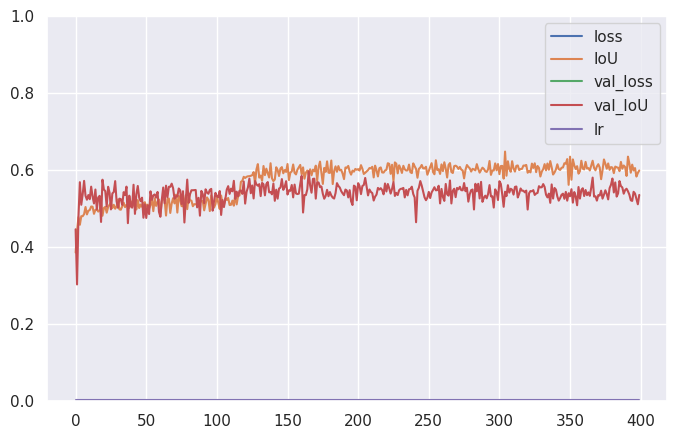

In [75]:
#plotting training values
import seaborn as sns
sns.set()


pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

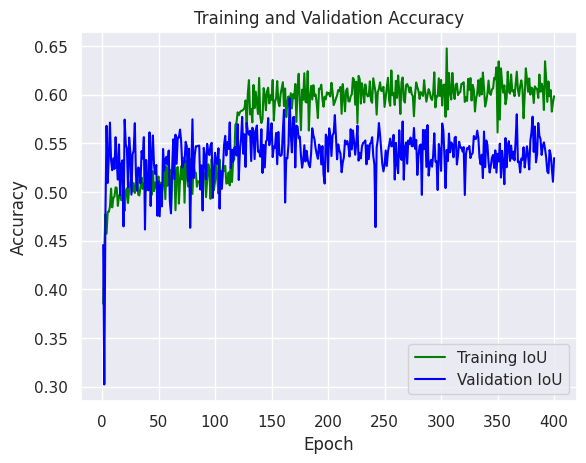

In [76]:

IoU = history1.history['IoU']
val_IoU = history1.history['val_IoU']
epochs = range(1, len(IoU) + 1)

#accuracy plot
plt.plot(epochs, IoU, color='green', label='Training IoU')
plt.plot(epochs, val_IoU, color='blue', label='Validation IoU')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


1/1 [==============================] - 0s 22ms/step


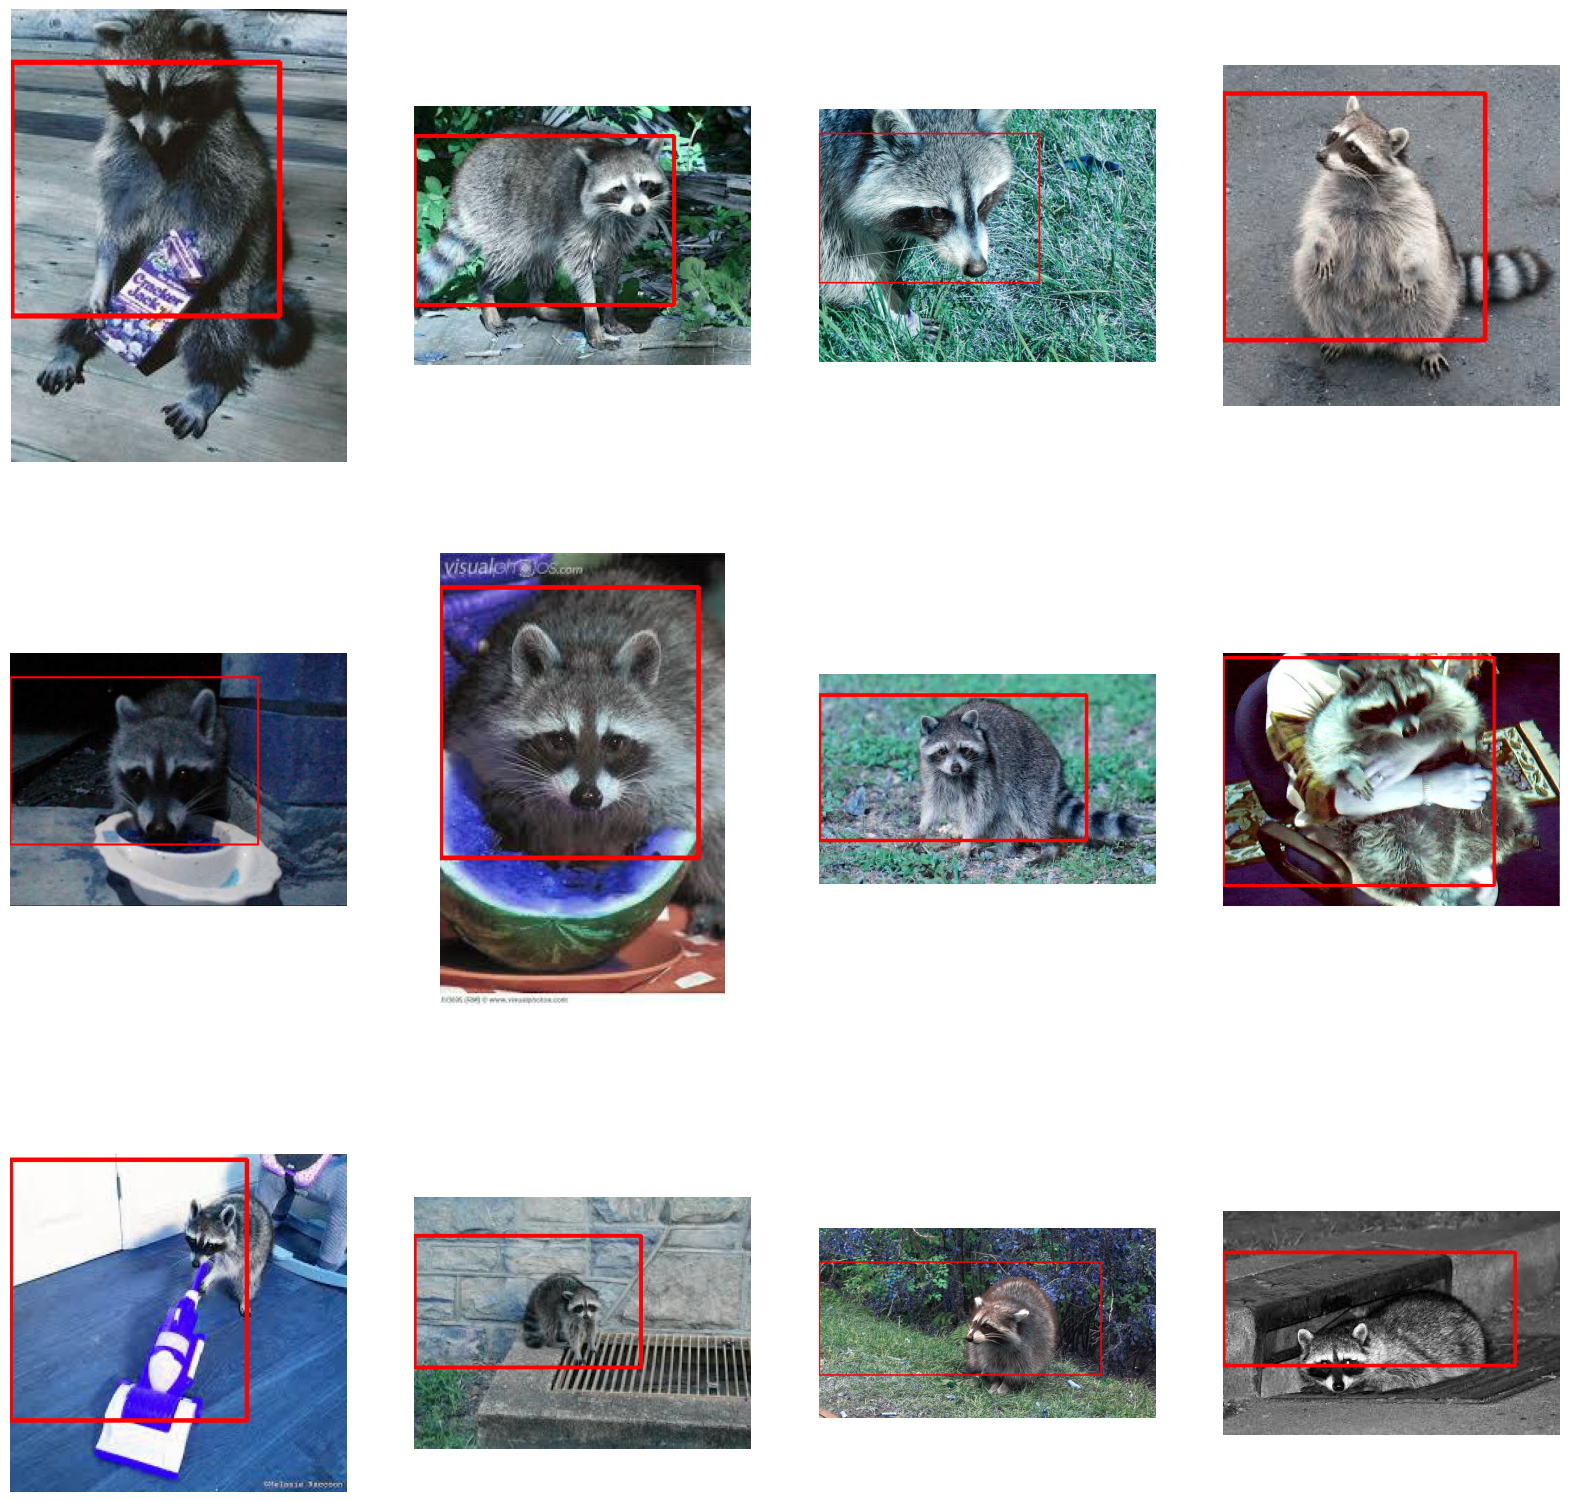

In [78]:
#showing training images with labels
df=pd.read_csv('/content/drive/MyDrive/Racoon Detection/train_labels_.csv')[161:]
plt.figure(figsize=(20,20))
for n , i in enumerate(range(12)) :
    plt.subplot(3,4,n+1)

    img = cv2.imread(trainpath+str(df.iloc[i,0]))
    org_img=img.copy()

    image_height, image_width, _ = img.shape


    img = cv2.resize(img,(new_size,new_size))
    img = img / 255.0
    img=np.expand_dims(img,axis=0)
    region = model1.predict(img)[0]

    x0 = int(region[0] * image_width / new_size)
    y0 = int(region[1] * image_height / new_size)
    x1 = int((region[2]) * image_width / new_size)
    y1 = int((region[3]) * image_height / new_size)

    cv2.rectangle(org_img,(x0, y0), ((x1 - x0) , (y1 - y0)) , (255,0,0),2)
    plt.imshow(org_img)
    plt.axis('off')

